## Import Statements

In [2]:
import cv2
import os
import numpy as np
import pandas as pd
from sklearn.neighbors import KDTree
from sklearn.preprocessing import OneHotEncoder
import math
import matplotlib.pyplot as plt
import swifter

## dataframe for all objects across all videos

In [3]:
rectangles = pd.DataFrame(columns=['vid','fid','rid','xt','yt','xb','yb','label','confidence'])

In [4]:
%%time
rectangles = pd.read_csv('/media/cs18s504/DATA/Prashanth/Datasets/objects_across_all_videos',index_col= None)

CPU times: user 51.1 s, sys: 9.62 s, total: 1min
Wall time: 1min 2s


In [5]:
rectangles.shape

(59230796, 9)

In [6]:
group_rectangles = rectangles.groupby('vid')

In [57]:
%%time

list_of_histograms = []
example_vid_frame = rectangles[rectangles['vid'] == 'video1.mp4']
video_name = 'video1.mp4'
video = cv2.VideoCapture('/media/cs18s504/DATA/Prashanth/Datasets/videos/'+video_name)
example_vid_numpy = example_vid_frame.to_numpy()
print(example_vid_numpy.shape)
current_frame_number = 0
for i in range(example_vid_numpy.shape[0]):
    frame_number = example_vid_numpy[i][1]
    while(current_frame_number<frame_number):
        current_frame_number+=1
        success,image = video.read()
        
    yt = example_vid_numpy[i][4]
    yb = example_vid_numpy[i][6]
    xt = example_vid_numpy[i][3]
    xb = example_vid_numpy[i][5]
    
    lis = []
    
    for i in range(3):
        histr = cv2.calcHist([image[yt:yb,xt:xb]],[i],None,[20],[0,256])
        lis.append(histr)
    lis = list(np.vstack(lis))
    
    list_of_histograms.append(lis)
        
    
    
        

(194391, 9)
CPU times: user 26.1 s, sys: 1.24 s, total: 27.4 s
Wall time: 15.7 s


In [ ]:
len(list_of_histograms)

In [34]:
example_vid_frame.shape

(194391, 9)

In [30]:
def find_histogram(vid_frame):
    vid_numpy = vid_frame.to_numpy()
    print(vid_numpy.shape)
    video_name = vid_numpy[0][0]
    video = cv2.VideoCapture('/media/cs18s504/DATA/Prashanth/Datasets/videos/'+video_name)
    
    current_frame_number = 0
    
    for i in range(vid_numpy.shape[0]):
        
    
    print(vid_numpy[0][0])
    

In [31]:
%%time
group_rectangles.apply(lambda x: find_histogram(x))


(194391, 9)
video1.mp4
(45576, 9)
video10.mp4
(5907, 9)
video100.mp4
(54489, 9)
video1001.mp4
(58542, 9)
video1002.mp4
(63107, 9)
video1003.mp4
(25193, 9)
video1006.mp4
(179918, 9)
video1008.mp4
(122893, 9)
video1009.mp4
(43236, 9)
video101.mp4
(29833, 9)
video1013.mp4
(18948, 9)
video1014.mp4
(15231, 9)
video1015.mp4
(44745, 9)
video1017.mp4
(22706, 9)
video102.mp4
(42067, 9)
video1021.mp4
(32926, 9)
video1022.mp4
(81885, 9)
video1024.mp4
(82850, 9)
video1027.mp4
(17552, 9)
video1028.mp4
(19242, 9)
video1029.mp4
(49611, 9)
video103.mp4
(31976, 9)
video1030.mp4
(28017, 9)
video1031.mp4
(107523, 9)
video1032.mp4
(15918, 9)
video1033.mp4
(14100, 9)
video1034.mp4
(49717, 9)
video1036.mp4
(60670, 9)
video1037.mp4
(46639, 9)
video1038.mp4
(58756, 9)
video1039.mp4
(6156, 9)
video104.mp4
(116390, 9)
video1040.mp4
(31860, 9)
video1041.mp4
(55309, 9)
video1042.mp4
(15977, 9)
video1043.mp4
(11045, 9)
video1044.mp4
(16464, 9)
video1045.mp4
(21805, 9)
video1046.mp4
(9444, 9)
video1047.mp4
(7148, 9

video1386.mp4
(98299, 9)
video1387.mp4
(21094, 9)
video1388.mp4
(30234, 9)
video1389.mp4
(24101, 9)
video139.mp4
(17357, 9)
video1391.mp4
(9067, 9)
video1392.mp4
(19045, 9)
video1393.mp4
(20640, 9)
video1394.mp4
(11387, 9)
video1395.mp4
(13326, 9)
video1396.mp4
(30689, 9)
video1398.mp4
(30477, 9)
video14.mp4
(10880, 9)
video140.mp4
(15439, 9)
video1400.mp4
(12714, 9)
video1401.mp4
(47974, 9)
video1402.mp4
(46176, 9)
video1403.mp4
(105189, 9)
video1404.mp4
(11411, 9)
video1405.mp4
(37998, 9)
video1406.mp4
(5466, 9)
video1407.mp4
(22911, 9)
video1408.mp4
(11275, 9)
video1409.mp4
(57289, 9)
video141.mp4
(117819, 9)
video1410.mp4
(9791, 9)
video1411.mp4
(176822, 9)
video1412.mp4
(38074, 9)
video1413.mp4
(4486, 9)
video1414.mp4
(21238, 9)
video1415.mp4
(10760, 9)
video1416.mp4
(2244, 9)
video1417.mp4
(11477, 9)
video1418.mp4
(6179, 9)
video1419.mp4
(208222, 9)
video142.mp4
(24454, 9)
video1420.mp4
(16195, 9)
video1422.mp4
(11265, 9)
video1423.mp4
(9140, 9)
video1424.mp4
(24567, 9)
video1425

(48099, 9)
video324.mp4
(21187, 9)
video325.mp4
(17081, 9)
video326.mp4
(74734, 9)
video327.mp4
(20960, 9)
video328.mp4
(55728, 9)
video329.mp4
(17133, 9)
video33.mp4
(17385, 9)
video330.mp4
(14725, 9)
video331.mp4
(60418, 9)
video332.mp4
(11754, 9)
video333.mp4
(138010, 9)
video334.mp4
(30932, 9)
video335.mp4
(21981, 9)
video336.mp4
(30468, 9)
video337.mp4
(60072, 9)
video338.mp4
(10749, 9)
video339.mp4
(42317, 9)
video34.mp4
(24862, 9)
video340.mp4
(50630, 9)
video341.mp4
(27891, 9)
video342.mp4
(52144, 9)
video343.mp4
(19485, 9)
video344.mp4
(40409, 9)
video345.mp4
(43764, 9)
video346.mp4
(34133, 9)
video347.mp4
(6459, 9)
video348.mp4
(20724, 9)
video349.mp4
(130118, 9)
video35.mp4
(28046, 9)
video350.mp4
(58653, 9)
video351.mp4
(15142, 9)
video352.mp4
(57908, 9)
video353.mp4
(59956, 9)
video354.mp4
(5029, 9)
video355.mp4
(198760, 9)
video356.mp4
(191931, 9)
video357.mp4
(51278, 9)
video358.mp4
(16481, 9)
video359.mp4
(88636, 9)
video36.mp4
(3104, 9)
video360.mp4
(11343, 9)
video361

video639.mp4
(46765, 9)
video64.mp4
(18781, 9)
video640.mp4
(64702, 9)
video641.mp4
(54722, 9)
video642.mp4
(14830, 9)
video643.mp4
(215258, 9)
video644.mp4
(43330, 9)
video645.mp4
(65144, 9)
video646.mp4
(23379, 9)
video647.mp4
(19113, 9)
video648.mp4
(18265, 9)
video649.mp4
(8740, 9)
video65.mp4
(16505, 9)
video650.mp4
(13151, 9)
video651.mp4
(31728, 9)
video652.mp4
(13779, 9)
video653.mp4
(28839, 9)
video654.mp4
(34482, 9)
video655.mp4
(12223, 9)
video656.mp4
(33570, 9)
video657.mp4
(38067, 9)
video658.mp4
(12108, 9)
video659.mp4
(55561, 9)
video66.mp4
(52922, 9)
video660.mp4
(3213, 9)
video661.mp4
(137550, 9)
video662.mp4
(15918, 9)
video663.mp4
(65760, 9)
video665.mp4
(20120, 9)
video666.mp4
(139781, 9)
video667.mp4
(37414, 9)
video67.mp4
(7177, 9)
video671.mp4
(25861, 9)
video672.mp4
(273151, 9)
video674.mp4
(92529, 9)
video676.mp4
(15597, 9)
video678.mp4
(44268, 9)
video679.mp4
(19989, 9)
video68.mp4
(42501, 9)
video681.mp4
(19213, 9)
video685.mp4
(31057, 9)
video686.mp4
(11089,

""


In [8]:
def fetchingVideoNames(folderPath):
    listOfVideos=[]
    for root, dirs, files in os.walk(folderPath):  
        for filename in files:
            listOfVideos.append(filename)
    return listOfVideos

In [9]:
folderName = '/media/cs18s504/DATA/Prashanth/Datasets/videos/'
list_of_videos = fetchingVideoNames(folderName)

In [10]:
number_of_videos=len(list_of_videos)
print(number_of_videos)

1268


In [11]:
%%time
video_frame = rectangles[(rectangles['vid'] == 'video1.mp4')]

CPU times: user 2.35 s, sys: 114 ms, total: 2.47 s
Wall time: 2.44 s


In [12]:
%%time
video = cv2.VideoCapture('/media/cs18s504/DATA/Prashanth/Datasets/videos/video1.mp4')

CPU times: user 16.9 ms, sys: 12.2 ms, total: 29.1 ms
Wall time: 103 ms


In [13]:
%%time
for i in range(479):
    success,image = video.read()

CPU times: user 928 ms, sys: 92.4 ms, total: 1.02 s
Wall time: 224 ms


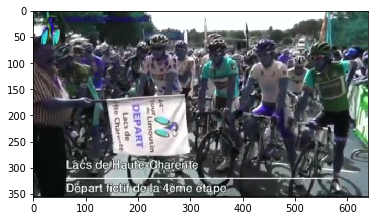

In [14]:
plt.imshow(image)

(60, 1)


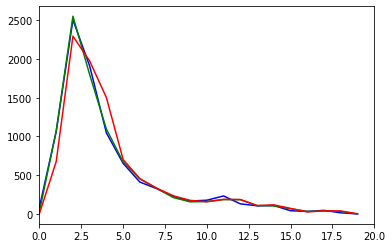

In [15]:
color = ('b','g','r')
lis = []
for i,col in enumerate(color):
    histr = cv2.calcHist([image[208:327,314:392]],[i],None,[20],[0,256])
    lis.append(histr)
    plt.plot(histr,color = col)
    plt.xlim([0,20])
    
lis = np.vstack(lis)
print(lis.shape)
plt.show()

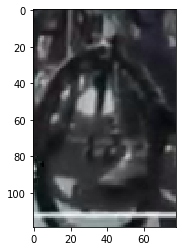

In [16]:
plt.imshow(image[208:327,314:392])

(20, 1)
(20, 1)
(20, 1)


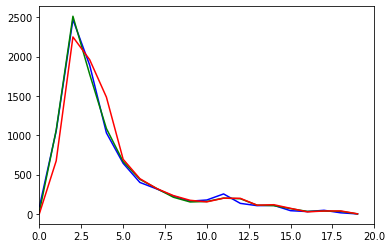

In [17]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([image[207:328,314:390]],[i],None,[20],[0,256])
    print(histr.reshape(-1,1).shape)
    plt.plot(histr,color = col)
    plt.xlim([0,20])
plt.show()

In [18]:
video_frame

,vid,fid,rid,xt,yt,xb,yb,label,confidence
28601466,video1.mp4,27,1,0,50,573,340,cat,0.298519
28601467,video1.mp4,28,2,0,63,127,254,car,0.455292
28601468,video1.mp4,28,3,1,57,149,264,train,0.141466
28601469,video1.mp4,29,4,0,60,164,293,train,0.185933
28601470,video1.mp4,29,5,0,82,162,307,car,0.131963
...,...,...,...,...,...,...,...,...,...
28795852,video1.mp4,6633,1486,370,164,385,189,person,0.124432
28795853,video1.mp4,6633,1487,299,168,333,224,person,0.166420
28795854,video1.mp4,6633,1488,291,188,324,244,person,0.375068
28795855,video1.mp4,6633,1489,8,259,622,353,car,0.226275


In [8]:
def get_vector(row):
    
    #print(row['vid'])
    video_name = row['vid']
    #print('/media/cs18s504/DATA/Prashanth/Datasets/videos/'+video_name)
    video = cv2.VideoCapture('/media/cs18s504/DATA/Prashanth/Datasets/videos/'+video_name)
    
    image =None
    frame_id = row['fid']
    #print(frame_id)
    for i in range(int(frame_id)):
        success,image = video.read()
    #print(image)
    color = ('b','g','r')
    lis = []
    for i,col in enumerate(color):
        histr = cv2.calcHist([image[int(row['yt']):int(row['yb']),int(row['xt']):int(row['xb'])]],[i],None,[20],[0,256])
        #print(histr.reshape(-1,1).shape)
        lis.append(histr)
    
    lis = np.vstack(lis)
    
    return lis


In [19]:
video_frame.keys()

Index(['vid', 'fid', 'rid', 'xt', 'yt', 'xb', 'yb', 'label', 'confidence'], dtype='object')

In [20]:
video_frame

,vid,fid,rid,xt,yt,xb,yb,label,confidence
28601466,video1.mp4,27,1,0,50,573,340,cat,0.298519
28601467,video1.mp4,28,2,0,63,127,254,car,0.455292
28601468,video1.mp4,28,3,1,57,149,264,train,0.141466
28601469,video1.mp4,29,4,0,60,164,293,train,0.185933
28601470,video1.mp4,29,5,0,82,162,307,car,0.131963
...,...,...,...,...,...,...,...,...,...
28795852,video1.mp4,6633,1486,370,164,385,189,person,0.124432
28795853,video1.mp4,6633,1487,299,168,333,224,person,0.166420
28795854,video1.mp4,6633,1488,291,188,324,244,person,0.375068
28795855,video1.mp4,6633,1489,8,259,622,353,car,0.226275


In [21]:
%%time
indices = [i for i in range(video_frame.shape[0])]

CPU times: user 11.1 ms, sys: 3.84 ms, total: 14.9 ms
Wall time: 14.6 ms


In [22]:
encoder = OneHotEncoder(categories='auto',sparse=False)
encoder.fit(np.array(video_frame['label']).reshape(-1,1))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [23]:
%%time
a1 = encoder.transform(np.array(video_frame['label']).reshape(-1,1))*150
a2 = np.array(video_frame['xt']).reshape(-1,1)
a3 = np.array(video_frame['yt']).reshape(-1,1)
a4 = np.array(video_frame['xb']).reshape(-1,1)
a5 = np.array(video_frame['yb']).reshape(-1,1)


CPU times: user 246 ms, sys: 49.1 ms, total: 295 ms
Wall time: 136 ms


In [24]:
a = np.hstack((a1,a2,a3,a4,a5))
a.shape

(194391, 73)

In [29]:
video_frame['one_hot_encoding'] = list(a)

/home/cs18s504/anaconda3/envs/prashanth/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
video_frame['one_hot_encoding'][28601471]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0., 150.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,  24.,  54., 608., 336.])

In [31]:
X =  np.stack(list(video_frame['one_hot_encoding']),axis=0)
kd_tree = KDTree(X)


In [32]:
%%time
results = kd_tree.query_radius(X,r=50,return_distance = False)

CPU times: user 6min 52s, sys: 1.61 s, total: 6min 54s
Wall time: 6min 54s


In [33]:
results[2]

array([     6, 191533,      2,      3])

In [34]:
def closure(i,results):
    done_indices = []
    lis_old = []
    lis_new = []
    l = results[i]
    lis_new = lis_old + list(l)
    done_indices.append(i)
    
    while(list(set(lis_new)-set(lis_old)) != []):
        a = list(set(lis_new) - set(done_indices))
        if a == []:
            return set([i])

        else:
            a = a[0]
        l = results[a]
        
        lis_old = lis_new
        lis_new = lis_old + list(l)
        done_indices.append(a)
        
    return set(lis_new)
        
    

In [35]:
%%time
s = closure(0,results)
print(s)

{0, 9, 5}
CPU times: user 430 µs, sys: 11 µs, total: 441 µs
Wall time: 334 µs


In [22]:
12, 18, 20, 24, 26, 38, 42, 44, 45, 47, 49, 51, 54, 55, 59, 61, 62, 64, 69, 72, 74, 77, 80, 82

(12,
 18,
 20,
 24,
 26,
 38,
 42,
 44,
 45,
 47,
 49,
 51,
 54,
 55,
 59,
 61,
 62,
 64,
 69,
 72,
 74,
 77,
 80,
 82)

In [36]:
video_frame[video_frame['label'] == 'tennis racket' ]

,vid,fid,rid,xt,yt,xb,yb,label,confidence,one_hot_encoding
28640547,video1.mp4,1527,1846,220,219,234,257,tennis racket,0.276090,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
28640564,video1.mp4,1528,1863,220,221,234,255,tennis racket,0.212783,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
28640759,video1.mp4,1539,2058,223,222,238,256,tennis racket,0.127246,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
28647811,video1.mp4,1876,4366,242,180,258,200,tennis racket,0.101666,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
28647836,video1.mp4,1877,4391,242,180,258,201,tennis racket,0.106332,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...
28754754,video1.mp4,5257,6807,147,139,195,216,tennis racket,0.293065,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
28755669,video1.mp4,5283,7722,209,166,251,227,tennis racket,0.206965,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
28755786,video1.mp4,5286,7839,147,184,197,248,tennis racket,0.163219,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
28789845,video1.mp4,6283,353,21,24,55,69,tennis racket,0.127266,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [37]:
set(video_frame['label'])


{'aeroplane',
 'apple',
 'backpack',
 'banana',
 'baseball bat',
 'baseball glove',
 'bench',
 'bicycle',
 'bird',
 'boat',
 'book',
 'bottle',
 'bowl',
 'broccoli',
 'bus',
 'cake',
 'car',
 'carrot',
 'cat',
 'cell phone',
 'chair',
 'clock',
 'cow',
 'cup',
 'diningtable',
 'dog',
 'donut',
 'elephant',
 'fire hydrant',
 'fork',
 'frisbee',
 'handbag',
 'horse',
 'hot dog',
 'keyboard',
 'kite',
 'knife',
 'laptop',
 'motorbike',
 'orange',
 'oven',
 'parking meter',
 'person',
 'pottedplant',
 'refrigerator',
 'remote',
 'sandwich',
 'scissors',
 'sheep',
 'skateboard',
 'skis',
 'snowboard',
 'spoon',
 'sports ball',
 'stop sign',
 'suitcase',
 'surfboard',
 'teddy bear',
 'tennis racket',
 'tie',
 'toothbrush',
 'traffic light',
 'train',
 'truck',
 'tvmonitor',
 'umbrella',
 'vase',
 'wine glass',
 'zebra'}

In [38]:
%%time
kd_tree.query_radius(X,r=5,return_distance = False)

CPU times: user 51.6 s, sys: 108 ms, total: 51.7 s
Wall time: 51.7 s


array([array([0]), array([1]), array([2]), ...,
       array([193139, 193151, 193163, 193175, 193187, 193199, 193211, 193223,
       193235, 192827, 192839, 192739, 192752, 192983, 193007, 193115,
       192630, 192641, 192653, 192665, 192689, 192765, 192701, 193564,
       192677, 193907, 193920, 193933, 193946, 193959, 193972, 193985,
       193998, 194011, 194024, 194037, 194050, 194063, 194076, 194089,
       194102, 194115, 194128, 194141, 194154, 194167, 194180, 194193,
       194206, 194232, 194245, 194258, 194271, 194284, 194297, 194310,
       194323, 194336, 194349, 194362, 194375, 194388, 194219, 192608,
       192899, 192887, 193795, 193784, 193773, 193850, 193861, 192851,
       193872, 192863, 193883, 193806, 192875, 193894, 192911, 192923,
       192935, 192947, 192959, 192971, 192995, 193019, 193031, 192619,
       193043, 193055, 193067, 193079, 193091, 193103, 193127, 193246,
       193257, 193268, 193279, 193290, 193300, 193311, 193322, 193333,
       193344, 193355,

In [39]:
def findingChainID(row,kd_tree,max_frame):
    if(row.name == 63106):
        return 0
    
    a = 4
    p=-1
    while p == -1:
        a=a+1
        prediction = kd_tree.query([row['one_hot_encoding']],k=a,return_distance=False)[0]
        print(prediction)
        p = -1
        for i in list(prediction):
            if i>row.name:
                p = i
                break
    
    return p

In [40]:
def finding_neighbor(row,video_frame):
    X =  np.stack(list(video_frame['one_hot_encoding'][row.name:]),axis=0)
    print("X matrix size is ",X.shape)
    kd_tree = KDTree(X)
    prediction = kd_tree.query([row['one_hot_encoding']],k=5,return_distance=False)[0]
    print(prediction)
    

In [41]:
%%time
for i in range(1):
    video_id = list_of_videos[i]
    print("processing "+video_id)
    #video_frame = rectangles[rectangles['vid']==video_id]
    
    #print(video_frame)
    print("size is",video_frame.shape)
    encoder = OneHotEncoder(categories='auto',sparse=False)
    encoder.fit(np.array(video_frame['label']).reshape(-1,1))
    print("number of features for encoder ",len(set(video_frame['label'])))
    video_frame['one_hot_encoding'] = video_frame.apply(lambda x: list(encoder.transform([[x['label']]])[0])+[x['xt'],x['yt'],x['xb'],x['yb']],axis=1)
    print(video_frame.head(100))
    
    #video_frame[neighbor] = video_frame.apply(finding_neighbor,video_frame=video_frame,axis=1)
#     X = np.stack(list(video_frame['one_hot_encoding']),axis=0)
#     print("X matrix size is ",X.shape)
#     kd_tree = KDTree(X)
#     video_frame['neighbor'] = video_frame.apply(findingChainID,kd_tree=kd_tree,max_frame= max(video_frame['fid']),axis=1)
    
    
    #print(video_frame['one_hot_encoding'][26827429])
    

processing video241.mp4
size is (194391, 10)
number of features for encoder  69
                 vid  fid  rid   xt   yt   xb   yb      label  confidence  \
28601466  video1.mp4   27    1    0   50  573  340        cat    0.298519   
28601467  video1.mp4   28    2    0   63  127  254        car    0.455292   
28601468  video1.mp4   28    3    1   57  149  264      train    0.141466   
28601469  video1.mp4   29    4    0   60  164  293      train    0.185933   
28601470  video1.mp4   29    5    0   82  162  307        car    0.131963   
...              ...  ...  ...  ...  ...  ...  ...        ...         ...   
28601561  video1.mp4   82   96  203  161  313  193        tie    0.117233   
28601562  video1.mp4   82   97   93   23  548  299  tvmonitor    0.346036   
28601563  video1.mp4   83   98  106  160  522  347     person    0.183463   
28601564  video1.mp4   83   99  101   17  543  303  tvmonitor    0.277172   
28601565  video1.mp4   84  100  114  155  519  349     person    0.102485

/home/cs18s504/anaconda3/envs/prashanth/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [42]:
list(encoder.transform([[x['label']]])[0]).append([x['xt'],x['yt'],x['xb'],x['yb'],x['fid']])

NameError: name 'x' is not defined

In [43]:
list_of_videos = fetchingVideoNames("/media/cs18s504/DATA/Prashanth/Datasets/videos")

In [44]:
list_of_videos[0]

'video241.mp4'

In [45]:
def closure(i,results):
    done_indices = []
    lis_old = []
    lis_new = []
    l = results[i]
    lis_new = lis_old + list(l)
    done_indices.append(i)
    
    while(list(set(lis_new)-set(lis_old)) != []):
        a = list(set(lis_new) - set(done_indices))
        if a == []:
            return set([i])

        else:
            a = a[0]
        l = results[a]
        
        lis_old = lis_new
        lis_new = lis_old + list(l)
        done_indices.append(a)
        
    return set(lis_new)

In [46]:
rectangles_numpy = rectangles.to_numpy()

In [47]:
rectangles_numpy

array([['video329.mp4', 5, 1, ..., 498, 'tvmonitor', 0.2091808170080185],
       ['video329.mp4', 6, 2, ..., 495, 'tvmonitor', 0.1866779923439026],
       ['video329.mp4', 7, 3, ..., 500, 'tvmonitor', 0.19801783561706546],
       ...,
       ['video667.mp4', 5139, 72, ..., 354, 'truck', 0.13035869598388672],
       ['video667.mp4', 5141, 73, ..., 359, 'stop sign',
        0.11378318071365355],
       ['video667.mp4', 5142, 74, ..., 354, 'stop sign',
        0.13715404272079468]], dtype=object)

In [48]:
%%time
print(rectangles_numpy[rectangles_numpy[:,0] == 'video248.mp4'])

[['video248.mp4' 122 1 ... 498 'person' 0.857549250125885]
 ['video248.mp4' 122 2 ... 136 'clock' 0.36595273017883295]
 ['video248.mp4' 123 3 ... 497 'person' 0.8348764181137085]
 ...
 ['video248.mp4' 14054 466 ... 389 'chair' 0.19454540312290192]
 ['video248.mp4' 14054 467 ... 466 'tennis racket' 0.13746654987335205]
 ['video248.mp4' 14054 468 ... 391 'chair' 0.1359499990940094]]
CPU times: user 913 ms, sys: 31.9 ms, total: 945 ms
Wall time: 936 ms


In [49]:
rectangles.dtypes

vid            object
fid             int64
rid             int64
xt              int64
yt              int64
xb              int64
yb              int64
label          object
confidence    float64
dtype: object

In [50]:
scene_size =240

In [51]:
number_of_videos = 1268

In [52]:
major_list = []

In [ ]:
%%time

list_of_histograms = []
example_vid_frame = rectangles[rectangles['vid'] == 'video1.mp4']
video_name = 'video1.mp4'
video = cv2.VideoCapture('/media/cs18s504/DATA/Prashanth/Datasets/videos/'+video_name)
example_vid_numpy = example_vid_frame.to_numpy()
print(example_vid_numpy.shape)
current_frame_number = 0
for i in range(example_vid_numpy.shape[0]):
    frame_number = example_vid_numpy[i][1]
    while(current_frame_number<frame_number):
        current_frame_number+=1
        success,image = video.read()
        
    yt = example_vid_numpy[i][4]
    yb = example_vid_numpy[i][6]
    xt = example_vid_numpy[i][3]
    xb = example_vid_numpy[i][5]
    
    lis = []
    
    for i in range(3):
        histr = cv2.calcHist([image[yt:yb,xt:xb]],[i],None,[20],[0,256])
        lis.append(histr)
    lis = list(np.vstack(lis))
    
    list_of_histograms.append(lis)

In [53]:
print(number_of_videos)

1268


In [ ]:
%%time
for i in range(1005,number_of_videos):
    video_id = list_of_videos[i]
    video_numpy = rectangles_numpy[rectangles_numpy[:,0] == video_id]
    print(video_numpy)
    print("processing video ",i+1)
    number_of_frames = video_numpy[video_numpy.shape[0]-1][1]
    print("number of frames are ",number_of_frames)
    number_of_scenes = math.ceil(number_of_frames/scene_size)
    #print("number of scenes ", number_of_scenes)
    for j in range(number_of_scenes):
        scene_numpy = video_numpy[(video_numpy[:,1]>=(j)*scene_size+1) & (video_numpy[:,1]<=(j+1)*scene_size)]
        #print("size of scene ", j, scene_numpy.shape)
        if scene_numpy.shape[0]>0:
            
            print(scene_numpy)
            encoder = OneHotEncoder(categories='auto',sparse=False)
            encoder.fit(scene_numpy[:,7].reshape(-1,1))


            a1 = encoder.transform(scene_numpy[:,7].reshape(-1,1))*150
            a2 = scene_numpy[:,3].reshape(-1,1)
            a3 = scene_numpy[:,4].reshape(-1,1)
            a4 = scene_numpy[:,5].reshape(-1,1)
            a5 = scene_numpy[:,6].reshape(-1,1)

            encoded_vectors = np.hstack((a1,a2,a3,a4,a5))
            print("shape_of_encoded vectors",encoded_vectors.shape)
            
            video_name = scene_numpy[0][0]
            video = cv2.VideoCapture('/media/cs18s504/DATA/Prashanth/Datasets/videos/'+video_name)
            
            current_frame_number = 0
            list_of_histograms = []
            for k in range(scene_numpy.shape[0]):
                frame_number = scene_numpy[k][1]
                while(current_frame_number<frame_number):
                    current_frame_number+=1
                    success,image = video.read()
                    
                
                yt = scene_numpy[k][4]
                yb = scene_numpy[k][6]
                xt = scene_numpy[k][3]
                xb = scene_numpy[k][5]
                lis = []
                for layer in range(3):
                    histr = cv2.calcHist([image[yt:yb,xt:xb]],[layer],None,[20],[0,256])
                    lis.append(histr)
                lis = np.vstack(lis)
            
                list_of_histograms.append(lis)
                
            hist_vector = np.stack(list_of_histograms)
            #print('Hi')
          
            print("histogram shape",hist_vector.shape)
            hist_vector = hist_vector.reshape(hist_vector.shape[0],hist_vector.shape[1])
            print("histogram shape",hist_vector.shape)
            print("total shape",np.hstack([encoded_vectors,hist_vector]).shape)

            #print(a[0,:])
            
            encoded_vectors = np.hstack([encoded_vectors,hist_vector])

            kd_tree = KDTree(encoded_vectors)

            results = kd_tree.query_radius(encoded_vectors,r=50,return_distance = False)

            indices = [i for i in range(scene_numpy.shape[0])]

            processed_indices = []

            chains = []

            while indices != []:
                c = indices[0]

                r = closure(c,results)

                indices = list(set(indices)-r)
                chains.append(r)

                #chain_frame = scene_frame.iloc[list(r),:]
                #print(chain_frame)

            #print(chains)

            scene_numpy = np.hstack((scene_numpy,np.zeros((scene_numpy.shape[0],1)).astype(int)))

            #print(scene_numpy.shape)

    #         scene_numpy[[0,2],9] = 1


            count = 0

            for item in chains:
                count+=1
                scene_numpy[list(item),9] = count

    #         print("total number of chains ",len(chains))
    #         print(max(scene_numpy[:,9]))

            text = []


            for c in range(1,len(chains)+1):


                chain_numpy = scene_numpy[scene_numpy[:,9] == c]

                if chain_numpy.shape[0]>0:

                    xt_numpy = chain_numpy[:,3]
                    yt_numpy = chain_numpy[:,4]
                    xb_numpy = chain_numpy[:,5]
                    yb_numpy = chain_numpy[:,6]

                    cx_numpy = (xt_numpy + xb_numpy)/2
                    cy_numpy = (xb_numpy + yb_numpy)/2

                    #print(cx_numpy,c)

                    mx= np.mean(cx_numpy)
                    my = np.mean(cy_numpy)
                    #print(mx)

                    cx2_numpy = cx_numpy*cx_numpy
                    cy2_numpy = cy_numpy*cy_numpy

                    nx = cx_numpy.shape[0]
                    ny = cy_numpy.shape[0]

    #                 print(math.sqrt(((mx - cx_numpy)*(mx - cx_numpy) + (my - cy_numpy)*(my - cy_numpy))[0]))

                    variance =  np.sum(np.sqrt(np.array((mx - cx_numpy)*(mx - cx_numpy) + (my - cy_numpy)*(my - cy_numpy),dtype=np.float64)))/nx


                    #print(variance)

                    if(variance>=0 and variance<25):

                        text.append('s_'+chain_numpy[0,7])
                    elif(variance>=25 and variance<50):

                        text.append('sm_'+chain_numpy[0,7])

                    elif(variance>=50 and variance<75):

                        text.append('m_'+chain_numpy[0,7])
                    else:
                        text.append('fm_'+chain_numpy[0,7])
                    
                
                    
        major_list.append((text,video_id,j+1))    
                
                
  

[['video1355.mp4' 4 1 ... 195 'person' 0.6856969594955444]
 ['video1355.mp4' 4 2 ... 332 'person' 0.12159278988838194]
 ['video1355.mp4' 4 3 ... 344 'person' 0.2882117033004761]
 ...
 ['video1355.mp4' 11915 632 ... 197 'person' 0.1866341233253479]
 ['video1355.mp4' 11916 633 ... 199 'person' 0.785333514213562]
 ['video1355.mp4' 11917 634 ... 208 'person' 0.2299141585826873]]
processing video  1006
number of frames are  11917
[['video1355.mp4' 4 1 ... 195 'person' 0.6856969594955444]
 ['video1355.mp4' 4 2 ... 332 'person' 0.12159278988838194]
 ['video1355.mp4' 4 3 ... 344 'person' 0.2882117033004761]
 ...
 ['video1355.mp4' 240 1408 ... 356 'horse' 0.9460380673408508]
 ['video1355.mp4' 240 1409 ... 211 'tie' 0.4190093874931336]
 ['video1355.mp4' 240 1410 ... 211 'tie' 0.17675015330314636]]
shape_of_encoded vectors (1410, 9)
histogram shape (1410, 60, 1)
histogram shape (1410, 60)
total shape (1410, 69)
[['video1355.mp4' 241 1 ... 205 'person' 0.9022308588027954]
 ['video1355.mp4' 241 1 .

histogram shape (1405, 60, 1)
histogram shape (1405, 60)
total shape (1405, 67)
[['video1355.mp4' 3841 1323 ... 204 'person' 0.9075774550437928]
 ['video1355.mp4' 3841 1324 ... 334 'person' 0.796486496925354]
 ['video1355.mp4' 3841 1325 ... 333 'person' 0.7984599471092224]
 ...
 ['video1355.mp4' 4080 1313 ... 333 'person' 0.7862159013748169]
 ['video1355.mp4' 4080 1314 ... 356 'horse' 0.94863361120224]
 ['video1355.mp4' 4080 1315 ... 210 'tie' 0.2800473570823669]]
shape_of_encoded vectors (1410, 7)
histogram shape (1410, 60, 1)
histogram shape (1410, 60)
total shape (1410, 67)
[['video1355.mp4' 4081 1316 ... 205 'person' 0.8988144993782043]
 ['video1355.mp4' 4081 1317 ... 325 'person' 0.814683735370636]
 ['video1355.mp4' 4081 1318 ... 333 'person' 0.7901486158370972]
 ...
 ['video1355.mp4' 4320 1303 ... 358 'horse' 0.9466307163238524]
 ['video1355.mp4' 4320 1304 ... 210 'tie' 0.4180219173431397]
 ['video1355.mp4' 4320 1305 ... 210 'tie' 0.11740369349718095]]
shape_of_encoded vectors (1

histogram shape (1410, 60, 1)
histogram shape (1410, 60)
total shape (1410, 67)
[['video1355.mp4' 7921 1250 ... 204 'person' 0.9058004021644592]
 ['video1355.mp4' 7921 1251 ... 334 'person' 0.8046622276306152]
 ['video1355.mp4' 7921 1252 ... 332 'person' 0.8066499829292297]
 ...
 ['video1355.mp4' 8160 1199 ... 356 'horse' 0.9487200379371644]
 ['video1355.mp4' 8160 1200 ... 211 'tie' 0.4206967353820801]
 ['video1355.mp4' 8160 1201 ... 210 'tie' 0.10617668181657793]]
shape_of_encoded vectors (1398, 7)
histogram shape (1398, 60, 1)
histogram shape (1398, 60)
total shape (1398, 67)
[['video1355.mp4' 8161 1202 ... 205 'person' 0.9070827960968018]
 ['video1355.mp4' 8161 1203 ... 322 'person' 0.8055236935615541]
 ['video1355.mp4' 8161 1204 ... 333 'person' 0.8042311072349548]
 ...
 ['video1355.mp4' 8400 1235 ... 357 'horse' 0.9468626976013184]
 ['video1355.mp4' 8400 1236 ... 210 'tie' 0.5030645728111267]
 ['video1355.mp4' 8400 1237 ... 209 'tie' 0.17207470536231995]]
shape_of_encoded vectors 

histogram shape (927, 60, 1)
histogram shape (927, 60)
total shape (927, 70)
[['video1154.mp4' 29 1 ... 352 'clock' 0.13581928610801694]
 ['video1154.mp4' 40 2 ... 648 'clock' 0.10396593809127808]
 ['video1154.mp4' 44 3 ... 634 'tvmonitor' 0.11286861449480055]
 ...
 ['video1154.mp4' 7928 504 ... 626 'person' 0.7601042389869691]
 ['video1154.mp4' 7928 505 ... 670 'sports ball' 0.11192457377910614]
 ['video1154.mp4' 7928 506 ... 719 'tennis racket' 0.8981966376304626]]
processing video  1007
number of frames are  7928
[['video1154.mp4' 29 1 672 218 893 352 'clock' 0.13581928610801694]
 ['video1154.mp4' 40 2 158 222 1250 648 'clock' 0.10396593809127808]
 ['video1154.mp4' 44 3 189 234 1222 634 'tvmonitor' 0.11286861449480055]
 ['video1154.mp4' 211 4 78 83 1075 571 'clock' 0.16048875451087952]
 ['video1154.mp4' 236 5 791 498 847 559 'sports ball' 0.10255729407072067]]
shape_of_encoded vectors (5, 7)
histogram shape (5, 60, 1)
histogram shape (5, 60)
total shape (5, 67)
[['video1154.mp4' 247

histogram shape (486, 60, 1)
histogram shape (486, 60)
total shape (486, 68)
[['video1154.mp4' 3841 458 ... 719 'person' 0.8740090727806091]
 ['video1154.mp4' 3841 459 ... 719 'tennis racket' 0.8897460699081421]
 ['video1154.mp4' 3842 460 ... 719 'person' 0.8754246234893799]
 ...
 ['video1154.mp4' 4079 448 ... 719 'tennis racket' 0.9131358861923218]
 ['video1154.mp4' 4080 449 ... 719 'person' 0.8572421669960022]
 ['video1154.mp4' 4080 450 ... 719 'tennis racket' 0.914498209953308]]
shape_of_encoded vectors (481, 6)
histogram shape (481, 60, 1)
histogram shape (481, 60)
total shape (481, 66)
[['video1154.mp4' 4081 451 ... 719 'person' 0.8633713722229004]
 ['video1154.mp4' 4081 452 ... 719 'tennis racket' 0.9259002208709716]
 ['video1154.mp4' 4082 453 ... 719 'person' 0.8693667650222778]
 ...
 ['video1154.mp4' 4320 451 ... 719 'person' 0.7997689247131348]
 ['video1154.mp4' 4320 452 ... 452 'car' 0.14434437453746796]
 ['video1154.mp4' 4320 453 ... 719 'tennis racket' 0.8404335975646973]]


histogram shape (495, 60, 1)
histogram shape (495, 60)
total shape (495, 69)
[['video1154.mp4' 7681 424 ... 719 'person' 0.8673170804977417]
 ['video1154.mp4' 7681 425 ... 719 'tennis racket' 0.9007084965705872]
 ['video1154.mp4' 7682 426 ... 719 'person' 0.8643861413002014]
 ...
 ['video1154.mp4' 7920 479 ... 627 'person' 0.7412348985671997]
 ['video1154.mp4' 7920 480 ... 345 'tie' 0.1031033620238304]
 ['video1154.mp4' 7920 481 ... 719 'tennis racket' 0.9499320387840272]]
shape_of_encoded vectors (546, 9)
histogram shape (546, 60, 1)
histogram shape (546, 60)
total shape (546, 69)
[['video1154.mp4' 7921 482 0 25 778 620 'person' 0.6883508563041687]
 ['video1154.mp4' 7921 483 737 188 1231 719 'tennis racket'
  0.9500371813774108]
 ['video1154.mp4' 7922 484 0 11 787 630 'person' 0.7929434180259705]
 ['video1154.mp4' 7922 485 906 607 970 652 'sports ball'
  0.14808611571788788]
 ['video1154.mp4' 7922 486 735 183 1236 719 'tennis racket'
  0.943049967288971]
 ['video1154.mp4' 7923 487 0 3

histogram shape (3837, 60, 1)
histogram shape (3837, 60)
total shape (3837, 88)
[['video909.mp4' 2641 3788 ... 291 'person' 0.78972989320755]
 ['video909.mp4' 2641 3789 ... 596 'person' 0.8095936179161072]
 ['video909.mp4' 2641 3790 ... 719 'person' 0.8741072416305542]
 ...
 ['video909.mp4' 2880 1518 ... 317 'car' 0.6996117830276489]
 ['video909.mp4' 2880 1519 ... 365 'car' 0.8576881885528564]
 ['video909.mp4' 2880 1520 ... 472 'car' 0.21988922357559204]]
shape_of_encoded vectors (1692, 34)
histogram shape (1692, 60, 1)
histogram shape (1692, 60)
total shape (1692, 94)
[['video909.mp4' 2881 1521 ... 446 'person' 0.8925439715385437]
 ['video909.mp4' 2881 1522 ... 532 'bicycle' 0.7880284190177917]
 ['video909.mp4' 2881 1523 ... 281 'car' 0.10827922075986862]
 ...
 ['video909.mp4' 3120 3408 ... 190 'bicycle' 0.18793277442455286]
 ['video909.mp4' 3120 3409 ... 310 'bicycle' 0.19081705808639526]
 ['video909.mp4' 3120 3410 ... 690 'bicycle' 0.7460022568702698]]
shape_of_encoded vectors (3589

histogram shape (680, 60, 1)
histogram shape (680, 60)
total shape (680, 78)
[['video537.mp4' 2641 659 ... 289 'person' 0.4840309023857117]
 ['video537.mp4' 2641 660 ... 308 'horse' 0.5233681201934814]
 ['video537.mp4' 2642 661 ... 197 'person' 0.3884106278419495]
 ...
 ['video537.mp4' 2880 663 ... 202 'person' 0.7371550202369691]
 ['video537.mp4' 2880 664 ... 294 'horse' 0.8774582743644714]
 ['video537.mp4' 2880 665 ... 125 'backpack' 0.1185811534523964]]
shape_of_encoded vectors (694, 14)
histogram shape (694, 60, 1)
histogram shape (694, 60)
total shape (694, 74)
[['video537.mp4' 2881 666 ... 192 'person' 0.673509955406189]
 ['video537.mp4' 2881 667 ... 180 'person' 0.1630106270313263]
 ['video537.mp4' 2881 668 ... 68 'train' 0.11596903204917908]
 ...
 ['video537.mp4' 3120 668 ... 220 'person' 0.7749056816101074]
 ['video537.mp4' 3120 669 ... 359 'horse' 0.9297893643379213]
 ['video537.mp4' 3120 670 ... 359 'tennis racket' 0.15521737933158875]]
shape_of_encoded vectors (705, 23)
his

histogram shape (2223, 60, 1)
histogram shape (2223, 60)
total shape (2223, 88)
[['video537.mp4' 6721 1738 ... 58 'person' 0.17168472707271576]
 ['video537.mp4' 6721 1739 ... 123 'person' 0.14389874041080475]
 ['video537.mp4' 6721 1740 ... 119 'person' 0.20122864842414856]
 ...
 ['video537.mp4' 6960 9448 ... 174 'chair' 0.10337326675653458]
 ['video537.mp4' 6960 9449 ... 181 'chair' 0.22248847782611847]
 ['video537.mp4' 6960 9450 ... 188 'chair' 0.15222744643688202]]
shape_of_encoded vectors (9705, 23)
histogram shape (9705, 60, 1)
histogram shape (9705, 60)
total shape (9705, 83)
[['video537.mp4' 6961 9451 ... 20 'person' 0.1016826257109642]
 ['video537.mp4' 6961 9452 ... 22 'person' 0.17174498736858368]
 ['video537.mp4' 6961 9453 ... 57 'person' 0.22205691039562225]
 ...
 ['video537.mp4' 7200 2476 ... 359 'person' 0.11217627674341203]
 ['video537.mp4' 7200 2477 ... 359 'train' 0.11630048602819446]
 ['video537.mp4' 7200 2478 ... 211 'horse' 0.733312726020813]]
shape_of_encoded vectors

histogram shape (944, 60, 1)
histogram shape (944, 60)
total shape (944, 94)
[['video81.mp4' 2881 914 ... 24 'person' 0.12972646951675415]
 ['video81.mp4' 2881 915 ... 32 'person' 0.20125778019428253]
 ['video81.mp4' 2881 916 ... 312 'person' 0.6272825598716736]
 ...
 ['video81.mp4' 3120 969 ... 76 'apple' 0.1149197518825531]
 ['video81.mp4' 3120 970 ... 79 'person' 0.27499914169311523]
 ['video81.mp4' 3120 971 ... 359 'refrigerator' 0.4128463268280029]]
shape_of_encoded vectors (1030, 40)
histogram shape (1030, 60, 1)
histogram shape (1030, 60)
total shape (1030, 100)
[['video81.mp4' 3121 972 ... 86 'person' 0.17421996593475342]
 ['video81.mp4' 3121 973 ... 359 'person' 0.1148013398051262]
 ['video81.mp4' 3121 974 ... 359 'refrigerator' 0.552379310131073]
 ...
 ['video81.mp4' 3360 964 ... 347 'baseball glove' 0.11682704091072085]
 ['video81.mp4' 3360 965 ... 289 'tvmonitor' 0.14278849959373474]
 ['video81.mp4' 3360 966 ... 327 'mouse' 0.2126089185476303]]
shape_of_encoded vectors (104

histogram shape (659, 60, 1)
histogram shape (659, 60)
total shape (659, 69)
[['video412.mp4' 1 1 ... 175 'stop sign' 0.8399127721786499]
 ['video412.mp4' 1 2 ... 239 'diningtable' 0.12085708230733873]
 ['video412.mp4' 2 3 ... 175 'stop sign' 0.8393427133560181]
 ...
 ['video412.mp4' 4717 168 ... 175 'stop sign' 0.8153539896011353]
 ['video412.mp4' 4718 169 ... 175 'stop sign' 0.8153539896011353]
 ['video412.mp4' 4719 170 ... 175 'stop sign' 0.8153539896011353]]
processing video  1012
number of frames are  4719
[['video412.mp4' 1 1 ... 175 'stop sign' 0.8399127721786499]
 ['video412.mp4' 1 2 ... 239 'diningtable' 0.12085708230733873]
 ['video412.mp4' 2 3 ... 175 'stop sign' 0.8393427133560181]
 ...
 ['video412.mp4' 98 118 ... 177 'stop sign' 0.7572585940361023]
 ['video412.mp4' 99 119 ... 183 'stop sign' 0.11399200558662415]
 ['video412.mp4' 100 120 ... 182 'bottle' 0.15129302442073822]]
shape_of_encoded vectors (120, 7)
histogram shape (120, 60, 1)
histogram shape (120, 60)
total shap

histogram shape (608, 60, 1)
histogram shape (608, 60)
total shape (608, 86)
[['video412.mp4' 3841 547 ... 234 'horse' 0.7831645607948303]
 ['video412.mp4' 3842 548 ... 234 'horse' 0.7839539051055908]
 ['video412.mp4' 3843 549 ... 234 'horse' 0.7806810736656189]
 ...
 ['video412.mp4' 4078 379 ... 238 'horse' 0.7932644486427307]
 ['video412.mp4' 4079 380 ... 239 'horse' 0.7927535772323608]
 ['video412.mp4' 4080 381 ... 239 'horse' 0.8054385781288147]]
shape_of_encoded vectors (396, 21)
histogram shape (396, 60, 1)
histogram shape (396, 60)
total shape (396, 81)
[['video412.mp4' 4081 382 ... 234 'horse' 0.7993187308311462]
 ['video412.mp4' 4082 383 ... 183 'horse' 0.7749178409576416]
 ['video412.mp4' 4083 384 ... 233 'horse' 0.7854737639427185]
 ...
 ['video412.mp4' 4320 421 ... 239 'person' 0.3619951605796814]
 ['video412.mp4' 4320 422 ... 239 'bird' 0.2692565619945526]
 ['video412.mp4' 4320 423 ... 218 'horse' 0.6332064867019653]]
shape_of_encoded vectors (439, 18)
histogram shape (439

histogram shape (2092, 60, 1)
histogram shape (2092, 60)
total shape (2092, 80)
[['video399.mp4' 2881 1962 ... 193 'person' 0.20046815276145927]
 ['video399.mp4' 2881 1963 ... 248 'person' 0.20128178596496585]
 ['video399.mp4' 2881 1964 ... 266 'person' 0.17648732662200928]
 ...
 ['video399.mp4' 3120 2132 ... 340 'person' 0.2615847289562225]
 ['video399.mp4' 3120 2133 ... 309 'bus' 0.16043958067893982]
 ['video399.mp4' 3120 2134 ... 232 'boat' 0.13768485188484192]]
shape_of_encoded vectors (2219, 23)
histogram shape (2219, 60, 1)
histogram shape (2219, 60)
total shape (2219, 83)
[['video399.mp4' 3121 2135 ... 338 'person' 0.7233957648277283]
 ['video399.mp4' 3121 2136 ... 356 'person' 0.17702968418598175]
 ['video399.mp4' 3121 2137 ... 290 'truck' 0.1381235420703888]
 ...
 ['video399.mp4' 3360 900 ... 355 'person' 0.5538917183876038]
 ['video399.mp4' 3360 901 ... 359 'person' 0.5896995067596436]
 ['video399.mp4' 3360 902 ... 280 'backpack' 0.1967899650335312]]
shape_of_encoded vectors 

[['video399.mp4' 6721 2017 ... 34 'person' 0.3566761016845703]
 ['video399.mp4' 6721 2018 ... 200 'person' 0.13186484575271604]
 ['video399.mp4' 6721 2019 ... 207 'person' 0.5558439493179321]
 ...
 ['video399.mp4' 6960 1696 ... 314 'bus' 0.19185596704483032]
 ['video399.mp4' 6960 1697 ... 309 'train' 0.1691470593214035]
 ['video399.mp4' 6960 1698 ... 125 'traffic light' 0.33464953303337097]]
shape_of_encoded vectors (1962, 32)
histogram shape (1962, 60, 1)
histogram shape (1962, 60)
total shape (1962, 92)
[['video399.mp4' 6961 1699 ... 276 'person' 0.4513411819934845]
 ['video399.mp4' 6961 1700 ... 347 'person' 0.6327149868011475]
 ['video399.mp4' 6961 1701 ... 317 'bus' 0.15145887434482574]
 ...
 ['video399.mp4' 7200 1409 ... 285 'motorbike' 0.12496520578861235]
 ['video399.mp4' 7200 1410 ... 167 'suitcase' 0.11882593482732773]
 ['video399.mp4' 7200 1411 ... 203 'banana' 0.2603014707565308]]
shape_of_encoded vectors (1647, 27)
histogram shape (1647, 60, 1)
histogram shape (1647, 60)
t

histogram shape (522, 60, 1)
histogram shape (522, 60)
total shape (522, 88)
[['video399.mp4' 10916 425 1 267 72 359 'car' 0.16131609678268433]
 ['video399.mp4' 10917 426 1 267 73 359 'car' 0.2812070548534393]
 ['video399.mp4' 10918 427 2 268 73 358 'car' 0.2690965235233307]
 ['video399.mp4' 10919 428 3 269 72 358 'car' 0.23981529474258426]
 ['video399.mp4' 10920 429 2 267 73 358 'car' 0.24027980864048004]
 ['video399.mp4' 10921 430 0 232 77 358 'motorbike' 0.1077161505818367]
 ['video399.mp4' 10922 431 1 264 74 357 'car' 0.11512604355812073]
 ['video399.mp4' 10922 432 0 233 77 357 'motorbike' 0.1156688630580902]
 ['video399.mp4' 10923 433 0 232 78 358 'motorbike' 0.1647462248802185]
 ['video399.mp4' 10923 434 1 263 75 357 'car' 0.1644558161497116]
 ['video399.mp4' 10924 435 1 234 78 356 'motorbike' 0.12231650203466415]
 ['video399.mp4' 10924 436 2 265 74 358 'car' 0.22871756553649905]
 ['video399.mp4' 10925 437 2 265 75 358 'car' 0.1915280967950821]
 ['video399.mp4' 10926 438 2 266 75

histogram shape (1268, 60, 1)
histogram shape (1268, 60)
total shape (1268, 73)
[['video1071.mp4' 481 1265 ... 681 'person' 0.4192453920841217]
 ['video1071.mp4' 481 1266 ... 697 'person' 0.6024711728096008]
 ['video1071.mp4' 481 1267 ... 651 'horse' 0.6669159531593323]
 ...
 ['video1071.mp4' 720 840 ... 398 'person' 0.4207564890384674]
 ['video1071.mp4' 720 841 ... 695 'person' 0.8307941555976868]
 ['video1071.mp4' 720 842 ... 719 'horse' 0.6105514168739319]]
shape_of_encoded vectors (849, 12)
histogram shape (849, 60, 1)
histogram shape (849, 60)
total shape (849, 72)
[['video1071.mp4' 721 843 ... 402 'person' 0.1936143338680268]
 ['video1071.mp4' 721 844 ... 691 'person' 0.8375017046928406]
 ['video1071.mp4' 721 845 ... 719 'horse' 0.614583432674408]
 ...
 ['video1071.mp4' 960 953 ... 675 'person' 0.17592740058898926]
 ['video1071.mp4' 960 954 ... 718 'dog' 0.2126983255147934]
 ['video1071.mp4' 960 955 ... 718 'horse' 0.55974942445755]]
shape_of_encoded vectors (963, 18)
histogram s

histogram shape (697, 60, 1)
histogram shape (697, 60)
total shape (697, 72)
[['video1071.mp4' 4561 655 ... 469 'person' 0.7520250678062439]
 ['video1071.mp4' 4561 656 ... 141 'boat' 0.30275169014930725]
 ['video1071.mp4' 4561 657 ... 615 'horse' 0.5682278871536255]
 ...
 ['video1071.mp4' 4800 1065 ... 470 'dog' 0.1272752583026886]
 ['video1071.mp4' 4800 1066 ... 471 'horse' 0.5094203352928162]
 ['video1071.mp4' 4800 1067 ... 453 'horse' 0.7584278583526611]]
shape_of_encoded vectors (1145, 14)
histogram shape (1145, 60, 1)
histogram shape (1145, 60)
total shape (1145, 74)
[['video1071.mp4' 4801 1068 ... 430 'person' 0.4694760143756866]
 ['video1071.mp4' 4801 1069 ... 416 'person' 0.6857611536979675]
 ['video1071.mp4' 4801 1070 ... 470 'horse' 0.5738600492477417]
 ...
 ['video1071.mp4' 5040 1451 ... 488 'horse' 0.5587249398231506]
 ['video1071.mp4' 5040 1452 ... 493 'surfboard' 0.20026715099811554]
 ['video1071.mp4' 5040 1453 ... 499 'surfboard' 0.2602692544460297]]
shape_of_encoded vec

histogram shape (760, 60, 1)
histogram shape (760, 60)
total shape (760, 72)
[['video1071.mp4' 8641 664 ... 501 'person' 0.8497552871704102]
 ['video1071.mp4' 8641 665 ... 673 'horse' 0.9071954488754272]
 ['video1071.mp4' 8641 666 ... 435 'tennis racket' 0.16766221821308136]
 ...
 ['video1071.mp4' 8880 799 ... 622 'horse' 0.3800235986709595]
 ['video1071.mp4' 8880 800 ... 670 'horse' 0.5594494342803955]
 ['video1071.mp4' 8880 801 ... 719 'sofa' 0.12978745996952054]]
shape_of_encoded vectors (937, 15)
histogram shape (937, 60, 1)
histogram shape (937, 60)
total shape (937, 75)
[['video1071.mp4' 8881 802 ... 719 'dog' 0.19956248998641968]
 ['video1071.mp4' 8881 803 ... 706 'person' 0.1067534014582634]
 ['video1071.mp4' 8881 804 ... 719 'person' 0.7250674366950989]
 ...
 ['video1071.mp4' 9120 698 ... 692 'person' 0.4509850442409515]
 ['video1071.mp4' 9120 699 ... 719 'horse' 0.4197254478931427]
 ['video1071.mp4' 9120 700 ... 710 'horse' 0.1901700645685196]]
shape_of_encoded vectors (853, 

histogram shape (10722, 60, 1)
histogram shape (10722, 60)
total shape (10722, 99)
[['video644.mp4' 3121 10308 ... 115 'person' 0.3924358189105988]
 ['video644.mp4' 3121 10309 ... 112 'person' 0.2967454493045807]
 ['video644.mp4' 3121 10310 ... 120 'person' 0.5456578731536865]
 ...
 ['video644.mp4' 3360 9576 ... 405 'motorbike' 0.6251412034034729]
 ['video644.mp4' 3360 9577 ... 476 'backpack' 0.10929443687200546]
 ['video644.mp4' 3360 9578 ... 375 'handbag' 0.14950300753116608]]
shape_of_encoded vectors (10043, 25)
histogram shape (10043, 60, 1)
histogram shape (10043, 60)
total shape (10043, 85)
[['video644.mp4' 3361 9579 ... 226 'person' 0.1501832902431488]
 ['video644.mp4' 3361 9580 ... 224 'person' 0.17008215188980105]
 ['video644.mp4' 3361 9581 ... 303 'person' 0.1996804028749466]
 ...
 ['video644.mp4' 3600 11845 ... 538 'backpack' 0.11282920092344285]
 ['video644.mp4' 3600 11846 ... 433 'handbag' 0.2627539038658142]
 ['video644.mp4' 3600 11847 ... 159 'cell phone' 0.1014003753662

[['video386.mp4' 484 225 ... 314 'bird' 0.11309200525283812]
 ['video386.mp4' 488 226 ... 359 'person' 0.22059699892997744]
 ['video386.mp4' 488 227 ... 358 'giraffe' 0.21991024911403656]
 ...
 ['video386.mp4' 718 493 ... 280 'person' 0.2768176794052124]
 ['video386.mp4' 719 494 ... 280 'person' 0.20325757563114166]
 ['video386.mp4' 720 495 ... 282 'person' 0.20908862352371216]]
shape_of_encoded vectors (271, 21)
histogram shape (271, 60, 1)
histogram shape (271, 60)
total shape (271, 81)
[['video386.mp4' 721 496 ... 280 'person' 0.2212358266115189]
 ['video386.mp4' 722 497 ... 283 'person' 0.2659522891044617]
 ['video386.mp4' 723 1 ... 283 'person' 0.2462664544582367]
 ...
 ['video386.mp4' 947 1691 ... 299 'person' 0.10601987689733504]
 ['video386.mp4' 954 1692 ... 341 'bird' 0.12435241788625714]
 ['video386.mp4' 955 1693 ... 343 'bird' 0.11541520804166795]]
shape_of_encoded vectors (1696, 7)
histogram shape (1696, 60, 1)
histogram shape (1696, 60)
total shape (1696, 67)
[['video386.m

histogram shape (517, 60, 1)
histogram shape (517, 60)
total shape (517, 74)
[['video386.mp4' 4561 1111 ... 254 'aeroplane' 0.2178311049938202]
 ['video386.mp4' 4561 1112 ... 257 'bird' 0.8300877809524536]
 ['video386.mp4' 4562 1113 ... 254 'aeroplane' 0.20840968191623688]
 ...
 ['video386.mp4' 4798 274 ... 235 'bird' 0.8146466612815857]
 ['video386.mp4' 4799 275 ... 234 'bird' 0.8138436675071716]
 ['video386.mp4' 4800 276 ... 230 'bird' 0.8239513635635376]]
shape_of_encoded vectors (311, 10)
histogram shape (311, 60, 1)
histogram shape (311, 60)
total shape (311, 70)
[['video386.mp4' 4801 277 ... 229 'bird' 0.8215309381484985]
 ['video386.mp4' 4802 278 ... 228 'bird' 0.8215941786766052]
 ['video386.mp4' 4803 279 ... 227 'bird' 0.7893480062484741]
 ...
 ['video386.mp4' 5028 190 ... 335 'bench' 0.14176248013973236]
 ['video386.mp4' 5029 191 ... 331 'bench' 0.12509447336196902]
 ['video386.mp4' 5039 192 ... 234 'bird' 0.14195245504379272]]
shape_of_encoded vectors (212, 14)
histogram sha

histogram shape (1576, 60, 1)
histogram shape (1576, 60)
total shape (1576, 89)
[['video306.mp4' 2881 1516 ... 359 'person' 0.6325060129165649]
 ['video306.mp4' 2881 1517 ... 358 'person' 0.6125887036323547]
 ['video306.mp4' 2881 1518 ... 355 'remote' 0.3622136414051056]
 ...
 ['video306.mp4' 3120 1577 ... 339 'person' 0.12507297098636627]
 ['video306.mp4' 3120 1578 ... 298 'remote' 0.13859763741493225]
 ['video306.mp4' 3120 1579 ... 322 'cell phone' 0.6236628890037537]]
shape_of_encoded vectors (1677, 30)
histogram shape (1677, 60, 1)
histogram shape (1677, 60)
total shape (1677, 90)
[['video306.mp4' 3121 1580 ... 344 'person' 0.5481510758399963]
 ['video306.mp4' 3121 1581 ... 246 'person' 0.16725033521652222]
 ['video306.mp4' 3121 1582 ... 336 'person' 0.3147569000720978]
 ...
 ['video306.mp4' 3360 1495 ... 339 'cell phone' 0.5935234427452087]
 ['video306.mp4' 3360 1496 ... 141 'book' 0.23547841608524325]
 ['video306.mp4' 3360 1497 ... 147 'book' 0.2868582904338837]]
shape_of_encoded

histogram shape (1490, 60, 1)
histogram shape (1490, 60)
total shape (1490, 77)
[['video306.mp4' 6961 1317 ... 338 'person' 0.7379510998725891]
 ['video306.mp4' 6961 1318 ... 298 'person' 0.11257828027009964]
 ['video306.mp4' 6961 1319 ... 340 'person' 0.24257323145866394]
 ...
 ['video306.mp4' 7200 1163 ... 359 'person' 0.4105367958545685]
 ['video306.mp4' 7200 1164 ... 297 'remote' 0.14704358577728271]
 ['video306.mp4' 7200 1165 ... 316 'cell phone' 0.40075454115867615]]
shape_of_encoded vectors (1344, 29)
histogram shape (1344, 60, 1)
histogram shape (1344, 60)
total shape (1344, 89)
[['video306.mp4' 7201 1166 ... 359 'person' 0.7496280670166016]
 ['video306.mp4' 7201 1167 ... 330 'person' 0.12601326406002045]
 ['video306.mp4' 7201 1168 ... 285 'remote' 0.29347988963127136]
 ...
 ['video306.mp4' 7440 795 ... 359 'person' 0.3732937276363373]
 ['video306.mp4' 7440 796 ... 320 'remote' 0.4000821113586426]
 ['video306.mp4' 7440 797 ... 355 'cell phone' 0.5561307072639465]]
shape_of_enco

histogram shape (1087, 60, 1)
histogram shape (1087, 60)
total shape (1087, 71)
[['video306.mp4' 11041 882 ... 359 'person' 0.8420593738555908]
 ['video306.mp4' 11041 883 ... 330 'person' 0.203962117433548]
 ['video306.mp4' 11041 884 ... 284 'cell phone' 0.5502883195877075]
 ...
 ['video306.mp4' 11280 826 ... 352 'person' 0.10737977176904676]
 ['video306.mp4' 11280 827 ... 266 'aeroplane' 0.20401448011398315]
 ['video306.mp4' 11280 828 ... 237 'stop sign' 0.1925888955593109]]
shape_of_encoded vectors (994, 19)
histogram shape (994, 60, 1)
histogram shape (994, 60)
total shape (994, 79)
[['video306.mp4' 11281 829 ... 359 'person' 0.7339379191398621]
 ['video306.mp4' 11281 830 ... 350 'person' 0.13778340816497806]
 ['video306.mp4' 11281 831 ... 260 'aeroplane' 0.12376174330711365]
 ...
 ['video306.mp4' 11390 296 ... 359 'person' 0.13066159188747406]
 ['video306.mp4' 11390 297 ... 285 'cell phone' 0.5614128708839417]
 ['video306.mp4' 11390 298 ... 200 'cell phone' 0.20904092490673065]]
sh

histogram shape (5879, 60, 1)
histogram shape (5879, 60)
total shape (5879, 90)
[['video276.mp4' 1921 5763 ... 218 'person' 0.4704813361167908]
 ['video276.mp4' 1921 5764 ... 179 'person' 0.2087887078523636]
 ['video276.mp4' 1921 5765 ... 177 'person' 0.10342352837324142]
 ...
 ['video276.mp4' 2160 5196 ... 166 'horse' 0.3488686978816986]
 ['video276.mp4' 2160 5197 ... 267 'horse' 0.8319370150566101]
 ['video276.mp4' 2160 5198 ... 164 'cow' 0.3878348469734192]]
shape_of_encoded vectors (5420, 29)
histogram shape (5420, 60, 1)
histogram shape (5420, 60)
total shape (5420, 89)
[['video276.mp4' 2161 5199 ... 192 'person' 0.6211113333702087]
 ['video276.mp4' 2161 5200 ... 135 'person' 0.126637265086174]
 ['video276.mp4' 2161 5201 ... 161 'person' 0.1379408836364746]
 ...
 ['video276.mp4' 2400 5001 ... 275 'chair' 0.1500960737466812]
 ['video276.mp4' 2400 5002 ... 267 'chair' 0.18988780677318573]
 ['video276.mp4' 2400 5003 ... 264 'chair' 0.19321151077747345]]
shape_of_encoded vectors (5134

histogram shape (2944, 60, 1)
histogram shape (2944, 60)
total shape (2944, 102)
[['video1357.mp4' 241 1 ... 359 'person' 0.7887913584709167]
 ['video1357.mp4' 241 1 ... 277 'cell phone' 0.4288322627544403]
 ['video1357.mp4' 242 2 ... 359 'person' 0.8070840835571289]
 ...
 ['video1357.mp4' 480 725 ... 359 'boat' 0.2814303934574127]
 ['video1357.mp4' 480 726 ... 209 'traffic light' 0.1587757170200348]
 ['video1357.mp4' 480 727 ... 169 'bird' 0.13453485071659088]]
shape_of_encoded vectors (728, 27)
histogram shape (728, 60, 1)
histogram shape (728, 60)
total shape (728, 87)
[['video1357.mp4' 481 728 ... 354 'person' 0.3134692311286926]
 ['video1357.mp4' 481 729 ... 356 'person' 0.3732618093490601]
 ['video1357.mp4' 481 730 ... 359 'person' 0.37224432826042175]
 ...
 ['video1357.mp4' 719 3149 ... 276 'car' 0.2166816890239716]
 ['video1357.mp4' 720 3150 ... 359 'person' 0.34695276618003845]
 ['video1357.mp4' 720 3151 ... 277 'car' 0.1346939206123352]]
shape_of_encoded vectors (3166, 28)
hi

histogram shape (859, 60, 1)
histogram shape (859, 60)
total shape (859, 97)
[['video1357.mp4' 4081 2455 ... 214 'person' 0.3216109573841095]
 ['video1357.mp4' 4081 2456 ... 221 'person' 0.5233756899833679]
 ['video1357.mp4' 4081 2457 ... 229 'person' 0.2033371925354004]
 ...
 ['video1357.mp4' 4320 1722 ... 265 'bicycle' 0.381496012210846]
 ['video1357.mp4' 4320 1723 ... 270 'motorbike' 0.4332234561443329]
 ['video1357.mp4' 4320 1724 ... 272 'horse' 0.2501290440559387]]
shape_of_encoded vectors (1942, 16)
histogram shape (1942, 60, 1)
histogram shape (1942, 60)
total shape (1942, 76)
[['video1357.mp4' 4321 1725 ... 174 'person' 0.12545353174209595]
 ['video1357.mp4' 4321 1726 ... 183 'person' 0.2870685160160065]
 ['video1357.mp4' 4321 1727 ... 185 'person' 0.20042136311531067]
 ...
 ['video1357.mp4' 4560 2826 ... 241 'person' 0.5270282030105591]
 ['video1357.mp4' 4560 2827 ... 249 'person' 0.1528862863779068]
 ['video1357.mp4' 4560 2828 ... 251 'motorbike' 0.4782174527645111]]
shape_of

histogram shape (639, 60, 1)
histogram shape (639, 60)
total shape (639, 77)
[['video1357.mp4' 8165 349 ... 357 'chair' 0.1298668086528778]
 ['video1357.mp4' 8166 350 ... 359 'chair' 0.11653003096580505]
 ['video1357.mp4' 8167 351 ... 359 'suitcase' 0.1924552023410797]
 ...
 ['video1357.mp4' 8398 2310 ... 254 'boat' 0.12052635848522185]
 ['video1357.mp4' 8398 2311 ... 202 'stop sign' 0.1231052428483963]
 ['video1357.mp4' 8399 2312 ... 267 'car' 0.11276345700025554]]
shape_of_encoded vectors (2609, 33)
histogram shape (2609, 60, 1)
histogram shape (2609, 60)
total shape (2609, 93)
[['video1357.mp4' 8401 2313 ... 359 'person' 0.12640413641929624]
 ['video1357.mp4' 8401 2314 ... 266 'boat' 0.16506949067115784]
 ['video1357.mp4' 8402 2315 ... 265 'boat' 0.16960088908672333]
 ...
 ['video1357.mp4' 8638 165 ... 348 'cake' 0.1342712789773941]
 ['video1357.mp4' 8639 166 ... 338 'cake' 0.2350984960794449]
 ['video1357.mp4' 8640 167 ... 341 'cake' 0.14712294936180115]]
shape_of_encoded vectors (

histogram shape (1482, 60, 1)
histogram shape (1482, 60)
total shape (1482, 92)
[['video1271.mp4' 2641 1417 ... 352 'train' 0.11581911891698835]
 ['video1271.mp4' 2641 1418 ... 342 'microwave' 0.1913229525089264]
 ['video1271.mp4' 2641 1419 ... 349 'oven' 0.19945652782917025]
 ...
 ['video1271.mp4' 2875 827 ... 357 'laptop' 0.14623618125915527]
 ['video1271.mp4' 2878 828 ... 359 'person' 0.2629150152206421]
 ['video1271.mp4' 2879 829 ... 359 'person' 0.3179641664028168]]
shape_of_encoded vectors (854, 37)
histogram shape (854, 60, 1)
histogram shape (854, 60)
total shape (854, 97)
[['video1271.mp4' 2881 830 ... 241 'bench' 0.1047288030385971]
 ['video1271.mp4' 2882 831 ... 51 'fork' 0.10396406799554823]
 ['video1271.mp4' 2883 832 ... 276 'oven' 0.13638395071029666]
 ...
 ['video1271.mp4' 3120 1131 ... 22 'suitcase' 0.11356188356876372]
 ['video1271.mp4' 3120 1132 ... 226 'bottle' 0.15763971209526062]
 ['video1271.mp4' 3120 1133 ... 271 'bottle' 0.14600490033626554]]
shape_of_encoded ve

histogram shape (1112, 60, 1)
histogram shape (1112, 60)
total shape (1112, 90)
[['video1271.mp4' 6481 981 ... 182 'person' 0.2410424053668976]
 ['video1271.mp4' 6481 982 ... 229 'person' 0.2273734211921692]
 ['video1271.mp4' 6481 983 ... 242 'person' 0.1978989988565445]
 ...
 ['video1271.mp4' 6720 221 ... 127 'bicycle' 0.301146000623703]
 ['video1271.mp4' 6720 222 ... 131 'train' 0.2325126528739929]
 ['video1271.mp4' 6720 223 ... 314 'clock' 0.3126778304576874]]
shape_of_encoded vectors (366, 19)
histogram shape (366, 60, 1)
histogram shape (366, 60)
total shape (366, 79)
[['video1271.mp4' 6721 224 102 77 431 133 'train' 0.2215283364057541]]
shape_of_encoded vectors (1, 5)
histogram shape (1, 60, 1)
histogram shape (1, 60)
total shape (1, 65)
[['video695.mp4' 9 1 ... 675 'sports ball' 0.15797744691371918]
 ['video695.mp4' 10 2 ... 672 'sports ball' 0.1117500737309456]
 ['video695.mp4' 21 3 ... 664 'sports ball' 0.10271945595741272]
 ...
 ['video695.mp4' 4179 2556 ... 506 'traffic ligh

histogram shape (6088, 60, 1)
histogram shape (6088, 60)
total shape (6088, 99)
[['video695.mp4' 3361 5620 ... 44 'person' 0.15005093812942505]
 ['video695.mp4' 3361 5621 ... 26 'person' 0.18929798901081085]
 ['video695.mp4' 3361 5622 ... 42 'person' 0.2267642021179199]
 ...
 ['video695.mp4' 3600 3297 ... 491 'person' 0.4956185817718506]
 ['video695.mp4' 3600 3298 ... 476 'knife' 0.1480078101158142]
 ['video695.mp4' 3600 3299 ... 606 'oven' 0.12014716863632202]]
shape_of_encoded vectors (3837, 42)
histogram shape (3837, 60, 1)
histogram shape (3837, 60)
total shape (3837, 102)
[['video695.mp4' 3601 3300 ... 483 'person' 0.5862508416175842]
 ['video695.mp4' 3601 3301 ... 479 'knife' 0.2956128418445587]
 ['video695.mp4' 3601 3302 ... 529 'oven' 0.11887862533330915]
 ...
 ['video695.mp4' 3839 5183 ... 676 'diningtable' 0.4147598147392273]
 ['video695.mp4' 3840 5184 ... 609 'banana' 0.4775868654251098]
 ['video695.mp4' 3840 5185 ... 677 'diningtable' 0.43975698947906494]]
shape_of_encoded 

histogram shape (1495, 60, 1)
histogram shape (1495, 60)
total shape (1495, 99)
[['video379.mp4' 1775 1460 ... 323 'cat' 0.2720693945884705]
 ['video379.mp4' 1779 1461 ... 52 'person' 0.10288459062576294]
 ['video379.mp4' 1779 1462 ... 89 'person' 0.4895800352096558]
 ...
 ['video379.mp4' 1920 2091 ... 209 'horse' 0.716228723526001]
 ['video379.mp4' 1920 2092 ... 178 'horse' 0.2459804564714432]
 ['video379.mp4' 1920 2093 ... 259 'bottle' 0.12641583383083346]]
shape_of_encoded vectors (634, 21)
histogram shape (634, 60, 1)
histogram shape (634, 60)
total shape (634, 81)
[['video379.mp4' 1921 2094 ... 178 'person' 0.7668852210044861]
 ['video379.mp4' 1921 2095 ... 228 'person' 0.11642954498529436]
 ['video379.mp4' 1921 2096 ... 209 'horse' 0.7126653790473938]
 ...
 ['video379.mp4' 2160 955 ... 253 'bottle' 0.2501685619354248]
 ['video379.mp4' 2160 956 ... 354 'horse' 0.5512255430221558]
 ['video379.mp4' 2160 957 ... 349 'cow' 0.3818486034870148]]
shape_of_encoded vectors (994, 16)
histog

histogram shape (8222, 60, 1)
histogram shape (8222, 60)
total shape (8222, 79)
[['video64.mp4' 721 8168 ... 324 'person' 0.28394654393196106]
 ['video64.mp4' 721 8169 ... 310 'person' 0.3701392710208893]
 ['video64.mp4' 721 8170 ... 313 'person' 0.2206594496965409]
 ...
 ['video64.mp4' 960 8885 ... 537 'bottle' 0.14630478620529175]
 ['video64.mp4' 960 8886 ... 541 'cell phone' 0.3151394724845886]
 ['video64.mp4' 960 8887 ... 400 'cell phone' 0.17787906527519226]]
shape_of_encoded vectors (8987, 18)
histogram shape (8987, 60, 1)
histogram shape (8987, 60)
total shape (8987, 78)
[['video64.mp4' 961 8888 ... 284 'person' 0.13785262405872345]
 ['video64.mp4' 961 8889 ... 316 'person' 0.3616388142108917]
 ['video64.mp4' 961 8890 ... 304 'person' 0.16703715920448306]
 ...
 ['video64.mp4' 1200 2141 ... 719 'cell phone' 0.4253634214401245]
 ['video64.mp4' 1200 2142 ... 719 'cell phone' 0.7641589641571045]
 ['video64.mp4' 1200 2143 ... 717 'cell phone' 0.30794957280159]]
shape_of_encoded vecto

histogram shape (604, 60, 1)
histogram shape (604, 60)
total shape (604, 83)
[['video886.mp4' 961 594 ... 300 'person' 0.15813414752483368]
 ['video886.mp4' 961 595 ... 547 'truck' 0.28529807925224304]
 ['video886.mp4' 961 596 ... 540 'truck' 0.176953986287117]
 ...
 ['video886.mp4' 1199 398 ... 581 'car' 0.3174572587013245]
 ['video886.mp4' 1200 399 ... 575 'car' 0.6186330914497375]
 ['video886.mp4' 1200 400 ... 580 'car' 0.1733006238937378]]
shape_of_encoded vectors (415, 27)
histogram shape (415, 60, 1)
histogram shape (415, 60)
total shape (415, 87)
[['video886.mp4' 1201 401 ... 575 'car' 0.6118602156639099]
 ['video886.mp4' 1201 402 ... 580 'car' 0.10290978103876114]
 ['video886.mp4' 1202 403 ... 575 'car' 0.6766571998596191]
 ...
 ['video886.mp4' 1440 538 ... 719 'truck' 0.2390442639589309]
 ['video886.mp4' 1440 539 ... 655 'parking meter' 0.2661503553390503]
 ['video886.mp4' 1440 540 ... 322 'suitcase' 0.1929626613855362]]
shape_of_encoded vectors (545, 14)
histogram shape (545,

histogram shape (488, 60, 1)
histogram shape (488, 60)
total shape (488, 74)
[['video886.mp4' 5041 456 ... 331 'person' 0.12518154084682465]
 ['video886.mp4' 5041 457 ... 498 'car' 0.8354691863059998]
 ['video886.mp4' 5042 458 ... 326 'person' 0.102534182369709]
 ...
 ['video886.mp4' 5279 503 ... 594 'car' 0.6216415762901306]
 ['video886.mp4' 5280 504 ... 574 'car' 0.11524589359760284]
 ['video886.mp4' 5280 505 ... 593 'car' 0.621206521987915]]
shape_of_encoded vectors (534, 11)
histogram shape (534, 60, 1)
histogram shape (534, 60)
total shape (534, 71)
[['video886.mp4' 5281 506 ... 573 'car' 0.18031999468803409]
 ['video886.mp4' 5281 507 ... 594 'car' 0.5785887241363525]
 ['video886.mp4' 5282 508 ... 575 'car' 0.21525198221206665]
 ...
 ['video886.mp4' 5505 249 ... 392 'boat' 0.1751127690076828]
 ['video886.mp4' 5506 250 ... 393 'boat' 0.1253601461648941]
 ['video886.mp4' 5513 251 ... 397 'boat' 0.10053000599145888]]
shape_of_encoded vectors (301, 11)
histogram shape (301, 60, 1)
his

histogram shape (85, 60, 1)
histogram shape (85, 60)
total shape (85, 70)
[['video1513.mp4' 2163 328 155 1 262 139 'person' 0.10652613639831544]
 ['video1513.mp4' 2173 329 143 0 312 142 'horse' 0.11091531068086624]
 ['video1513.mp4' 2202 330 145 3 240 139 'person' 0.1229669824242592]
 ['video1513.mp4' 2202 331 137 3 250 156 'horse' 0.19295628368854525]
 ['video1513.mp4' 2204 332 148 5 238 138 'person' 0.10960780829191208]
 ['video1513.mp4' 2209 333 146 0 307 163 'horse' 0.12131035327911376]
 ['video1513.mp4' 2211 334 145 6 246 138 'person' 0.3364458382129669]
 ['video1513.mp4' 2211 335 138 7 253 152 'horse' 0.11132626980543137]
 ['video1513.mp4' 2212 336 142 4 250 138 'person' 0.134525865316391]
 ['video1513.mp4' 2213 337 142 4 250 139 'person' 0.22474505007267]
 ['video1513.mp4' 2213 338 136 5 255 153 'horse' 0.21103256940841675]
 ['video1513.mp4' 2214 339 144 5 246 138 'person' 0.3471640348434448]
 ['video1513.mp4' 2215 340 146 6 247 136 'person' 0.4666700065135956]
 ['video1513.mp4'

histogram shape (79, 60, 1)
histogram shape (79, 60)
total shape (79, 72)
[['video1513.mp4' 2895 80 ... 4 'person' 0.12361305952072145]
 ['video1513.mp4' 2904 81 ... 28 'bicycle' 0.1515975445508957]
 ['video1513.mp4' 2905 82 ... 235 'person' 0.20512062311172485]
 ...
 ['video1513.mp4' 3119 445 ... 223 'cake' 0.1995440125465393]
 ['video1513.mp4' 3120 446 ... 33 'person' 0.4360507130622864]
 ['video1513.mp4' 3120 447 ... 217 'cake' 0.1855469048023224]]
shape_of_encoded vectors (368, 13)
histogram shape (368, 60, 1)
histogram shape (368, 60)
total shape (368, 73)
[['video1513.mp4' 3121 448 4 0 38 39 'person' 0.5934816598892212]
 ['video1513.mp4' 3121 449 34 22 317 239 'cake' 0.15935270488262174]
 ['video1513.mp4' 3122 450 3 0 38 43 'person' 0.6682061553001404]
 ['video1513.mp4' 3122 451 17 7 301 229 'cake' 0.13090543448925018]
 ['video1513.mp4' 3123 452 4 0 37 45 'person' 0.6042733788490295]
 ['video1513.mp4' 3123 453 1 9 285 228 'cake' 0.21843139827251434]
 ['video1513.mp4' 3124 454 3 0

histogram shape (1295, 60, 1)
histogram shape (1295, 60)
total shape (1295, 89)
[['video737.mp4' 1921 1267 ... 200 'person' 0.21893462538719172]
 ['video737.mp4' 1921 1268 ... 36 'chair' 0.11739509552717207]
 ['video737.mp4' 1921 1269 ... 142 'chair' 0.15751801431179047]
 ...
 ['video737.mp4' 2160 1201 ... 160 'chair' 0.19002461433410645]
 ['video737.mp4' 2160 1202 ... 146 'diningtable' 0.17085786163806915]
 ['video737.mp4' 2160 1203 ... 41 'vase' 0.2595932483673096]]
shape_of_encoded vectors (1268, 31)
histogram shape (1268, 60, 1)
histogram shape (1268, 60)
total shape (1268, 91)
[['video737.mp4' 2161 1204 ... 235 'person' 0.7428931593894958]
 ['video737.mp4' 2161 1205 ... 149 'chair' 0.10899518430233003]
 ['video737.mp4' 2161 1206 ... 158 'chair' 0.2950193881988525]
 ...
 ['video737.mp4' 2400 1096 ... 41 'chair' 0.11517923325300215]
 ['video737.mp4' 2400 1097 ... 109 'chair' 0.2823743224143982]
 ['video737.mp4' 2400 1098 ... 146 'clock' 0.2472185343503952]]
shape_of_encoded vectors 

histogram shape (1385, 60, 1)
histogram shape (1385, 60)
total shape (1385, 91)
[['video321.mp4' 3121 1296 ... 359 'person' 0.8626609444618225]
 ['video321.mp4' 3121 1297 ... 359 'tie' 0.14183102548122406]
 ['video321.mp4' 3121 1298 ... 207 'baseball glove' 0.11057784408330916]
 ...
 ['video321.mp4' 3358 2055 ... 359 'dog' 0.2723540067672729]
 ['video321.mp4' 3359 2056 ... 359 'person' 0.6351299285888672]
 ['video321.mp4' 3360 2057 ... 359 'person' 0.8398683667182922]]
shape_of_encoded vectors (2126, 45)
histogram shape (2126, 60, 1)
histogram shape (2126, 60)
total shape (2126, 105)
[['video321.mp4' 3361 2058 ... 359 'person' 0.7334962487220764]
 ['video321.mp4' 3361 2059 ... 359 'bird' 0.4356136023998261]
 ['video321.mp4' 3362 2060 ... 355 'bird' 0.13171225786209104]
 ...
 ['video321.mp4' 3600 1582 ... 237 'tie' 0.5454868674278259]
 ['video321.mp4' 3600 1583 ... 359 'fork' 0.1213432401418686]
 ['video321.mp4' 3600 1584 ... 191 'book' 0.2548963725566864]]
shape_of_encoded vectors (162

histogram shape (2092, 60, 1)
histogram shape (2092, 60)
total shape (2092, 92)
[['video321.mp4' 6961 1845 ... 349 'person' 0.17274421453475952]
 ['video321.mp4' 6961 1846 ... 359 'person' 0.9076128602027892]
 ['video321.mp4' 6962 1847 ... 350 'person' 0.1640913486480713]
 ...
 ['video321.mp4' 7200 2388 ... 123 'remote' 0.10954274982213974]
 ['video321.mp4' 7200 2389 ... 132 'remote' 0.2417580038309097]
 ['video321.mp4' 7200 2390 ... 172 'remote' 0.11187586188316344]]
shape_of_encoded vectors (2461, 31)
histogram shape (2461, 60, 1)
histogram shape (2461, 60)
total shape (2461, 91)
[['video321.mp4' 7201 2391 ... 273 'person' 0.68943190574646]
 ['video321.mp4' 7201 2392 ... 289 'person' 0.5636855363845825]
 ['video321.mp4' 7201 2393 ... 358 'chair' 0.4309377074241638]
 ...
 ['video321.mp4' 7440 1119 ... 359 'person' 0.24449166655540466]
 ['video321.mp4' 7440 1120 ... 351 'person' 0.10505202412605286]
 ['video321.mp4' 7440 1121 ... 359 'toothbrush' 0.3337283730506897]]
shape_of_encoded v

histogram shape (1449, 60, 1)
histogram shape (1449, 60)
total shape (1449, 83)
[['video486.mp4' 2401 1403 ... 161 'person' 0.11551056802272795]
 ['video486.mp4' 2401 1404 ... 146 'person' 0.15193678438663485]
 ['video486.mp4' 2401 1405 ... 192 'person' 0.5583329796791077]
 ...
 ['video486.mp4' 2639 855 ... 357 'knife' 0.10916045308113098]
 ['video486.mp4' 2640 856 ... 128 'person' 0.1468152552843094]
 ['video486.mp4' 2640 857 ... 359 'person' 0.7913569808006287]]
shape_of_encoded vectors (939, 36)
histogram shape (939, 60, 1)
histogram shape (939, 60)
total shape (939, 96)
[['video486.mp4' 2641 858 ... 220 'person' 0.18701694905757904]
 ['video486.mp4' 2641 859 ... 359 'person' 0.7846011519432068]
 ['video486.mp4' 2641 860 ... 356 'person' 0.1063193678855896]
 ...
 ['video486.mp4' 2880 791 ... 172 'person' 0.4034661650657654]
 ['video486.mp4' 2880 792 ... 112 'car' 0.22009585797786715]
 ['video486.mp4' 2880 793 ... 189 'motorbike' 0.4815999269485474]]
shape_of_encoded vectors (808, 29

histogram shape (1085, 60, 1)
histogram shape (1085, 60)
total shape (1085, 87)
[['video486.mp4' 6481 1027 ... 157 'person' 0.2393537014722824]
 ['video486.mp4' 6481 1028 ... 170 'person' 0.12293430417776108]
 ['video486.mp4' 6481 1029 ... 188 'person' 0.6307517290115356]
 ...
 ['video486.mp4' 6719 294 ... 296 'clock' 0.23282630741596225]
 ['video486.mp4' 6720 295 ... 359 'toilet' 0.15684473514556885]
 ['video486.mp4' 6720 296 ... 296 'clock' 0.2582535147666931]]
shape_of_encoded vectors (419, 22)
histogram shape (419, 60, 1)
histogram shape (419, 60)
total shape (419, 82)
[['video486.mp4' 6721 297 ... 297 'clock' 0.2424002736806869]
 ['video486.mp4' 6721 298 ... 359 'toilet' 0.16301825642585754]
 ['video486.mp4' 6722 299 ... 296 'clock' 0.23081402480602264]
 ...
 ['video486.mp4' 6960 378 ... 354 'diningtable' 0.11377227306365968]
 ['video486.mp4' 6960 379 ... 282 'clock' 0.6120730042457581]
 ['video486.mp4' 6960 380 ... 285 'clock' 0.4449285268783569]]
shape_of_encoded vectors (435, 2

histogram shape (754, 60, 1)
histogram shape (754, 60)
total shape (754, 73)
[['video656.mp4' 2161 692 ... 350 'motorbike' 0.9462957978248596]
 ['video656.mp4' 2162 693 ... 350 'motorbike' 0.9462487101554872]
 ['video656.mp4' 2163 694 ... 350 'motorbike' 0.9465023279190063]
 ...
 ['video656.mp4' 2400 525 ... 318 'car' 0.3566853404045105]
 ['video656.mp4' 2400 526 ... 241 'clock' 0.1663641333580017]
 ['video656.mp4' 2400 527 ... 286 'clock' 0.11912670731544495]]
shape_of_encoded vectors (535, 9)
histogram shape (535, 60, 1)
histogram shape (535, 60)
total shape (535, 69)
[['video656.mp4' 2401 528 ... 319 'car' 0.3765827417373657]
 ['video656.mp4' 2401 529 ... 241 'clock' 0.1717063933610916]
 ['video656.mp4' 2401 530 ... 286 'clock' 0.11211157590150833]
 ...
 ['video656.mp4' 2639 640 ... 359 'motorbike' 0.8468436598777771]
 ['video656.mp4' 2640 641 ... 354 'person' 0.9390888810157776]
 ['video656.mp4' 2640 642 ... 359 'motorbike' 0.8468270897865295]]
shape_of_encoded vectors (671, 11)
hi

histogram shape (3859, 60, 1)
histogram shape (3859, 60)
total shape (3859, 109)
[['video71.mp4' 2161 3743 ... 68 'person' 0.1381370723247528]
 ['video71.mp4' 2161 3744 ... 59 'person' 0.10814493149518968]
 ['video71.mp4' 2161 3745 ... 67 'person' 0.14110182225704193]
 ...
 ['video71.mp4' 2399 2072 ... 324 'person' 0.13848274946212769]
 ['video71.mp4' 2400 2073 ... 330 'person' 0.3986436426639557]
 ['video71.mp4' 2400 2074 ... 352 'cat' 0.10836437344551086]]
shape_of_encoded vectors (2326, 53)
histogram shape (2326, 60, 1)
histogram shape (2326, 60)
total shape (2326, 113)
[['video71.mp4' 2401 2075 ... 127 'person' 0.13612815737724304]
 ['video71.mp4' 2401 2076 ... 329 'person' 0.3392038643360138]
 ['video71.mp4' 2401 2077 ... 136 'car' 0.10702875256538393]
 ...
 ['video71.mp4' 2640 3016 ... 351 'car' 0.16280552744865415]
 ['video71.mp4' 2640 3017 ... 65 'traffic light' 0.2829195559024811]
 ['video71.mp4' 2640 3018 ... 152 'pottedplant' 0.13128212094306946]]
shape_of_encoded vectors (3

histogram shape (687, 60, 1)
histogram shape (687, 60)
total shape (687, 76)
[['video1401.mp4' 1681 678 ... 289 'person' 0.4888145625591278]
 ['video1401.mp4' 1681 679 ... 319 'cat' 0.25185486674308777]
 ['video1401.mp4' 1681 680 ... 317 'dog' 0.21741598844528198]
 ...
 ['video1401.mp4' 1920 1070 ... 80 'car' 0.10479897260665894]
 ['video1401.mp4' 1920 1071 ... 136 'car' 0.21337470412254333]
 ['video1401.mp4' 1920 1072 ... 281 'horse' 0.11404664814472194]]
shape_of_encoded vectors (1102, 23)
histogram shape (1102, 60, 1)
histogram shape (1102, 60)
total shape (1102, 83)
[['video1401.mp4' 1921 1073 ... 23 'person' 0.39842626452445984]
 ['video1401.mp4' 1921 1074 ... 316 'person' 0.3939482271671295]
 ['video1401.mp4' 1921 1075 ... 80 'car' 0.11263959854841232]
 ...
 ['video1401.mp4' 2160 969 ... 206 'person' 0.4953990876674652]
 ['video1401.mp4' 2160 970 ... 319 'person' 0.18947573006153107]
 ['video1401.mp4' 2160 971 ... 290 'person' 0.36169785261154175]]
shape_of_encoded vectors (1003,

histogram shape (5085, 60, 1)
histogram shape (5085, 60)
total shape (5085, 73)
[['video1402.mp4' 961 5083 ... 97 'bird' 0.15645381808280945]
 ['video1402.mp4' 961 5084 ... 95 'bird' 0.2383226007223129]
 ['video1402.mp4' 961 5085 ... 150 'bird' 0.1511615514755249]
 ...
 ['video1402.mp4' 1200 7213 ... 553 'bird' 0.10211579501628876]
 ['video1402.mp4' 1200 7214 ... 622 'bird' 0.12866826355457306]
 ['video1402.mp4' 1200 7215 ... 356 'kite' 0.1063360646367073]]
shape_of_encoded vectors (7338, 9)
histogram shape (7338, 60, 1)
histogram shape (7338, 60)
total shape (7338, 69)
[['video1402.mp4' 1201 7216 ... 717 'person' 0.1619666963815689]
 ['video1402.mp4' 1201 7217 ... 56 'bird' 0.12020529806613922]
 ['video1402.mp4' 1201 7218 ... 210 'bird' 0.2370401918888092]
 ...
 ['video1402.mp4' 1438 6191 ... 448 'bird' 0.7007553577423096]
 ['video1402.mp4' 1439 6192 ... 456 'bird' 0.5486797690391539]
 ['video1402.mp4' 1440 6193 ... 462 'bird' 0.5078625082969666]]
shape_of_encoded vectors (6295, 13)
h

histogram shape (46, 60, 1)
histogram shape (46, 60)
total shape (46, 67)
[['video235.mp4' 504 47 ... 273 'boat' 0.16065603494644165]
 ['video235.mp4' 505 48 ... 274 'boat' 0.2076551467180252]
 ['video235.mp4' 505 49 ... 277 'boat' 0.16842947900295258]
 ...
 ['video235.mp4' 720 199 ... 314 'boat' 0.17943532764911652]
 ['video235.mp4' 720 200 ... 314 'boat' 0.19551847875118256]
 ['video235.mp4' 720 201 ... 338 'boat' 0.3359959125518799]]
shape_of_encoded vectors (155, 8)
histogram shape (155, 60, 1)
histogram shape (155, 60)
total shape (155, 68)
[['video235.mp4' 721 202 ... 339 'person' 0.14762113988399506]
 ['video235.mp4' 721 203 ... 315 'boat' 0.19971269369125366]
 ['video235.mp4' 721 204 ... 339 'boat' 0.3240364193916321]
 ...
 ['video235.mp4' 958 293 ... 300 'person' 0.18690665066242212]
 ['video235.mp4' 959 294 ... 300 'person' 0.18967103958129888]
 ['video235.mp4' 960 295 ... 299 'person' 0.1706930547952652]]
shape_of_encoded vectors (305, 8)
histogram shape (305, 60, 1)
histogr

histogram shape (899, 60, 1)
histogram shape (899, 60)
total shape (899, 66)
[['video235.mp4' 4561 832 ... 331 'boat' 0.17733748257160187]
 ['video235.mp4' 4561 833 ... 334 'boat' 0.6067293286323547]
 ['video235.mp4' 4562 834 ... 331 'boat' 0.20679523050785065]
 ...
 ['video235.mp4' 4799 634 ... 329 'boat' 0.6984854340553284]
 ['video235.mp4' 4800 635 ... 314 'boat' 0.11886614561080933]
 ['video235.mp4' 4800 636 ... 328 'boat' 0.6705114245414734]]
shape_of_encoded vectors (680, 6)
histogram shape (680, 60, 1)
histogram shape (680, 60)
total shape (680, 66)
[['video235.mp4' 4801 637 ... 314 'person' 0.10517265647649764]
 ['video235.mp4' 4801 638 ... 331 'boat' 0.7314130067825317]
 ['video235.mp4' 4802 639 ... 314 'person' 0.12131983786821365]
 ...
 ['video235.mp4' 5040 419 ... 362 'boat' 0.7070606350898743]
 ['video235.mp4' 5040 420 ... 358 'boat' 0.1907462328672409]
 ['video235.mp4' 5040 421 ... 360 'boat' 0.17580857872962952]]
shape_of_encoded vectors (453, 6)
histogram shape (453, 60

histogram shape (2227, 60, 1)
histogram shape (2227, 60)
total shape (2227, 93)
[['video1410.mp4' 2881 2151 ... 123 'person' 0.18077924847602844]
 ['video1410.mp4' 2881 2152 ... 217 'person' 0.3627457618713379]
 ['video1410.mp4' 2881 2153 ... 239 'person' 0.5455167889595032]
 ...
 ['video1410.mp4' 3120 2096 ... 152 'bottle' 0.11286811530590055]
 ['video1410.mp4' 3120 2097 ... 211 'cell phone' 0.13493986427783966]
 ['video1410.mp4' 3120 2098 ... 237 'refrigerator' 0.16167360544204712]]
shape_of_encoded vectors (2232, 31)
histogram shape (2232, 60, 1)
histogram shape (2232, 60)
total shape (2232, 91)
[['video1410.mp4' 3121 2099 ... 118 'person' 0.14999404549598694]
 ['video1410.mp4' 3121 2100 ... 209 'person' 0.6101173758506775]
 ['video1410.mp4' 3121 2101 ... 231 'person' 0.5105944275856018]
 ...
 ['video1410.mp4' 3360 2053 ... 33 'tvmonitor' 0.12688863277435306]
 ['video1410.mp4' 3360 2054 ... 81 'tvmonitor' 0.15570208430290222]
 ['video1410.mp4' 3360 2055 ... 196 'oven' 0.123161770403

histogram shape (2312, 60, 1)
histogram shape (2312, 60)
total shape (2312, 89)
[['video1410.mp4' 6721 2056 ... 135 'person' 0.5109902024269104]
 ['video1410.mp4' 6721 2057 ... 178 'person' 0.20433081686496726]
 ['video1410.mp4' 6721 2058 ... 219 'person' 0.2683699429035187]
 ...
 ['video1410.mp4' 6960 1209 ... 51 'oven' 0.15261265635490415]
 ['video1410.mp4' 6960 1210 ... 228 'refrigerator' 0.17301596701145172]
 ['video1410.mp4' 6960 1211 ... 12 'book' 0.1574959009885788]]
shape_of_encoded vectors (1460, 35)
histogram shape (1460, 60, 1)
histogram shape (1460, 60)
total shape (1460, 95)
[['video1410.mp4' 6961 1212 ... 233 'person' 0.17889051139354706]
 ['video1410.mp4' 6961 1213 ... 239 'person' 0.8314550518989563]
 ['video1410.mp4' 6961 1214 ... 170 'parking meter' 0.13730818033218384]
 ...
 ['video1410.mp4' 7200 2342 ... 165 'cell phone' 0.15917803347110748]
 ['video1410.mp4' 7200 2343 ... 172 'oven' 0.2039127498865128]
 ['video1410.mp4' 7200 2344 ... 220 'oven' 0.1020289584994316]]

histogram shape (2356, 60, 1)
histogram shape (2356, 60)
total shape (2356, 87)
[['video1410.mp4' 10561 1844 ... 230 'person' 0.7406975030899048]
 ['video1410.mp4' 10561 1845 ... 152 'tie' 0.1532108634710312]
 ['video1410.mp4' 10561 1846 ... 239 'suitcase' 0.30016791820526123]
 ...
 ['video1410.mp4' 10800 1150 ... 133 'sandwich' 0.13029272854328156]
 ['video1410.mp4' 10800 1151 ... 31 'book' 0.1074923649430275]
 ['video1410.mp4' 10800 1152 ... 55 'book' 0.2373538911342621]]
shape_of_encoded vectors (1422, 29)
histogram shape (1422, 60, 1)
histogram shape (1422, 60)
total shape (1422, 89)
[['video1410.mp4' 10801 1153 ... 235 'person' 0.7065695524215698]
 ['video1410.mp4' 10801 1154 ... 151 'tie' 0.4745183885097504]
 ['video1410.mp4' 10801 1155 ... 220 'bottle' 0.32717791199684143]
 ...
 ['video1410.mp4' 11040 1245 ... 128 'microwave' 0.10854830592870712]
 ['video1410.mp4' 11040 1246 ... 54 'book' 0.1263241022825241]
 ['video1410.mp4' 11040 1247 ... 119 'clock' 0.3409613370895386]]
shape

histogram shape (901, 60, 1)
histogram shape (901, 60)
total shape (901, 76)
[['video236.mp4' 2161 867 ... 350 'person' 0.13322079181671145]
 ['video236.mp4' 2161 868 ... 360 'horse' 0.3422556221485138]
 ['video236.mp4' 2161 869 ... 113 'kite' 0.1088150590658188]
 ...
 ['video236.mp4' 2400 1221 ... 410 'person' 0.19738605618476868]
 ['video236.mp4' 2400 1222 ... 537 'person' 0.7982691526412964]
 ['video236.mp4' 2400 1223 ... 364 'horse' 0.11429283767938615]]
shape_of_encoded vectors (1262, 21)
histogram shape (1262, 60, 1)
histogram shape (1262, 60)
total shape (1262, 81)
[['video236.mp4' 2401 1224 ... 300 'person' 0.5192402601242065]
 ['video236.mp4' 2401 1225 ... 531 'person' 0.7770742177963257]
 ['video236.mp4' 2401 1226 ... 679 'bench' 0.1456398367881775]
 ...
 ['video236.mp4' 2640 1402 ... 495 'fire hydrant' 0.4384348094463349]
 ['video236.mp4' 2640 1403 ... 499 'bench' 0.2774967849254608]
 ['video236.mp4' 2640 1404 ... 501 'chair' 0.3847063183784485]]
shape_of_encoded vectors (14

histogram shape (1089, 60, 1)
histogram shape (1089, 60)
total shape (1089, 88)
[['video236.mp4' 6241 993 863 396 916 481 'fire hydrant'
  0.13936512172222135]
 ['video236.mp4' 6243 994 862 398 917 482 'fire hydrant'
  0.1127656027674675]
 ['video236.mp4' 6244 995 285 226 421 561 'person' 0.12848572432994845]
 ['video236.mp4' 6244 996 859 398 914 483 'fire hydrant'
  0.22047850489616394]
 ['video236.mp4' 6245 997 863 402 919 484 'fire hydrant'
  0.2264178246259689]
 ['video236.mp4' 6250 998 302 198 396 441 'person' 0.1216757521033287]
 ['video236.mp4' 6251 999 301 194 403 442 'person' 0.10330891609191896]
 ['video236.mp4' 6252 1000 860 405 927 489 'fire hydrant'
  0.13974595069885254]
 ['video236.mp4' 6254 1001 282 204 436 512 'person' 0.11620389670133592]
 ['video236.mp4' 6256 1002 290 177 445 542 'person' 0.27684232592582697]
 ['video236.mp4' 6256 1003 858 407 929 488 'fire hydrant'
  0.15548980236053467]
 ['video236.mp4' 6257 1004 272 188 461 602 'person' 0.43778061866760254]
 ['vid

histogram shape (890, 60, 1)
histogram shape (890, 60)
total shape (890, 93)
[['video1168.mp4' 241 1 ... 719 'person' 0.8909837603569031]
 ['video1168.mp4' 241 1 ... 709 'car' 0.465615838766098]
 ['video1168.mp4' 241 1 ... 719 'truck' 0.5521493554115295]
 ...
 ['video1168.mp4' 480 703 ... 253 'person' 0.2290356010198593]
 ['video1168.mp4' 480 704 ... 578 'car' 0.5918874740600586]
 ['video1168.mp4' 480 705 ... 557 'truck' 0.425769567489624]]
shape_of_encoded vectors (708, 12)
histogram shape (708, 60, 1)
histogram shape (708, 60)
total shape (708, 72)
[['video1168.mp4' 481 706 ... 210 'person' 0.12352240085601808]
 ['video1168.mp4' 481 707 ... 249 'person' 0.1461581289768219]
 ['video1168.mp4' 481 708 ... 246 'person' 0.28182774782180786]
 ...
 ['video1168.mp4' 720 1040 ... 719 'car' 0.2805283069610596]
 ['video1168.mp4' 720 1041 ... 719 'motorbike' 0.17758777737617493]
 ['video1168.mp4' 720 1042 ... 238 'book' 0.4934609234333038]]
shape_of_encoded vectors (1052, 21)
histogram shape (10

histogram shape (1254, 60, 1)
histogram shape (1254, 60)
total shape (1254, 79)
[['video1168.mp4' 4321 1171 ... 717 'person' 0.6605246663093567]
 ['video1168.mp4' 4321 1172 ... 630 'car' 0.6192298531532288]
 ['video1168.mp4' 4321 1173 ... 264 'truck' 0.204379141330719]
 ...
 ['video1168.mp4' 4560 757 ... 233 'car' 0.3802933990955353]
 ['video1168.mp4' 4560 758 ... 345 'car' 0.8413986563682556]
 ['video1168.mp4' 4560 759 ... 347 'truck' 0.2695893347263336]]
shape_of_encoded vectors (870, 22)
histogram shape (870, 60, 1)
histogram shape (870, 60)
total shape (870, 82)
[['video1168.mp4' 4561 760 ... 235 'car' 0.43816420435905457]
 ['video1168.mp4' 4561 761 ... 346 'car' 0.7551857829093933]
 ['video1168.mp4' 4561 762 ... 349 'truck' 0.3109368681907654]
 ...
 ['video1168.mp4' 4798 483 ... 680 'bowl' 0.1268662065267563]
 ['video1168.mp4' 4799 484 ... 678 'bowl' 0.12737859785556793]
 ['video1168.mp4' 4800 485 ... 679 'bowl' 0.1412632316350937]]
shape_of_encoded vectors (532, 21)
histogram sha

histogram shape (704, 60, 1)
histogram shape (704, 60)
total shape (704, 78)
[['video1168.mp4' 8401 599 ... 511 'car' 0.8263028264045715]
 ['video1168.mp4' 8401 600 ... 710 'bowl' 0.1106669008731842]
 ['video1168.mp4' 8402 601 ... 515 'car' 0.8572714328765869]
 ...
 ['video1168.mp4' 8640 1203 ... 700 'car' 0.4981793761253357]
 ['video1168.mp4' 8640 1204 ... 608 'car' 0.22019939124584198]
 ['video1168.mp4' 8640 1205 ... 719 'car' 0.3946093022823334]]
shape_of_encoded vectors (1306, 13)
histogram shape (1306, 60, 1)
histogram shape (1306, 60)
total shape (1306, 73)
[['video1168.mp4' 8641 1206 ... 667 'person' 0.7415611743927002]
 ['video1168.mp4' 8641 1207 ... 382 'car' 0.469470351934433]
 ['video1168.mp4' 8641 1208 ... 412 'car' 0.2334601730108261]
 ...
 ['video1168.mp4' 8880 1775 ... 704 'car' 0.5063260197639465]
 ['video1168.mp4' 8880 1776 ... 696 'bus' 0.10832442343235016]
 ['video1168.mp4' 8880 1777 ... 311 'cell phone' 0.13199204206466675]]
shape_of_encoded vectors (2151, 12)
histo

histogram shape (1393, 60, 1)
histogram shape (1393, 60)
total shape (1393, 93)
[['video573.mp4' 961 1359 ... 104 'person' 0.14601238071918488]
 ['video573.mp4' 961 1360 ... 280 'bicycle' 0.286161333322525]
 ['video573.mp4' 961 1361 ... 273 'bicycle' 0.10279516130685806]
 ...
 ['video573.mp4' 1199 825 ... 183 'car' 0.14334741234779358]
 ['video573.mp4' 1200 826 ... 188 'car' 0.4232838153839111]
 ['video573.mp4' 1200 827 ... 183 'car' 0.1740400493144989]]
shape_of_encoded vectors (843, 35)
histogram shape (843, 60, 1)
histogram shape (843, 60)
total shape (843, 95)
[['video573.mp4' 1201 828 ... 189 'car' 0.4687366485595703]
 ['video573.mp4' 1201 829 ... 181 'car' 0.10364843904972076]
 ['video573.mp4' 1201 830 ... 185 'car' 0.29217231273651123]
 ...
 ['video573.mp4' 1440 761 ... 284 'bicycle' 0.1006208211183548]
 ['video573.mp4' 1440 762 ... 301 'bicycle' 0.3004219233989716]
 ['video573.mp4' 1440 763 ... 312 'bicycle' 0.5904159545898438]]
shape_of_encoded vectors (782, 22)
histogram shap

histogram shape (464, 60, 1)
histogram shape (464, 60)
total shape (464, 90)
[['video573.mp4' 5041 425 ... 277 'person' 0.7346182465553284]
 ['video573.mp4' 5041 426 ... 316 'tvmonitor' 0.2954849898815155]
 ['video573.mp4' 5041 427 ... 333 'train' 0.1521712988615036]
 ...
 ['video573.mp4' 5280 1311 ... 275 'person' 0.16722193360328674]
 ['video573.mp4' 5280 1312 ... 273 'bicycle' 0.19724202156066886]
 ['video573.mp4' 5280 1313 ... 268 'bicycle' 0.4567392766475678]]
shape_of_encoded vectors (1387, 29)
histogram shape (1387, 60, 1)
histogram shape (1387, 60)
total shape (1387, 89)
[['video573.mp4' 5281 1314 ... 207 'person' 0.17021098732948306]
 ['video573.mp4' 5281 1315 ... 215 'person' 0.6462893486022949]
 ['video573.mp4' 5281 1316 ... 313 'person' 0.8662037849426271]
 ...
 ['video573.mp4' 5520 1571 ... 304 'person' 0.7319416403770447]
 ['video573.mp4' 5520 1572 ... 257 'bicycle' 0.2198782563209533]
 ['video573.mp4' 5520 1573 ... 266 'bicycle' 0.12054341286420822]]
shape_of_encoded vec

histogram shape (1370, 60, 1)
histogram shape (1370, 60)
total shape (1370, 92)
[['video573.mp4' 9121 1030 ... 231 'person' 0.6236492991447449]
 ['video573.mp4' 9121 1031 ... 226 'person' 0.1966985315084457]
 ['video573.mp4' 9121 1032 ... 216 'car' 0.17937208712100985]
 ...
 ['video573.mp4' 9279 260 ... 319 'person' 0.18033187091350555]
 ['video573.mp4' 9279 261 ... 278 'clock' 0.26138827204704285]
 ['video573.mp4' 9292 262 ... 324 'person' 0.10154831409454346]]
shape_of_encoded vectors (460, 29)
histogram shape (460, 60, 1)
histogram shape (460, 60)
total shape (460, 89)
[['video573.mp4' 9377 263 34 24 512 261 'tvmonitor' 0.12999455630779266]
 ['video573.mp4' 9378 264 36 24 511 261 'tvmonitor' 0.13215632736682892]
 ['video573.mp4' 9379 265 259 115 336 201 'person' 0.3076129555702209]
 ['video573.mp4' 9379 266 250 140 290 209 'snowboard' 0.10011810064315796]
 ['video573.mp4' 9380 267 257 103 329 207 'person' 0.492233008146286]
 ['video573.mp4' 9381 268 230 108 318 205 'scissors' 0.2474

[['video419.mp4' 241 1 ... 174 'person' 0.11557754874229433]
 ['video419.mp4' 241 1 ... 189 'person' 0.2507293820381165]
 ['video419.mp4' 241 1 ... 206 'person' 0.10124727338552476]
 ...
 ['video419.mp4' 480 6555 ... 108 'motorbike' 0.13681696355342865]
 ['video419.mp4' 480 6556 ... 108 'chair' 0.10584218055009842]
 ['video419.mp4' 480 6557 ... 141 'chair' 0.13818219304084778]]
shape_of_encoded vectors (6590, 22)
histogram shape (6590, 60, 1)
histogram shape (6590, 60)
total shape (6590, 82)
[['video419.mp4' 481 6558 ... 31 'person' 0.12719205021858215]
 ['video419.mp4' 481 6559 ... 30 'person' 0.11706424504518508]
 ['video419.mp4' 481 6560 ... 42 'person' 0.16657622158527374]
 ...
 ['video419.mp4' 720 7134 ... 140 'chair' 0.13110585510730746]
 ['video419.mp4' 720 7135 ... 245 'clock' 0.4205191433429718]
 ['video419.mp4' 720 7136 ... 246 'cell phone' 0.3589169979095459]]
shape_of_encoded vectors (7201, 17)
histogram shape (7201, 60, 1)
histogram shape (7201, 60)
total shape (7201, 77)


histogram shape (7184, 60, 1)
histogram shape (7184, 60)
total shape (7184, 75)
[['video419.mp4' 4321 6717 ... 30 'person' 0.10987500101327896]
 ['video419.mp4' 4321 6718 ... 46 'person' 0.3140936493873596]
 ['video419.mp4' 4321 6719 ... 42 'person' 0.1334066390991211]
 ...
 ['video419.mp4' 4560 6435 ... 118 'chair' 0.16339904069900513]
 ['video419.mp4' 4560 6436 ... 246 'cell phone' 0.211546078324318]
 ['video419.mp4' 4560 6437 ... 245 'clock' 0.4381822049617767]]
shape_of_encoded vectors (7037, 13)
histogram shape (7037, 60, 1)
histogram shape (7037, 60)
total shape (7037, 73)
[['video419.mp4' 4561 6438 ... 30 'person' 0.13520856201648712]
 ['video419.mp4' 4561 6439 ... 26 'person' 0.10406531393527983]
 ['video419.mp4' 4561 6440 ... 46 'person' 0.21707700192928314]
 ...
 ['video419.mp4' 4800 6192 ... 124 'bicycle' 0.11184271425008774]
 ['video419.mp4' 4800 6193 ... 62 'motorbike' 0.11340134590864186]
 ['video419.mp4' 4800 6194 ... 244 'clock' 0.1377360373735428]]
shape_of_encoded vec

histogram shape (6248, 60, 1)
histogram shape (6248, 60)
total shape (6248, 80)
[['video419.mp4' 8401 5301 ... 20 'person' 0.22245776653289795]
 ['video419.mp4' 8401 5302 ... 44 'person' 0.18419162929058075]
 ['video419.mp4' 8401 5303 ... 45 'person' 0.4868931174278259]
 ...
 ['video419.mp4' 8640 6303 ... 227 'person' 0.11790228635072708]
 ['video419.mp4' 8640 6304 ... 268 'bench' 0.1400832235813141]
 ['video419.mp4' 8640 6305 ... 241 'tennis racket' 0.292833149433136]]
shape_of_encoded vectors (7751, 29)
histogram shape (7751, 60, 1)
histogram shape (7751, 60)
total shape (7751, 89)
[['video419.mp4' 8641 6306 ... 20 'person' 0.10243076831102373]
 ['video419.mp4' 8641 6307 ... 22 'person' 0.1104895919561386]
 ['video419.mp4' 8641 6308 ... 27 'person' 0.3864319622516632]
 ...
 ['video419.mp4' 8880 4422 ... 111 'chair' 0.10750636458396913]
 ['video419.mp4' 8880 4423 ... 139 'chair' 0.21338911354541776]
 ['video419.mp4' 8880 4424 ... 246 'clock' 0.2975938022136688]]
shape_of_encoded vecto

[['video202.mp4' 1 1 ... 502 'aeroplane' 0.909172296524048]
 ['video202.mp4' 2 2 ... 503 'aeroplane' 0.911364197731018]
 ['video202.mp4' 3 3 ... 501 'aeroplane' 0.9156585335731506]
 ...
 ['video202.mp4' 5681 181 ... 319 'aeroplane' 0.3335771560668945]
 ['video202.mp4' 5682 182 ... 322 'aeroplane' 0.15271703898906708]
 ['video202.mp4' 5683 183 ... 326 'aeroplane' 0.4026238918304443]]
processing video  1039
number of frames are  5683
[['video202.mp4' 1 1 ... 502 'aeroplane' 0.909172296524048]
 ['video202.mp4' 2 2 ... 503 'aeroplane' 0.911364197731018]
 ['video202.mp4' 3 3 ... 501 'aeroplane' 0.9156585335731506]
 ...
 ['video202.mp4' 238 238 ... 500 'aeroplane' 0.9281418919563292]
 ['video202.mp4' 239 239 ... 500 'aeroplane' 0.9277503490447998]
 ['video202.mp4' 240 240 ... 500 'aeroplane' 0.9269479513168336]]
shape_of_encoded vectors (240, 5)
histogram shape (240, 60, 1)
histogram shape (240, 60)
total shape (240, 65)
[['video202.mp4' 241 1 ... 499 'aeroplane' 0.9285234212875366]
 ['video

histogram shape (194, 60, 1)
histogram shape (194, 60)
total shape (194, 69)
[['video202.mp4' 3841 432 ... 490 'aeroplane' 0.2978132665157318]
 ['video202.mp4' 3842 433 ... 488 'aeroplane' 0.13714535534381864]
 ['video202.mp4' 3843 434 ... 488 'aeroplane' 0.14058522880077362]
 ...
 ['video202.mp4' 4079 634 ... 497 'aeroplane' 0.15924660861492154]
 ['video202.mp4' 4079 635 ... 501 'aeroplane' 0.10575805604457857]
 ['video202.mp4' 4080 636 ... 490 'aeroplane' 0.118253692984581]]
shape_of_encoded vectors (205, 9)
histogram shape (205, 60, 1)
histogram shape (205, 60)
total shape (205, 69)
[['video202.mp4' 4081 637 ... 493 'aeroplane' 0.1209939569234848]
 ['video202.mp4' 4082 638 ... 466 'aeroplane' 0.10860107839107512]
 ['video202.mp4' 4082 639 ... 518 'stop sign' 0.10509111732244493]
 ...
 ['video202.mp4' 4320 181 ... 477 'aeroplane' 0.6621776223182678]
 ['video202.mp4' 4320 182 ... 474 'aeroplane' 0.1600746214389801]
 ['video202.mp4' 4320 183 ... 298 'train' 0.10026343911886217]]
shape_

histogram shape (783, 60, 1)
histogram shape (783, 60)
total shape (783, 100)
[['video141.mp4' 1921 780 ... 526 'chair' 0.1604892909526825]
 ['video141.mp4' 1921 781 ... 493 'tvmonitor' 0.25109395384788513]
 ['video141.mp4' 1921 782 ... 402 'tvmonitor' 0.7175272107124329]
 ...
 ['video141.mp4' 2160 846 ... 332 'chair' 0.4571765959262848]
 ['video141.mp4' 2160 847 ... 672 'diningtable' 0.1202295944094658]
 ['video141.mp4' 2160 848 ... 368 'book' 0.10070811212062836]]
shape_of_encoded vectors (879, 42)
histogram shape (879, 60, 1)
histogram shape (879, 60)
total shape (879, 102)
[['video141.mp4' 2161 849 ... 710 'person' 0.5212671756744385]
 ['video141.mp4' 2161 850 ... 340 'knife' 0.3628073334693909]
 ['video141.mp4' 2161 851 ... 363 'chair' 0.6067211627960205]
 ...
 ['video141.mp4' 2400 764 ... 611 'cell phone' 0.2766067385673523]
 ['video141.mp4' 2400 765 ... 449 'clock' 0.19538070261478424]
 ['video141.mp4' 2400 766 ... 395 'clock' 0.10535307973623276]]
shape_of_encoded vectors (808,

histogram shape (1056, 60, 1)
histogram shape (1056, 60)
total shape (1056, 104)
[['video141.mp4' 6001 975 ... 275 'person' 0.11865267902612685]
 ['video141.mp4' 6001 976 ... 671 'boat' 0.2045704424381256]
 ['video141.mp4' 6001 977 ... 719 'boat' 0.422909677028656]
 ...
 ['video141.mp4' 6240 1048 ... 702 'boat' 0.72810298204422]
 ['video141.mp4' 6240 1049 ... 719 'boat' 0.11698559671640395]
 ['video141.mp4' 6240 1050 ... 715 'boat' 0.4447990655899048]]
shape_of_encoded vectors (1174, 29)
histogram shape (1174, 60, 1)
histogram shape (1174, 60)
total shape (1174, 89)
[['video141.mp4' 6241 1051 ... 695 'boat' 0.6851253509521484]
 ['video141.mp4' 6241 1052 ... 719 'boat' 0.12152992933988573]
 ['video141.mp4' 6241 1053 ... 447 'boat' 0.13122937083244324]
 ...
 ['video141.mp4' 6480 995 ... 716 'laptop' 0.1053282544016838]
 ['video141.mp4' 6480 996 ... 719 'laptop' 0.1983931064605713]
 ['video141.mp4' 6480 997 ... 719 'oven' 0.14518770575523374]]
shape_of_encoded vectors (1093, 36)
histogram

histogram shape (747, 60, 1)
histogram shape (747, 60)
total shape (747, 83)
[['video141.mp4' 10081 474 ... 719 'aeroplane' 0.15310871601104736]
 ['video141.mp4' 10081 475 ... 642 'skis' 0.20902244746685028]
 ['video141.mp4' 10082 476 ... 662 'skis' 0.3115955591201782]
 ...
 ['video141.mp4' 10320 815 ... 719 'boat' 0.10397044569253924]
 ['video141.mp4' 10320 816 ... 718 'boat' 0.1404639482498169]
 ['video141.mp4' 10320 817 ... 683 'bowl' 0.13973984122276306]]
shape_of_encoded vectors (893, 20)
histogram shape (893, 60, 1)
histogram shape (893, 60)
total shape (893, 80)
[['video141.mp4' 10321 818 ... 655 'bicycle' 0.1980130970478058]
 ['video141.mp4' 10321 819 ... 643 'boat' 0.1160380244255066]
 ['video141.mp4' 10321 820 ... 635 'boat' 0.10540864616632464]
 ...
 ['video141.mp4' 10560 1045 ... 706 'boat' 0.1007618010044098]
 ['video141.mp4' 10560 1046 ... 719 'clock' 0.19074901938438416]
 ['video141.mp4' 10560 1047 ... 714 'clock' 0.3270811140537262]]
shape_of_encoded vectors (1177, 26)


histogram shape (1118, 60, 1)
histogram shape (1118, 60)
total shape (1118, 75)
[['video1446.mp4' 90 1 ... 232 'person' 0.8543168902397156]
 ['video1446.mp4' 90 2 ... 235 'horse' 0.9071801900863647]
 ['video1446.mp4' 90 3 ... 195 'horse' 0.28005149960517883]
 ...
 ['video1446.mp4' 7826 334 ... 168 'person' 0.10407448559999466]
 ['video1446.mp4' 7826 335 ... 175 'bench' 0.11665981262922287]
 ['video1446.mp4' 7826 336 ... 232 'horse' 0.8212504982948303]]
processing video  1041
number of frames are  7826
[['video1446.mp4' 90 1 ... 232 'person' 0.8543168902397156]
 ['video1446.mp4' 90 2 ... 235 'horse' 0.9071801900863647]
 ['video1446.mp4' 90 3 ... 195 'horse' 0.28005149960517883]
 ...
 ['video1446.mp4' 240 398 ... 238 'person' 0.8638480901718141]
 ['video1446.mp4' 240 399 ... 189 'horse' 0.13569995760917666]
 ['video1446.mp4' 240 400 ... 247 'horse' 0.8567699790000916]]
shape_of_encoded vectors (400, 8)
histogram shape (400, 60, 1)
histogram shape (400, 60)
total shape (400, 68)
[['video1

histogram shape (1404, 60, 1)
histogram shape (1404, 60)
total shape (1404, 92)
[['video1446.mp4' 3841 1297 ... 281 'person' 0.237688347697258]
 ['video1446.mp4' 3841 1298 ... 356 'person' 0.775212287902832]
 ['video1446.mp4' 3841 1299 ... 175 'car' 0.20924316346645355]
 ...
 ['video1446.mp4' 4080 1178 ... 359 'person' 0.28598663210868835]
 ['video1446.mp4' 4080 1179 ... 230 'horse' 0.2303547412157059]
 ['video1446.mp4' 4080 1180 ... 313 'horse' 0.6087703108787537]]
shape_of_encoded vectors (1283, 20)
histogram shape (1283, 60, 1)
histogram shape (1283, 60)
total shape (1283, 80)
[['video1446.mp4' 4081 1181 ... 162 'person' 0.10188216716051103]
 ['video1446.mp4' 4081 1182 ... 215 'person' 0.40921032428741455]
 ['video1446.mp4' 4081 1183 ... 354 'person' 0.425464004278183]
 ...
 ['video1446.mp4' 4320 1107 ... 127 'backpack' 0.2557654082775116]
 ['video1446.mp4' 4320 1108 ... 195 'backpack' 0.2330899983644485]
 ['video1446.mp4' 4320 1109 ... 190 'handbag' 0.100225068628788]]
shape_of_enc

histogram shape (411, 60, 1)
histogram shape (411, 60)
total shape (411, 70)
[['video1172.mp4' 3 1 ... 521 'person' 0.4254608154296875]
 ['video1172.mp4' 3 2 ... 631 'tvmonitor' 0.12634676694869995]
 ['video1172.mp4' 4 3 ... 524 'person' 0.7207029461860657]
 ...
 ['video1172.mp4' 4313 1315 ... 421 'boat' 0.1191088929772377]
 ['video1172.mp4' 4313 1316 ... 532 'boat' 0.26780521869659424]
 ['video1172.mp4' 4314 1317 ... 348 'person' 0.559100866317749]]
processing video  1042
number of frames are  4314
[['video1172.mp4' 3 1 ... 521 'person' 0.4254608154296875]
 ['video1172.mp4' 3 2 ... 631 'tvmonitor' 0.12634676694869995]
 ['video1172.mp4' 4 3 ... 524 'person' 0.7207029461860657]
 ...
 ['video1172.mp4' 240 1047 ... 349 'cell phone' 0.1013001799583435]
 ['video1172.mp4' 240 1048 ... 388 'cell phone' 0.1023976132273674]
 ['video1172.mp4' 240 1049 ... 376 'cell phone' 0.2964056134223938]]
shape_of_encoded vectors (1049, 30)
histogram shape (1049, 60, 1)
histogram shape (1049, 60)
total shape

histogram shape (1676, 60, 1)
histogram shape (1676, 60)
total shape (1676, 106)
[['video1172.mp4' 3841 1643 ... 331 'person' 0.478653222322464]
 ['video1172.mp4' 3841 1644 ... 425 'person' 0.3166075050830841]
 ['video1172.mp4' 3841 1645 ... 67 'car' 0.7694986462593079]
 ...
 ['video1172.mp4' 4080 807 ... 626 'frisbee' 0.4984311461448669]
 ['video1172.mp4' 4080 808 ... 706 'surfboard' 0.11459943652153015]
 ['video1172.mp4' 4080 809 ... 716 'surfboard' 0.11213803291320801]]
shape_of_encoded vectors (948, 43)
histogram shape (948, 60, 1)
histogram shape (948, 60)
total shape (948, 103)
[['video1172.mp4' 4081 810 ... 591 'person' 0.4630845189094544]
 ['video1172.mp4' 4081 811 ... 567 'frisbee' 0.4841890037059784]
 ['video1172.mp4' 4081 812 ... 649 'bird' 0.18321558833122253]
 ...
 ['video1172.mp4' 4313 1315 ... 421 'boat' 0.1191088929772377]
 ['video1172.mp4' 4313 1316 ... 532 'boat' 0.26780521869659424]
 ['video1172.mp4' 4314 1317 ... 348 'person' 0.559100866317749]]
shape_of_encoded vec

histogram shape (1770, 60, 1)
histogram shape (1770, 60)
total shape (1770, 93)
[['video1197.mp4' 3361 1681 ... 594 'person' 0.6714337468147278]
 ['video1197.mp4' 3361 1682 ... 688 'person' 0.2265667021274567]
 ['video1197.mp4' 3361 1683 ... 683 'person' 0.8242095112800598]
 ...
 ['video1197.mp4' 3600 1714 ... 705 'diningtable' 0.11419107019901276]
 ['video1197.mp4' 3600 1715 ... 644 'laptop' 0.10758114606142044]
 ['video1197.mp4' 3600 1716 ... 413 'remote' 0.10027572512626648]]
shape_of_encoded vectors (1828, 40)
histogram shape (1828, 60, 1)
histogram shape (1828, 60)
total shape (1828, 100)
[['video1197.mp4' 3601 1717 ... 330 'person' 0.6406010389328003]
 ['video1197.mp4' 3601 1718 ... 654 'person' 0.7761744856834412]
 ['video1197.mp4' 3601 1719 ... 718 'person' 0.16683197021484375]
 ...
 ['video1197.mp4' 3840 1903 ... 717 'sink' 0.1453925520181656]
 ['video1197.mp4' 3840 1904 ... 192 'refrigerator' 0.13036221265792847]
 ['video1197.mp4' 3840 1905 ... 671 'book' 0.11345928907394408]

histogram shape (956, 60, 1)
histogram shape (956, 60)
total shape (956, 84)
[['video1197.mp4' 7201 838 ... 719 'person' 0.4213272929191589]
 ['video1197.mp4' 7201 839 ... 557 'cell phone' 0.7963294386863708]
 ['video1197.mp4' 7201 840 ... 642 'cell phone' 0.4118894338607788]
 ...
 ['video1197.mp4' 7440 1114 ... 703 'diningtable' 0.4966990351676941]
 ['video1197.mp4' 7440 1115 ... 511 'cell phone' 0.4725986421108246]
 ['video1197.mp4' 7440 1116 ... 692 'cell phone' 0.595759391784668]]
shape_of_encoded vectors (1256, 14)
histogram shape (1256, 60, 1)
histogram shape (1256, 60)
total shape (1256, 74)
[['video1197.mp4' 7441 1117 ... 91 'person' 0.11598805338144302]
 ['video1197.mp4' 7441 1118 ... 713 'person' 0.5252313017845154]
 ['video1197.mp4' 7441 1119 ... 719 'person' 0.1707794964313507]
 ...
 ['video1197.mp4' 7680 1376 ... 719 'person' 0.7193420529365541]
 ['video1197.mp4' 7680 1377 ... 716 'person' 0.28670674562454224]
 ['video1197.mp4' 7680 1378 ... 507 'cell phone' 0.721969902515

histogram shape (3266, 60, 1)
histogram shape (3266, 60)
total shape (3266, 90)
[['video984.mp4' 3121 3140 ... 233 'person' 0.27425941824913025]
 ['video984.mp4' 3121 3141 ... 246 'person' 0.10697261989116667]
 ['video984.mp4' 3121 3142 ... 240 'person' 0.2103022336959839]
 ...
 ['video984.mp4' 3360 1544 ... 222 'person' 0.3771175444126129]
 ['video984.mp4' 3360 1545 ... 717 'person' 0.1889369040727616]
 ['video984.mp4' 3360 1546 ... 303 'boat' 0.6714965105056763]]
shape_of_encoded vectors (1757, 38)
histogram shape (1757, 60, 1)
histogram shape (1757, 60)
total shape (1757, 98)
[['video984.mp4' 3361 1547 ... 231 'person' 0.3895457684993744]
 ['video984.mp4' 3361 1548 ... 224 'person' 0.29549500346183777]
 ['video984.mp4' 3361 1549 ... 291 'boat' 0.7318952083587646]
 ...
 ['video984.mp4' 3600 1333 ... 67 'pottedplant' 0.4191996455192566]
 ['video984.mp4' 3600 1334 ... 309 'diningtable' 0.19788217544555664]
 ['video984.mp4' 3600 1335 ... 719 'scissors' 0.1740989089012146]]
shape_of_enco

[['video807.mp4' 1 1 ... 228 'aeroplane' 0.8194472193717957]
 ['video807.mp4' 2 2 ... 226 'aeroplane' 0.8277885913848877]
 ['video807.mp4' 3 3 ... 226 'aeroplane' 0.8230003714561462]
 ...
 ['video807.mp4' 6048 26 ... 19 'person' 0.1143481656908989]
 ['video807.mp4' 6049 27 ... 17 'person' 0.10225487500429152]
 ['video807.mp4' 6050 28 ... 18 'person' 0.1393357664346695]]
processing video  1045
number of frames are  6050
[['video807.mp4' 1 1 ... 228 'aeroplane' 0.8194472193717957]
 ['video807.mp4' 2 2 ... 226 'aeroplane' 0.8277885913848877]
 ['video807.mp4' 3 3 ... 226 'aeroplane' 0.8230003714561462]
 ...
 ['video807.mp4' 238 342 ... 219 'aeroplane' 0.8202563524246216]
 ['video807.mp4' 239 343 ... 220 'aeroplane' 0.8028661608695984]
 ['video807.mp4' 240 344 ... 221 'aeroplane' 0.8012192249298096]]
shape_of_encoded vectors (344, 21)
histogram shape (344, 60, 1)
histogram shape (344, 60)
total shape (344, 81)
[['video807.mp4' 241 1 ... 220 'aeroplane' 0.8280434608459473]
 ['video807.mp4' 2

histogram shape (243, 60, 1)
histogram shape (243, 60)
total shape (243, 66)
[['video807.mp4' 3841 230 ... 254 'aeroplane' 0.8907671570777893]
 ['video807.mp4' 3842 231 ... 254 'aeroplane' 0.8903629183769226]
 ['video807.mp4' 3843 232 ... 253 'aeroplane' 0.8911623358726501]
 ...
 ['video807.mp4' 4078 284 ... 253 'aeroplane' 0.874299168586731]
 ['video807.mp4' 4079 285 ... 246 'aeroplane' 0.8754537105560303]
 ['video807.mp4' 4080 286 ... 252 'aeroplane' 0.8632648587226868]]
shape_of_encoded vectors (305, 7)
histogram shape (305, 60, 1)
histogram shape (305, 60)
total shape (305, 67)
[['video807.mp4' 4081 287 ... 255 'aeroplane' 0.8782315254211426]
 ['video807.mp4' 4082 288 ... 255 'aeroplane' 0.8833901882171631]
 ['video807.mp4' 4083 289 ... 255 'aeroplane' 0.8743810057640076]
 ...
 ['video807.mp4' 4318 245 ... 253 'aeroplane' 0.9137406349182128]
 ['video807.mp4' 4319 246 ... 255 'aeroplane' 0.9159066677093506]
 ['video807.mp4' 4320 247 ... 254 'aeroplane' 0.9224625825881958]]
shape_of_

histogram shape (55, 60, 1)
histogram shape (55, 60)
total shape (55, 67)
[['video253.mp4' 1 1 ... 621 'person' 0.22111156582832334]
 ['video253.mp4' 1 2 ... 719 'person' 0.7709978222846985]
 ['video253.mp4' 1 3 ... 50 'apple' 0.1943499594926834]
 ...
 ['video253.mp4' 12364 342 ... 719 'person' 0.13448511064052582]
 ['video253.mp4' 12364 343 ... 719 'person' 0.7705003023147583]
 ['video253.mp4' 12364 344 ... 719 'cell phone' 0.2579778134822845]]
processing video  1046
number of frames are  12364
[['video253.mp4' 1 1 ... 621 'person' 0.22111156582832334]
 ['video253.mp4' 1 2 ... 719 'person' 0.7709978222846985]
 ['video253.mp4' 1 3 ... 50 'apple' 0.1943499594926834]
 ...
 ['video253.mp4' 240 1379 ... 719 'person' 0.4899648725986481]
 ['video253.mp4' 240 1380 ... 634 'cell phone' 0.7465461492538452]
 ['video253.mp4' 240 1381 ... 702 'remote' 0.35066238045692444]]
shape_of_encoded vectors (1381, 18)
histogram shape (1381, 60, 1)
histogram shape (1381, 60)
total shape (1381, 78)
[['video25

histogram shape (1180, 60, 1)
histogram shape (1180, 60)
total shape (1180, 72)
[['video253.mp4' 3841 1093 ... 719 'person' 0.6694820523262024]
 ['video253.mp4' 3841 1094 ... 719 'person' 0.15464764833450315]
 ['video253.mp4' 3841 1095 ... 719 'person' 0.6531808972358704]
 ...
 ['video253.mp4' 4080 1022 ... 719 'person' 0.7035072445869446]
 ['video253.mp4' 4080 1023 ... 719 'person' 0.5588105916976929]
 ['video253.mp4' 4080 1024 ... 719 'cell phone' 0.8958717584609985]]
shape_of_encoded vectors (1084, 6)
histogram shape (1084, 60, 1)
histogram shape (1084, 60)
total shape (1084, 66)
[['video253.mp4' 4081 1025 ... 719 'person' 0.6638666391372681]
 ['video253.mp4' 4081 1026 ... 719 'person' 0.5951847434043884]
 ['video253.mp4' 4081 1027 ... 719 'person' 0.4870578050613403]
 ...
 ['video253.mp4' 4320 1084 ... 719 'person' 0.4996811449527741]
 ['video253.mp4' 4320 1085 ... 719 'person' 0.344909131526947]
 ['video253.mp4' 4320 1086 ... 719 'cell phone' 0.8143436312675476]]
shape_of_encoded 

histogram shape (1062, 60, 1)
histogram shape (1062, 60)
total shape (1062, 70)
[['video253.mp4' 7921 923 ... 719 'person' 0.7630407810211182]
 ['video253.mp4' 7921 924 ... 719 'person' 0.12104695290327072]
 ['video253.mp4' 7921 925 ... 719 'remote' 0.30877968668937683]
 ...
 ['video253.mp4' 8160 952 ... 601 'keyboard' 0.17556804418563846]
 ['video253.mp4' 8160 953 ... 719 'remote' 0.6476170420646667]
 ['video253.mp4' 8160 954 ... 621 'cell phone' 0.1343531310558319]]
shape_of_encoded vectors (1084, 10)
histogram shape (1084, 60, 1)
histogram shape (1084, 60)
total shape (1084, 70)
[['video253.mp4' 8161 955 ... 719 'person' 0.7905750274658203]
 ['video253.mp4' 8161 956 ... 719 'person' 0.2642879784107208]
 ['video253.mp4' 8161 957 ... 719 'person' 0.7469278573989868]
 ...
 ['video253.mp4' 8400 1390 ... 719 'person' 0.29573854804039]
 ['video253.mp4' 8400 1391 ... 719 'remote' 0.1356927454471588]
 ['video253.mp4' 8400 1392 ... 682 'cell phone' 0.7140531539916992]]
shape_of_encoded vecto

[['video253.mp4' 11761 984 ... 693 'person' 0.511052131652832]
 ['video253.mp4' 11761 985 ... 719 'person' 0.43760815262794495]
 ['video253.mp4' 11761 986 ... 719 'person' 0.7171089649200441]
 ...
 ['video253.mp4' 12000 959 ... 719 'person' 0.6385334730148315]
 ['video253.mp4' 12000 960 ... 699 'person' 0.6932583451271057]
 ['video253.mp4' 12000 961 ... 719 'person' 0.19983017444610604]]
shape_of_encoded vectors (1242, 13)
histogram shape (1242, 60, 1)
histogram shape (1242, 60)
total shape (1242, 73)
[['video253.mp4' 12001 962 ... 241 'person' 0.10643581300973892]
 ['video253.mp4' 12001 963 ... 719 'person' 0.5360479354858398]
 ['video253.mp4' 12001 964 ... 702 'person' 0.22987477481365204]
 ...
 ['video253.mp4' 12240 895 ... 719 'laptop' 0.11353852599859238]
 ['video253.mp4' 12240 896 ... 676 'cell phone' 0.5672613382339478]
 ['video253.mp4' 12240 897 ... 719 'cell phone' 0.2093169093132019]]
shape_of_encoded vectors (1151, 9)
histogram shape (1151, 60, 1)
histogram shape (1151, 60)


histogram shape (677, 60, 1)
histogram shape (677, 60)
total shape (677, 81)
[['video1383.mp4' 3121 629 ... 300 'person' 0.18123146891593933]
 ['video1383.mp4' 3121 630 ... 328 'person' 0.13305531442165375]
 ['video1383.mp4' 3121 631 ... 356 'person' 0.564350962638855]
 ...
 ['video1383.mp4' 3358 591 ... 282 'horse' 0.8438176512718201]
 ['video1383.mp4' 3359 592 ... 281 'horse' 0.8445861935615541]
 ['video1383.mp4' 3360 593 ... 285 'horse' 0.8256515860557556]]
shape_of_encoded vectors (644, 16)
histogram shape (644, 60, 1)
histogram shape (644, 60)
total shape (644, 76)
[['video1383.mp4' 3361 594 ... 263 'bird' 0.3247327506542206]
 ['video1383.mp4' 3361 595 ... 245 'sheep' 0.16345012187957764]
 ['video1383.mp4' 3361 596 ... 285 'horse' 0.4946800768375397]
 ...
 ['video1383.mp4' 3600 258 ... 148 'person' 0.1271054595708847]
 ['video1383.mp4' 3600 259 ... 229 'elephant' 0.1383945792913437]
 ['video1383.mp4' 3600 260 ... 231 'horse' 0.3496419787406921]]
shape_of_encoded vectors (298, 14)


histogram shape (1200, 60, 1)
histogram shape (1200, 60)
total shape (1200, 106)
[['video1116.mp4' 1921 1175 ... 239 'oven' 0.1182299181818962]
 ['video1116.mp4' 1923 1176 ... 86 'knife' 0.15409326553344727]
 ['video1116.mp4' 1924 1177 ... 85 'knife' 0.11467034369707108]
 ...
 ['video1116.mp4' 2160 2027 ... 223 'tvmonitor' 0.12609027326107025]
 ['video1116.mp4' 2160 2028 ... 205 'oven' 0.15262435376644135]
 ['video1116.mp4' 2160 2029 ... 195 'clock' 0.11188829690217973]]
shape_of_encoded vectors (855, 33)
histogram shape (855, 60, 1)
histogram shape (855, 60)
total shape (855, 93)
[['video1116.mp4' 2161 2030 ... 209 'car' 0.13979026675224304]
 ['video1116.mp4' 2161 2031 ... 206 'clock' 0.13000601530075073]
 ['video1116.mp4' 2161 2032 ... 222 'motorbike' 0.3123078644275665]
 ...
 ['video1116.mp4' 2398 704 ... 225 'person' 0.1826453655958176]
 ['video1116.mp4' 2399 705 ... 225 'person' 0.23682309687137604]
 ['video1116.mp4' 2400 706 ... 225 'person' 0.23437587916851044]]
shape_of_encoded

histogram shape (1171, 60, 1)
histogram shape (1171, 60)
total shape (1171, 98)
[['video1116.mp4' 6001 1049 ... 41 'car' 0.2370184510946273]
 ['video1116.mp4' 6001 1050 ... 239 'oven' 0.42115476727485657]
 ['video1116.mp4' 6002 1051 ... 38 'car' 0.3152630925178528]
 ...
 ['video1116.mp4' 6240 1268 ... 236 'car' 0.1925729513168335]
 ['video1116.mp4' 6240 1269 ... 232 'aeroplane' 0.10446401685476303]
 ['video1116.mp4' 6240 1270 ... 211 'train' 0.1242961436510086]]
shape_of_encoded vectors (1344, 20)
histogram shape (1344, 60, 1)
histogram shape (1344, 60)
total shape (1344, 80)
[['video1116.mp4' 6241 1271 ... 216 'train' 0.16023236513137815]
 ['video1116.mp4' 6241 1272 ... 239 'car' 0.19465963542461395]
 ['video1116.mp4' 6241 1273 ... 235 'aeroplane' 0.15664289891719818]
 ...
 ['video1116.mp4' 6480 528 ... 237 'bicycle' 0.2352856099605561]
 ['video1116.mp4' 6480 529 ... 214 'bench' 0.27694806456565857]
 ['video1116.mp4' 6480 530 ... 201 'suitcase' 0.12322185933589935]]
shape_of_encoded v

histogram shape (2611, 60, 1)
histogram shape (2611, 60)
total shape (2611, 96)
[['video1142.mp4' 1441 2559 ... 359 'person' 0.7569771409034729]
 ['video1142.mp4' 1441 2560 ... 186 'chair' 0.203662633895874]
 ['video1142.mp4' 1441 2561 ... 210 'chair' 0.12508444488048553]
 ...
 ['video1142.mp4' 1680 2053 ... 199 'sink' 0.13565237820148468]
 ['video1142.mp4' 1680 2054 ... 165 'scissors' 0.3533182144165039]
 ['video1142.mp4' 1680 2055 ... 234 'scissors' 0.4251942336559296]]
shape_of_encoded vectors (2104, 36)
histogram shape (2104, 60, 1)
histogram shape (2104, 60)
total shape (2104, 96)
[['video1142.mp4' 1681 2056 ... 359 'person' 0.8207857012748718]
 ['video1142.mp4' 1681 2057 ... 352 'car' 0.12524370849132538]
 ['video1142.mp4' 1681 2058 ... 359 'diningtable' 0.43890053033828735]
 ...
 ['video1142.mp4' 1920 1940 ... 231 'oven' 0.11433282494544986]
 ['video1142.mp4' 1920 1941 ... 195 'sink' 0.2306122034788132]
 ['video1142.mp4' 1920 1942 ... 216 'sink' 0.24609136581420896]]
shape_of_en

histogram shape (2535, 60, 1)
histogram shape (2535, 60)
total shape (2535, 94)
[['video532.mp4' 1921 2338 ... 161 'person' 0.3760039210319519]
 ['video532.mp4' 1921 2339 ... 194 'person' 0.5927906632423401]
 ['video532.mp4' 1921 2340 ... 190 'boat' 0.42374640703201294]
 ...
 ['video532.mp4' 2160 5584 ... 141 'boat' 0.14842143654823306]
 ['video532.mp4' 2160 5585 ... 198 'boat' 0.1679134964942932]
 ['video532.mp4' 2160 5586 ... 211 'boat' 0.2560576200485229]]
shape_of_encoded vectors (5682, 24)
histogram shape (5682, 60, 1)
histogram shape (5682, 60)
total shape (5682, 84)
[['video532.mp4' 2161 5587 ... 196 'person' 0.7207102775573729]
 ['video532.mp4' 2161 5588 ... 201 'person' 0.4852298498153687]
 ['video532.mp4' 2161 5589 ... 187 'person' 0.4311346113681793]
 ...
 ['video532.mp4' 2400 2793 ... 120 'traffic light' 0.15055929124355316]
 ['video532.mp4' 2400 2794 ... 223 'bird' 0.1074422001838684]
 ['video532.mp4' 2400 2795 ... 216 'bottle' 0.10054893791675568]]
shape_of_encoded vector

histogram shape (2758, 60, 1)
histogram shape (2758, 60)
total shape (2758, 93)
[['video532.mp4' 6001 2123 ... 101 'person' 0.20899157226085666]
 ['video532.mp4' 6001 2124 ... 153 'person' 0.4247266948223114]
 ['video532.mp4' 6001 2125 ... 149 'person' 0.19362081587314608]
 ...
 ['video532.mp4' 6240 3099 ... 252 'train' 0.2858664393424988]
 ['video532.mp4' 6240 3100 ... 291 'boat' 0.18528012931346893]
 ['video532.mp4' 6240 3101 ... 345 'boat' 0.10443703830242156]]
shape_of_encoded vectors (3380, 27)
histogram shape (3380, 60, 1)
histogram shape (3380, 60)
total shape (3380, 87)
[['video532.mp4' 6241 3102 ... 197 'person' 0.33752208948135376]
 ['video532.mp4' 6241 3103 ... 222 'person' 0.6064695715904236]
 ['video532.mp4' 6241 3104 ... 206 'person' 0.3969011306762695]
 ...
 ['video532.mp4' 6480 1974 ... 160 'tie' 0.17726267874240875]
 ['video532.mp4' 6480 1975 ... 149 'tie' 0.19759008288383484]
 ['video532.mp4' 6480 1976 ... 245 'tie' 0.11097973585128784]]
shape_of_encoded vectors (2437

histogram shape (771, 60, 1)
histogram shape (771, 60)
total shape (771, 83)
[['video476.mp4' 2641 751 ... 359 'person' 0.6131892204284668]
 ['video476.mp4' 2641 752 ... 333 'bottle' 0.626839280128479]
 ['video476.mp4' 2641 753 ... 334 'cell phone' 0.13687506318092346]
 ...
 ['video476.mp4' 2880 1190 ... 359 'person' 0.10975655913352966]
 ['video476.mp4' 2880 1191 ... 350 'bottle' 0.4569136500358582]
 ['video476.mp4' 2880 1192 ... 335 'wine glass' 0.3027169704437256]]
shape_of_encoded vectors (1232, 24)
histogram shape (1232, 60, 1)
histogram shape (1232, 60)
total shape (1232, 84)
[['video476.mp4' 2881 1193 ... 359 'parking meter' 0.10371610522270204]
 ['video476.mp4' 2881 1194 ... 347 'person' 0.21766795217990875]
 ['video476.mp4' 2881 1195 ... 359 'person' 0.6345989108085632]
 ...
 ['video476.mp4' 3120 949 ... 359 'person' 0.3128032088279724]
 ['video476.mp4' 3120 950 ... 333 'bottle' 0.1991683840751648]
 ['video476.mp4' 3120 951 ... 333 'cell phone' 0.3039266467094421]]
shape_of_en

histogram shape (921, 60, 1)
histogram shape (921, 60)
total shape (921, 97)
[['video476.mp4' 6721 831 ... 356 'person' 0.6874079704284668]
 ['video476.mp4' 6721 832 ... 269 'cell phone' 0.24476003646850586]
 ['video476.mp4' 6722 833 ... 359 'person' 0.7640146613121033]
 ...
 ['video476.mp4' 6960 863 ... 326 'person' 0.3600656986236572]
 ['video476.mp4' 6960 864 ... 137 'tvmonitor' 0.18072006106376648]
 ['video476.mp4' 6960 865 ... 252 'tvmonitor' 0.6093021631240845]]
shape_of_encoded vectors (986, 31)
histogram shape (986, 60, 1)
histogram shape (986, 60)
total shape (986, 91)
[['video476.mp4' 6961 866 ... 204 'person' 0.27016404271125793]
 ['video476.mp4' 6961 867 ... 332 'person' 0.23980173468589785]
 ['video476.mp4' 6961 868 ... 137 'tvmonitor' 0.2398076653480529]
 ...
 ['video476.mp4' 7200 759 ... 359 'person' 0.4358291923999785]
 ['video476.mp4' 7200 760 ... 359 'car' 0.13211464881896973]
 ['video476.mp4' 7200 761 ... 219 'tvmonitor' 0.6922640800476074]]
shape_of_encoded vectors 

histogram shape (856, 60, 1)
histogram shape (856, 60)
total shape (856, 94)
[['video476.mp4' 10801 668 ... 346 'person' 0.3158501088619232]
 ['video476.mp4' 10801 669 ... 358 'person' 0.28369903564453125]
 ['video476.mp4' 10801 670 ... 342 'tvmonitor' 0.14205296337604525]
 ...
 ['video476.mp4' 11040 876 ... 334 'motorbike' 0.14548607170581818]
 ['video476.mp4' 11040 877 ... 272 'cell phone' 0.19287732243537906]
 ['video476.mp4' 11040 878 ... 305 'laptop' 0.3084800839424133]]
shape_of_encoded vectors (1039, 15)
histogram shape (1039, 60, 1)
histogram shape (1039, 60)
total shape (1039, 75)
[['video476.mp4' 11041 879 ... 348 'person' 0.3474595844745636]
 ['video476.mp4' 11041 880 ... 359 'person' 0.2573734819889069]
 ['video476.mp4' 11041 881 ... 282 'tvmonitor' 0.4088912904262543]
 ...
 ['video476.mp4' 11280 553 ... 312 'tvmonitor' 0.16226306557655334]
 ['video476.mp4' 11280 554 ... 335 'laptop' 0.3073087334632873]
 ['video476.mp4' 11280 555 ... 328 'cell phone' 0.5043911337852478]]
sh

histogram shape (324, 60, 1)
histogram shape (324, 60)
total shape (324, 81)
[['video1455.mp4' 2882 245 ... 249 'traffic light' 0.1135079488158226]
 ['video1455.mp4' 2883 246 ... 225 'traffic light' 0.10447584837675096]
 ['video1455.mp4' 2909 247 ... 99 'boat' 0.2438282072544098]
 ...
 ['video1455.mp4' 3118 409 ... 314 'boat' 0.4684144258499146]
 ['video1455.mp4' 3119 410 ... 309 'boat' 0.21772092580795288]
 ['video1455.mp4' 3120 411 ... 302 'boat' 0.7443825006484985]]
shape_of_encoded vectors (167, 17)
histogram shape (167, 60, 1)
histogram shape (167, 60)
total shape (167, 77)
[['video1455.mp4' 3121 412 ... 302 'boat' 0.7386244535446167]
 ['video1455.mp4' 3122 413 ... 290 'boat' 0.5096958279609679]
 ['video1455.mp4' 3123 414 ... 282 'boat' 0.7469435930252075]
 ...
 ['video1455.mp4' 3339 268 ... 19 'cow' 0.16103817522525787]
 ['video1455.mp4' 3340 269 ... 28 'bird' 0.2352280616760254]
 ['video1455.mp4' 3340 270 ... 19 'cow' 0.20656612515449524]]
shape_of_encoded vectors (286, 20)
hist

histogram shape (11, 60, 1)
histogram shape (11, 60)
total shape (11, 67)
[['video1047.mp4' 30 1 ... 671 'cat' 0.13080650568008426]
 ['video1047.mp4' 31 2 ... 679 'cat' 0.1054917648434639]
 ['video1047.mp4' 32 3 ... 677 'cat' 0.10529658943414688]
 ...
 ['video1047.mp4' 3499 137 ... 79 'knife' 0.12619462609291074]
 ['video1047.mp4' 3502 138 ... 692 'person' 0.10497310012578964]
 ['video1047.mp4' 3504 139 ... 85 'knife' 0.10150359570980072]]
processing video  1053
number of frames are  3504
[['video1047.mp4' 30 1 ... 671 'cat' 0.13080650568008426]
 ['video1047.mp4' 31 2 ... 679 'cat' 0.1054917648434639]
 ['video1047.mp4' 32 3 ... 677 'cat' 0.10529658943414688]
 ...
 ['video1047.mp4' 239 253 ... 654 'person' 0.11552172899246214]
 ['video1047.mp4' 239 254 ... 696 'dog' 0.3109577298164368]
 ['video1047.mp4' 240 255 ... 699 'dog' 0.32313135266304016]]
shape_of_encoded vectors (255, 24)
histogram shape (255, 60, 1)
histogram shape (255, 60)
total shape (255, 84)
[['video1047.mp4' 241 1 ... 63

histogram shape (14, 60, 1)
histogram shape (14, 60)
total shape (14, 71)
[['video1507.mp4' 34 1 ... 344 'person' 0.1574402153491974]
 ['video1507.mp4' 35 2 ... 368 'person' 0.3658663630485535]
 ['video1507.mp4' 36 3 ... 371 'wine glass' 0.4697447121143341]
 ...
 ['video1507.mp4' 13190 509 ... 142 'person' 0.14092698693275452]
 ['video1507.mp4' 13190 510 ... 249 'person' 0.8005281090736389]
 ['video1507.mp4' 13190 511 ... 244 'horse' 0.8202158212661743]]
processing video  1054
number of frames are  13190
[['video1507.mp4' 34 1 ... 344 'person' 0.1574402153491974]
 ['video1507.mp4' 35 2 ... 368 'person' 0.3658663630485535]
 ['video1507.mp4' 36 3 ... 371 'wine glass' 0.4697447121143341]
 ...
 ['video1507.mp4' 240 643 ... 228 'horse' 0.11375053226947784]
 ['video1507.mp4' 240 644 ... 518 'horse' 0.8875728845596313]
 ['video1507.mp4' 240 645 ... 222 'sports ball' 0.2431929707527161]]
shape_of_encoded vectors (645, 15)
histogram shape (645, 60, 1)
histogram shape (645, 60)
total shape (645,

histogram shape (553, 60, 1)
histogram shape (553, 60)
total shape (553, 72)
[['video1507.mp4' 3841 501 ... 190 'person' 0.7402472496032715]
 ['video1507.mp4' 3841 502 ... 193 'horse' 0.7957046031951904]
 ['video1507.mp4' 3841 503 ... 83 'handbag' 0.23854610323905945]
 ...
 ['video1507.mp4' 4080 473 ... 305 'person' 0.8355080485343933]
 ['video1507.mp4' 4080 474 ... 313 'horse' 0.8586317896842957]
 ['video1507.mp4' 4080 475 ... 217 'cup' 0.12482868880033493]]
shape_of_encoded vectors (515, 13)
histogram shape (515, 60, 1)
histogram shape (515, 60)
total shape (515, 73)
[['video1507.mp4' 4081 476 ... 306 'person' 0.8458256721496582]
 ['video1507.mp4' 4081 477 ... 314 'horse' 0.8766391277313232]
 ['video1507.mp4' 4081 478 ... 216 'cup' 0.13709618151187894]
 ...
 ['video1507.mp4' 4319 560 ... 298 'horse' 0.7876361012458801]
 ['video1507.mp4' 4320 561 ... 283 'person' 0.6420093774795532]
 ['video1507.mp4' 4320 562 ... 298 'horse' 0.8014423251152039]]
shape_of_encoded vectors (600, 10)
hist

histogram shape (867, 60, 1)
histogram shape (867, 60)
total shape (867, 76)
[['video1507.mp4' 7921 744 ... 333 'person' 0.8496168851852417]
 ['video1507.mp4' 7921 745 ... 322 'cow' 0.6578814387321472]
 ['video1507.mp4' 7921 746 ... 207 'sports ball' 0.2901512086391449]
 ...
 ['video1507.mp4' 8160 778 ... 174 'handbag' 0.21063239872455605]
 ['video1507.mp4' 8160 779 ... 178 'backpack' 0.1250433325767517]
 ['video1507.mp4' 8160 780 ... 165 'sports ball' 0.13903920352458954]]
shape_of_encoded vectors (877, 21)
histogram shape (877, 60, 1)
histogram shape (877, 60)
total shape (877, 81)
[['video1507.mp4' 8161 781 ... 303 'person' 0.8558952212333679]
 ['video1507.mp4' 8161 782 ... 268 'horse' 0.8907962441444397]
 ['video1507.mp4' 8161 783 ... 171 'backpack' 0.21386264264583588]
 ...
 ['video1507.mp4' 8400 760 ... 378 'person' 0.8598945140838623]
 ['video1507.mp4' 8400 761 ... 362 'horse' 0.7920147776603699]
 ['video1507.mp4' 8400 762 ... 249 'sports ball' 0.34114280343055725]]
shape_of_enc

histogram shape (696, 60, 1)
histogram shape (696, 60)
total shape (696, 73)
[['video1507.mp4' 12001 551 ... 394 'person' 0.8724076747894287]
 ['video1507.mp4' 12001 552 ... 390 'horse' 0.8377103209495544]
 ['video1507.mp4' 12001 553 ... 350 'frisbee' 0.14438363909721375]
 ...
 ['video1507.mp4' 12240 540 ... 267 'person' 0.8203368782997131]
 ['video1507.mp4' 12240 541 ... 255 'dog' 0.19081129133701324]
 ['video1507.mp4' 12240 542 ... 259 'cow' 0.3145914375782013]]
shape_of_encoded vectors (664, 18)
histogram shape (664, 60, 1)
histogram shape (664, 60)
total shape (664, 78)
[['video1507.mp4' 12241 543 ... 265 'person' 0.8087466359138489]
 ['video1507.mp4' 12241 544 ... 259 'cow' 0.3614491522312164]
 ['video1507.mp4' 12242 545 ... 267 'person' 0.7877703905105591]
 ...
 ['video1507.mp4' 12480 673 ... 143 'bench' 0.16574734449386594]
 ['video1507.mp4' 12480 674 ... 251 'backpack' 0.19175711274147034]
 ['video1507.mp4' 12480 675 ... 190 'frisbee' 0.1488230526447296]]
shape_of_encoded vecto

histogram shape (941, 60, 1)
histogram shape (941, 60)
total shape (941, 74)
[['video239.mp4' 2641 923 ... 53 'person' 0.1360008716583252]
 ['video239.mp4' 2641 924 ... 51 'person' 0.16639381647109985]
 ['video239.mp4' 2641 925 ... 94 'motorbike' 0.19256846606731406]
 ...
 ['video239.mp4' 2880 2193 ... 32 'car' 0.5239542722702026]
 ['video239.mp4' 2880 2194 ... 49 'car' 0.7905812859535217]
 ['video239.mp4' 2880 2195 ... 359 'motorbike' 0.759184718132019]]
shape_of_encoded vectors (2239, 14)
histogram shape (2239, 60, 1)
histogram shape (2239, 60)
total shape (2239, 74)
[['video239.mp4' 2881 2196 ... 57 'person' 0.10930117219686508]
 ['video239.mp4' 2881 2197 ... 59 'bicycle' 0.3212573528289795]
 ['video239.mp4' 2881 2198 ... 60 'person' 0.1338002234697342]
 ...
 ['video239.mp4' 3120 1590 ... 139 'motorbike' 0.10732416063547134]
 ['video239.mp4' 3120 1591 ... 318 'motorbike' 0.8496853113174438]
 ['video239.mp4' 3120 1592 ... 356 'motorbike' 0.6773316264152527]]
shape_of_encoded vectors 

[['video1216.mp4' 2401 2294 ... 389 'person' 0.26489993929862976]
 ['video1216.mp4' 2401 2295 ... 398 'person' 0.2311517894268036]
 ['video1216.mp4' 2401 2296 ... 338 'person' 0.10275527089834212]
 ...
 ['video1216.mp4' 2640 2815 ... 212 'traffic light' 0.4457441568374634]
 ['video1216.mp4' 2640 2816 ... 437 'bench' 0.20020723342895508]
 ['video1216.mp4' 2640 2817 ... 467 'fork' 0.10822673887014388]]
shape_of_encoded vectors (2854, 41)
histogram shape (2854, 60, 1)
histogram shape (2854, 60)
total shape (2854, 101)
[['video1216.mp4' 2641 2818 ... 474 'person' 0.6365486979484558]
 ['video1216.mp4' 2641 2819 ... 383 'person' 0.3337806165218353]
 ['video1216.mp4' 2641 2820 ... 383 'person' 0.10224545001983644]
 ...
 ['video1216.mp4' 2880 3912 ... 483 'bicycle' 0.4162417650222778]
 ['video1216.mp4' 2880 3913 ... 420 'bench' 0.12149154394865035]
 ['video1216.mp4' 2880 3914 ... 408 'skateboard' 0.24541901051998136]]
shape_of_encoded vectors (4070, 42)
histogram shape (4070, 60, 1)
histogram 

[['video1087.mp4' 2641 7932 ... 197 'person' 0.11860537528991699]
 ['video1087.mp4' 2641 7933 ... 197 'person' 0.31641829013824463]
 ['video1087.mp4' 2641 7934 ... 201 'person' 0.3966001868247986]
 ...
 ['video1087.mp4' 2880 8871 ... 277 'horse' 0.6195423007011414]
 ['video1087.mp4' 2880 8872 ... 232 'horse' 0.4178753197193146]
 ['video1087.mp4' 2880 8873 ... 255 'horse' 0.7223017811775208]]
shape_of_encoded vectors (9255, 16)
histogram shape (9255, 60, 1)
histogram shape (9255, 60)
total shape (9255, 76)
[['video1087.mp4' 2881 8874 ... 186 'person' 0.5862811207771301]
 ['video1087.mp4' 2881 8875 ... 189 'person' 0.12632834911346436]
 ['video1087.mp4' 2881 8876 ... 193 'person' 0.11382734030485152]
 ...
 ['video1087.mp4' 3120 7899 ... 239 'horse' 0.2270968109369278]
 ['video1087.mp4' 3120 7900 ... 257 'horse' 0.7811757326126099]
 ['video1087.mp4' 3120 7901 ... 251 'horse' 0.775624692440033]]
shape_of_encoded vectors (8352, 16)
histogram shape (8352, 60, 1)
histogram shape (8352, 60)
to

histogram shape (1932, 60, 1)
histogram shape (1932, 60)
total shape (1932, 98)
[['video217.mp4' 481 1931 ... 236 'person' 0.2689618468284607]
 ['video217.mp4' 481 1932 ... 355 'person' 0.1312631070613861]
 ['video217.mp4' 481 1933 ... 350 'person' 0.10559702664613724]
 ...
 ['video217.mp4' 720 1555 ... 352 'person' 0.3356521427631378]
 ['video217.mp4' 720 1556 ... 359 'person' 0.12351250648498535]
 ['video217.mp4' 720 1557 ... 358 'person' 0.1383751928806305]]
shape_of_encoded vectors (1570, 46)
histogram shape (1570, 60, 1)
histogram shape (1570, 60)
total shape (1570, 106)
[['video217.mp4' 721 1558 ... 208 'person' 0.5178433060646057]
 ['video217.mp4' 721 1559 ... 284 'person' 0.4542086124420166]
 ['video217.mp4' 722 1560 ... 207 'person' 0.3572489321231842]
 ...
 ['video217.mp4' 960 3026 ... 209 'skateboard' 0.15026743710041046]
 ['video217.mp4' 960 3027 ... 215 'skateboard' 0.12738341093063354]
 ['video217.mp4' 960 3028 ... 213 'chair' 0.13974681496620178]]
shape_of_encoded vector

histogram shape (1133, 60, 1)
histogram shape (1133, 60)
total shape (1133, 74)
[['video433.mp4' 241 1 ... 318 'person' 0.2826590836048126]
 ['video433.mp4' 241 1 ... 354 'person' 0.8501304984092712]
 ['video433.mp4' 241 1 ... 335 'remote' 0.23465220630168915]
 ...
 ['video433.mp4' 480 1141 ... 261 'cell phone' 0.4569176137447357]
 ['video433.mp4' 480 1142 ... 345 'cell phone' 0.448230117559433]
 ['video433.mp4' 480 1143 ... 359 'toothbrush' 0.15174706280231476]]
shape_of_encoded vectors (1146, 23)
histogram shape (1146, 60, 1)
histogram shape (1146, 60)
total shape (1146, 83)
[['video433.mp4' 481 1144 ... 328 'scissors' 0.10130832344293594]
 ['video433.mp4' 481 1145 ... 333 'remote' 0.1116168648004532]
 ['video433.mp4' 481 1146 ... 351 'person' 0.4428836405277252]
 ...
 ['video433.mp4' 720 1370 ... 359 'person' 0.5544261336326599]
 ['video433.mp4' 720 1371 ... 323 'tie' 0.3983653783798218]
 ['video433.mp4' 720 1372 ... 304 'knife' 0.1568039059638977]]
shape_of_encoded vectors (1386, 2

[['video433.mp4' 4081 1757 ... 124 'person' 0.13416659832000732]
 ['video433.mp4' 4081 1758 ... 119 'person' 0.24684303998947146]
 ['video433.mp4' 4081 1759 ... 333 'person' 0.5457789301872253]
 ...
 ['video433.mp4' 4320 4260 ... 179 'remote' 0.2063208967447281]
 ['video433.mp4' 4320 4261 ... 228 'cell phone' 0.5158281922340393]
 ['video433.mp4' 4320 4262 ... 228 'cell phone' 0.471034437417984]]
shape_of_encoded vectors (4442, 28)
histogram shape (4442, 60, 1)
histogram shape (4442, 60)
total shape (4442, 88)
[['video433.mp4' 4321 4263 ... 52 'person' 0.13888400793075562]
 ['video433.mp4' 4321 4264 ... 54 'person' 0.18724635243415835]
 ['video433.mp4' 4321 4265 ... 49 'person' 0.13266529142856598]
 ...
 ['video433.mp4' 4560 5388 ... 358 'person' 0.2559506297111511]
 ['video433.mp4' 4560 5389 ... 356 'person' 0.3749407529830933]
 ['video433.mp4' 4560 5390 ... 359 'remote' 0.3839676976203919]]
shape_of_encoded vectors (5923, 33)
histogram shape (5923, 60, 1)
histogram shape (5923, 60)
to

histogram shape (1460, 60, 1)
histogram shape (1460, 60)
total shape (1460, 100)
[['video433.mp4' 8161 1263 ... 359 'person' 0.4831671118736267]
 ['video433.mp4' 8161 1264 ... 125 'wine glass' 0.19336695969104767]
 ['video433.mp4' 8161 1265 ... 199 'cell phone' 0.4895082414150238]
 ...
 ['video433.mp4' 8400 1273 ... 197 'remote' 0.4420177936553955]
 ['video433.mp4' 8400 1274 ... 355 'keyboard' 0.2489266395568848]
 ['video433.mp4' 8400 1275 ... 249 'cell phone' 0.880995512008667]]
shape_of_encoded vectors (1483, 40)
histogram shape (1483, 60, 1)
histogram shape (1483, 60)
total shape (1483, 100)
[['video433.mp4' 8401 1276 ... 343 'person' 0.7475308775901794]
 ['video433.mp4' 8401 1277 ... 349 'person' 0.4799306392669678]
 ['video433.mp4' 8401 1278 ... 114 'wine glass' 0.34417632222175604]
 ...
 ['video433.mp4' 8640 1426 ... 136 'wine glass' 0.1701497584581375]
 ['video433.mp4' 8640 1427 ... 218 'remote' 0.3674482703208923]
 ['video433.mp4' 8640 1428 ... 267 'cell phone' 0.92899584770202

histogram shape (2132, 60, 1)
histogram shape (2132, 60)
total shape (2132, 76)
[['video433.mp4' 12001 1688 ... 359 'person' 0.3406400978565216]
 ['video433.mp4' 12001 1689 ... 211 'person' 0.3271926939487457]
 ['video433.mp4' 12001 1690 ... 217 'person' 0.1721966117620468]
 ...
 ['video433.mp4' 12240 1543 ... 315 'cell phone' 0.764329195022583]
 ['video433.mp4' 12240 1544 ... 272 'cell phone' 0.2498994618654251]
 ['video433.mp4' 12240 1545 ... 130 'book' 0.25465264916419983]]
shape_of_encoded vectors (1961, 18)
histogram shape (1961, 60, 1)
histogram shape (1961, 60)
total shape (1961, 78)
[['video433.mp4' 12241 1546 ... 313 'keyboard' 0.10007859766483307]
 ['video433.mp4' 12241 1547 ... 352 'person' 0.4438771903514862]
 ['video433.mp4' 12241 1548 ... 342 'person' 0.13044150173664093]
 ...
 ['video433.mp4' 12480 1493 ... 273 'laptop' 0.3439339399337769]
 ['video433.mp4' 12480 1494 ... 342 'cell phone' 0.8167016506195068]
 ['video433.mp4' 12480 1495 ... 134 'book' 0.21918629109859467]]

histogram shape (296, 60, 1)
histogram shape (296, 60)
total shape (296, 69)
[['video1494.mp4' 2641 288 ... 239 'aeroplane' 0.6711704134941101]
 ['video1494.mp4' 2641 289 ... 331 'aeroplane' 0.1095358356833458]
 ['video1494.mp4' 2642 290 ... 239 'aeroplane' 0.68543541431427]
 ...
 ['video1494.mp4' 2880 438 ... 233 'knife' 0.11604861170053482]
 ['video1494.mp4' 2880 439 ... 342 'donut' 0.1092827096581459]
 ['video1494.mp4' 2880 440 ... 359 'cake' 0.2602441906929016]]
shape_of_encoded vectors (452, 13)
histogram shape (452, 60, 1)
histogram shape (452, 60)
total shape (452, 73)
[['video1494.mp4' 2881 441 ... 166 'aeroplane' 0.8302182555198669]
 ['video1494.mp4' 2881 442 ... 233 'knife' 0.1099657341837883]
 ['video1494.mp4' 2881 443 ... 337 'donut' 0.11394818127155305]
 ...
 ['video1494.mp4' 3119 428 ... 251 'aeroplane' 0.1431431621313095]
 ['video1494.mp4' 3120 429 ... 262 'aeroplane' 0.6237497329711914]
 ['video1494.mp4' 3120 430 ... 269 'aeroplane' 0.1323024183511734]]
shape_of_encoded

histogram shape (456, 60, 1)
histogram shape (456, 60)
total shape (456, 80)
[['video1494.mp4' 6481 397 ... 291 'person' 0.2390735298395157]
 ['video1494.mp4' 6481 398 ... 229 'aeroplane' 0.10778014361858368]
 ['video1494.mp4' 6482 399 ... 292 'person' 0.2594766914844513]
 ...
 ['video1494.mp4' 6718 261 ... 341 'keyboard' 0.33154723048210144]
 ['video1494.mp4' 6719 262 ... 145 'aeroplane' 0.4737206995487213]
 ['video1494.mp4' 6720 263 ... 170 'aeroplane' 0.22028201818466187]]
shape_of_encoded vectors (323, 18)
histogram shape (323, 60, 1)
histogram shape (323, 60)
total shape (323, 78)
[['video1494.mp4' 6721 264 ... 170 'aeroplane' 0.27816420793533325]
 ['video1494.mp4' 6721 265 ... 356 'umbrella' 0.17174360156059265]
 ['video1494.mp4' 6722 266 ... 170 'aeroplane' 0.22905173897743225]
 ...
 ['video1494.mp4' 6948 269 ... 181 'aeroplane' 0.3859472870826721]
 ['video1494.mp4' 6948 270 ... 302 'aeroplane' 0.12909063696861267]
 ['video1494.mp4' 6949 271 ... 184 'aeroplane' 0.147507101297378

histogram shape (368, 60, 1)
histogram shape (368, 60)
total shape (368, 78)
[['video1494.mp4' 10321 311 ... 359 'keyboard' 0.2418373227119445]
 ['video1494.mp4' 10322 312 ... 340 'keyboard' 0.26575520634651184]
 ['video1494.mp4' 10322 313 ... 117 'book' 0.1092047467827797]
 ...
 ['video1494.mp4' 10545 523 ... 348 'aeroplane' 0.2902568280696869]
 ['video1494.mp4' 10546 524 ... 338 'aeroplane' 0.8499351739883423]
 ['video1494.mp4' 10546 525 ... 348 'aeroplane' 0.2721583247184753]]
shape_of_encoded vectors (590, 16)
histogram shape (590, 60, 1)
histogram shape (590, 60)
total shape (590, 76)
[['video300.mp4' 1 1 ... 346 'car' 0.1524754911661148]
 ['video300.mp4' 1 2 ... 338 'car' 0.3194330036640167]
 ['video300.mp4' 1 3 ... 349 'car' 0.17043398320674896]
 ...
 ['video300.mp4' 10382 20 ... 543 'person' 0.3279055058956146]
 ['video300.mp4' 10383 21 ... 543 'person' 0.32788822054862976]
 ['video300.mp4' 10384 22 ... 543 'person' 0.32788822054862976]]
processing video  1061
number of frames 

histogram shape (1486, 60, 1)
histogram shape (1486, 60)
total shape (1486, 86)
[['video300.mp4' 3601 1412 ... 361 'person' 0.11020100861787796]
 ['video300.mp4' 3601 1413 ... 711 'person' 0.24696122109889984]
 ['video300.mp4' 3601 1414 ... 383 'car' 0.18444032967090607]
 ...
 ['video300.mp4' 3840 2197 ... 719 'car' 0.5576299428939819]
 ['video300.mp4' 3840 2198 ... 719 'motorbike' 0.27497541904449463]
 ['video300.mp4' 3840 2199 ... 463 'mouse' 0.1036088690161705]]
shape_of_encoded vectors (2360, 22)
histogram shape (2360, 60, 1)
histogram shape (2360, 60)
total shape (2360, 82)
[['video300.mp4' 3841 2200 ... 419 'car' 0.12005452811717987]
 ['video300.mp4' 3841 2201 ... 379 'car' 0.1225370317697525]
 ['video300.mp4' 3841 2202 ... 379 'car' 0.3669572770595551]
 ...
 ['video300.mp4' 4080 2324 ... 719 'car' 0.17785127460956573]
 ['video300.mp4' 4080 2325 ... 713 'car' 0.21219632029533386]
 ['video300.mp4' 4080 2326 ... 584 'truck' 0.17040419578552246]]
shape_of_encoded vectors (2509, 29)


histogram shape (1870, 60, 1)
histogram shape (1870, 60)
total shape (1870, 84)
[['video300.mp4' 7681 1712 ... 221 'car' 0.4894289076328278]
 ['video300.mp4' 7681 1713 ... 719 'car' 0.422421932220459]
 ['video300.mp4' 7681 1714 ... 686 'car' 0.11107581108808516]
 ...
 ['video300.mp4' 7920 1648 ... 719 'car' 0.5935382843017578]
 ['video300.mp4' 7920 1649 ... 472 'mouse' 0.1106610894203186]
 ['video300.mp4' 7920 1650 ... 259 'clock' 0.13837678730487826]]
shape_of_encoded vectors (1858, 24)
histogram shape (1858, 60, 1)
histogram shape (1858, 60)
total shape (1858, 84)
[['video300.mp4' 7921 1651 ... 221 'person' 0.11937803030014038]
 ['video300.mp4' 7921 1652 ... 220 'person' 0.18120262026786804]
 ['video300.mp4' 7921 1653 ... 217 'person' 0.16994524002075195]
 ...
 ['video300.mp4' 8160 1480 ... 704 'motorbike' 0.2822682559490204]
 ['video300.mp4' 8160 1481 ... 231 'skateboard' 0.2031133770942688]
 ['video300.mp4' 8160 1482 ... 718 'cell phone' 0.3470362722873688]]
shape_of_encoded vector

histogram shape (2008, 60, 1)
histogram shape (2008, 60)
total shape (2008, 87)
[['video769.mp4' 961 1990 ... 715 'person' 0.12351852655410768]
 ['video769.mp4' 961 1991 ... 712 'person' 0.6128646731376648]
 ['video769.mp4' 961 1992 ... 719 'car' 0.19502276182174685]
 ...
 ['video769.mp4' 1200 2184 ... 719 'cell phone' 0.19658291339874268]
 ['video769.mp4' 1200 2185 ... 717 'parking meter' 0.23697368800640106]
 ['video769.mp4' 1200 2186 ... 273 'cup' 0.1313498318195343]]
shape_of_encoded vectors (2213, 33)
histogram shape (2213, 60, 1)
histogram shape (2213, 60)
total shape (2213, 93)
[['video769.mp4' 1201 2187 ... 709 'person' 0.6274108290672302]
 ['video769.mp4' 1201 2188 ... 719 'bus' 0.10983214527368547]
 ['video769.mp4' 1201 2189 ... 719 'car' 0.5026475787162781]
 ...
 ['video769.mp4' 1440 1985 ... 186 'fork' 0.1103368028998375]
 ['video769.mp4' 1440 1986 ... 575 'banana' 0.3542955219745636]
 ['video769.mp4' 1440 1987 ... 658 'cell phone' 0.1061786487698555]]
shape_of_encoded vect

histogram shape (2368, 60, 1)
histogram shape (2368, 60)
total shape (2368, 78)
[['video769.mp4' 4801 2232 ... 716 'person' 0.2988502383232117]
 ['video769.mp4' 4801 2233 ... 691 'person' 0.4562903642654419]
 ['video769.mp4' 4801 2234 ... 719 'person' 0.3258016109466553]
 ...
 ['video769.mp4' 5040 2551 ... 612 'traffic light' 0.15741674602031708]
 ['video769.mp4' 5040 2552 ... 713 'parking meter' 0.5012142062187195]
 ['video769.mp4' 5040 2553 ... 717 'backpack' 0.19557267427444452]]
shape_of_encoded vectors (2794, 23)
histogram shape (2794, 60, 1)
histogram shape (2794, 60)
total shape (2794, 83)
[['video769.mp4' 5041 2554 ... 719 'person' 0.6683645248413086]
 ['video769.mp4' 5041 2555 ... 687 'person' 0.3808662295341492]
 ['video769.mp4' 5041 2556 ... 719 'person' 0.18388760089874268]
 ...
 ['video769.mp4' 5280 2177 ... 715 'bottle' 0.13457466661930084]
 ['video769.mp4' 5280 2178 ... 627 'clock' 0.17947326600551605]
 ['video769.mp4' 5280 2179 ... 685 'banana' 0.2505350410938263]]
shap

histogram shape (584, 60, 1)
histogram shape (584, 60)
total shape (584, 75)
[['video1248.mp4' 481 584 ... 702 'person' 0.8055170774459839]
 ['video1248.mp4' 481 585 ... 456 'tie' 0.13808906078338626]
 ['video1248.mp4' 481 586 ... 189 'tennis racket' 0.7294518351554871]
 ...
 ['video1248.mp4' 720 500 ... 262 'person' 0.11208701878786087]
 ['video1248.mp4' 720 501 ... 719 'person' 0.7960866689682007]
 ['video1248.mp4' 720 502 ... 413 'tennis racket' 0.8231784105300903]]
shape_of_encoded vectors (506, 12)
histogram shape (506, 60, 1)
histogram shape (506, 60)
total shape (506, 72)
[['video1248.mp4' 721 503 ... 711 'person' 0.8305850028991699]
 ['video1248.mp4' 721 504 ... 711 'traffic light' 0.11273092031478882]
 ['video1248.mp4' 721 505 ... 416 'tennis racket' 0.8236881494522095]
 ...
 ['video1248.mp4' 959 677 ... 547 'tennis racket' 0.7708532810211182]
 ['video1248.mp4' 960 678 ... 719 'person' 0.5851156711578369]
 ['video1248.mp4' 960 679 ... 538 'tennis racket' 0.7501352429389954]]
s

histogram shape (1530, 60, 1)
histogram shape (1530, 60)
total shape (1530, 92)
[['video124.mp4' 241 1 ... 298 'person' 0.8060715198516846]
 ['video124.mp4' 241 1 ... 305 'person' 0.316055029630661]
 ['video124.mp4' 241 1 ... 140 'tie' 0.2576497495174408]
 ...
 ['video124.mp4' 480 1271 ... 280 'person' 0.5093558430671692]
 ['video124.mp4' 480 1272 ... 282 'person' 0.4389924705028534]
 ['video124.mp4' 480 1273 ... 190 'skateboard' 0.1993195414543152]]
shape_of_encoded vectors (1276, 39)
histogram shape (1276, 60, 1)
histogram shape (1276, 60)
total shape (1276, 99)
[['video124.mp4' 481 1274 ... 141 'person' 0.28658849000930786]
 ['video124.mp4' 481 1275 ... 151 'person' 0.5185617208480835]
 ['video124.mp4' 481 1276 ... 290 'person' 0.6545701622962952]
 ...
 ['video124.mp4' 720 2514 ... 298 'person' 0.3805538713932037]
 ['video124.mp4' 720 2515 ... 296 'person' 0.11479750275611875]
 ['video124.mp4' 720 2516 ... 305 'tvmonitor' 0.29120737314224243]]
shape_of_encoded vectors (2527, 30)
his

[['video124.mp4' 4081 3585 ... 137 'person' 0.3915830254554749]
 ['video124.mp4' 4081 3586 ... 151 'person' 0.3554810285568237]
 ['video124.mp4' 4081 3587 ... 153 'person' 0.1373763382434845]
 ...
 ['video124.mp4' 4178 1487 ... 234 'tvmonitor' 0.12912258505821228]
 ['video124.mp4' 4183 1488 ... 312 'truck' 0.12221497297286987]
 ['video124.mp4' 4184 1489 ... 314 'tvmonitor' 0.13900263607501984]]
shape_of_encoded vectors (1798, 9)
histogram shape (1798, 60, 1)
histogram shape (1798, 60)
total shape (1798, 69)
[['video216.mp4' 186 1 ... 701 'refrigerator' 0.1038331389427185]
 ['video216.mp4' 187 2 ... 715 'refrigerator' 0.11533387750387193]
 ['video216.mp4' 187 3 ... 687 'book' 0.10884124040603638]
 ...
 ['video216.mp4' 4102 6 ... 344 'tvmonitor' 0.19103597104549408]
 ['video216.mp4' 4103 7 ... 346 'tvmonitor' 0.10698890686035156]
 ['video216.mp4' 4106 8 ... 340 'tvmonitor' 0.12634164094924927]]
processing video  1065
number of frames are  4106
[['video216.mp4' 186 1 ... 701 'refrigerator

histogram shape (1039, 60, 1)
histogram shape (1039, 60)
total shape (1039, 71)
[['video216.mp4' 3601 998 ... 658 'person' 0.7690200209617615]
 ['video216.mp4' 3601 999 ... 704 'person' 0.14977367222309113]
 ['video216.mp4' 3601 1000 ... 719 'person' 0.6013230681419373]
 ...
 ['video216.mp4' 3840 1085 ... 719 'person' 0.5562922358512878]
 ['video216.mp4' 3840 1086 ... 625 'cell phone' 0.6484165191650391]
 ['video216.mp4' 3840 1087 ... 697 'sink' 0.5439143776893616]]
shape_of_encoded vectors (1173, 7)
histogram shape (1173, 60, 1)
histogram shape (1173, 60)
total shape (1173, 67)
[['video216.mp4' 3841 1088 ... 663 'person' 0.826715886592865]
 ['video216.mp4' 3841 1089 ... 719 'person' 0.5740723013877869]
 ['video216.mp4' 3841 1090 ... 628 'remote' 0.173087477684021]
 ...
 ['video216.mp4' 4080 965 ... 719 'parking meter' 0.3356664776802063]
 ['video216.mp4' 4080 966 ... 719 'diningtable' 0.4927232563495636]
 ['video216.mp4' 4080 967 ... 509 'cell phone' 0.4107005000114441]]
shape_of_enco

histogram shape (1094, 60, 1)
histogram shape (1094, 60)
total shape (1094, 91)
[['video446.mp4' 241 1 ... 355 'person' 0.5514122843742371]
 ['video446.mp4' 241 1 ... 359 'person' 0.11977700889110565]
 ['video446.mp4' 241 1 ... 359 'bicycle' 0.2642551362514496]
 ...
 ['video446.mp4' 480 2291 ... 157 'clock' 0.3867960274219513]
 ['video446.mp4' 480 2292 ... 174 'clock' 0.11845409870147705]
 ['video446.mp4' 480 2293 ... 352 'clock' 0.13286195695400238]]
shape_of_encoded vectors (2299, 24)
histogram shape (2299, 60, 1)
histogram shape (2299, 60)
total shape (2299, 84)
[['video446.mp4' 481 2294 ... 359 'person' 0.16643810272216794]
 ['video446.mp4' 481 2295 ... 217 'bottle' 0.1362355798482895]
 ['video446.mp4' 481 2296 ... 359 'bottle' 0.1101684272289276]
 ...
 ['video446.mp4' 720 2387 ... 328 'car' 0.4736775159835816]
 ['video446.mp4' 720 2388 ... 346 'bus' 0.15858259797096252]
 ['video446.mp4' 720 2389 ... 236 'cell phone' 0.5720843672752379]]
shape_of_encoded vectors (2397, 29)
histogra

[['video446.mp4' 4081 2081 ... 333 'person' 0.30256250500679016]
 ['video446.mp4' 4081 2082 ... 359 'aeroplane' 0.18217085301876068]
 ['video446.mp4' 4081 2083 ... 359 'person' 0.4769649803638458]
 ...
 ['video446.mp4' 4231 1302 ... 359 'person' 0.14123369753360748]
 ['video446.mp4' 4231 1303 ... 359 'person' 0.17401957511901855]
 ['video446.mp4' 4231 1304 ... 350 'train' 0.12635338306427002]]
shape_of_encoded vectors (1484, 46)
histogram shape (1484, 60, 1)
histogram shape (1484, 60)
total shape (1484, 106)
[['video535.mp4' 1 1 ... 209 'person' 0.10031915456056596]
 ['video535.mp4' 1 2 ... 226 'person' 0.12652353942394254]
 ['video535.mp4' 1 3 ... 243 'aeroplane' 0.798456609249115]
 ...
 ['video535.mp4' 3991 598 ... 268 'clock' 0.10358008742332456]
 ['video535.mp4' 3996 599 ... 250 'clock' 0.10015898942947388]
 ['video535.mp4' 4021 600 ... 172 'clock' 0.1106746718287468]]
processing video  1067
number of frames are  4021
[['video535.mp4' 1 1 ... 209 'person' 0.10031915456056596]
 ['vi

histogram shape (54, 60, 1)
histogram shape (54, 60)
total shape (54, 67)
[['video535.mp4' 2890 46 265 201 271 210 'bird' 0.10885009914636612]
 ['video535.mp4' 2900 47 266 216 271 222 'bird' 0.10335025191307068]
 ['video535.mp4' 2904 48 259 219 265 224 'bird' 0.11041614413261414]
 ['video535.mp4' 2905 49 258 219 264 225 'bird' 0.14630639553070068]
 ['video535.mp4' 2906 50 255 220 260 226 'bird' 0.10787614434957504]
 ['video535.mp4' 2910 51 252 220 257 227 'bird' 0.12965945899486542]
 ['video535.mp4' 2957 52 400 339 479 359 'person' 0.10749724507331848]
 ['video535.mp4' 2958 53 411 335 478 358 'person' 0.4443838000297545]
 ['video535.mp4' 2959 54 413 331 479 359 'person' 0.19908882677555084]
 ['video535.mp4' 2960 55 414 327 479 358 'person' 0.11172696948051453]
 ['video535.mp4' 2961 56 440 319 478 358 'person' 0.1961136609315872]
 ['video535.mp4' 2962 57 446 317 479 357 'person' 0.21906441450119016]
 ['video535.mp4' 2963 58 449 311 478 359 'person' 0.3726497292518616]
 ['video535.mp4' 2

histogram shape (81, 60, 1)
histogram shape (81, 60)
total shape (81, 68)
[['video535.mp4' 3638 211 202 228 207 234 'bird' 0.11825960874557495]
 ['video535.mp4' 3639 212 202 228 207 234 'bird' 0.15269353985786438]
 ['video535.mp4' 3640 213 202 228 207 234 'bird' 0.1368125081062317]
 ['video535.mp4' 3641 214 202 228 207 234 'bird' 0.14454777538776398]
 ['video535.mp4' 3642 215 202 228 207 233 'bird' 0.12920069694519046]
 ['video535.mp4' 3643 216 202 228 208 233 'bird' 0.1425688862800598]
 ['video535.mp4' 3644 217 203 226 208 233 'bird' 0.12894724309444427]
 ['video535.mp4' 3662 218 201 216 207 221 'bird' 0.12669342756271362]
 ['video535.mp4' 3663 219 201 215 207 220 'bird' 0.10926155745983124]
 ['video535.mp4' 3665 220 201 213 208 218 'bird' 0.11437201499938965]
 ['video535.mp4' 3667 221 202 212 207 218 'bird' 0.15313123166561127]
 ['video535.mp4' 3668 222 203 211 210 216 'bird' 0.10689281672239304]
 ['video535.mp4' 3698 223 201 202 207 208 'bird' 0.14525148272514346]
 ['video535.mp4' 3

histogram shape (3513, 60, 1)
histogram shape (3513, 60)
total shape (3513, 105)
[['video159.mp4' 241 1 ... 474 'person' 0.24305212497711184]
 ['video159.mp4' 241 1 ... 456 'person' 0.13284142315387726]
 ['video159.mp4' 241 1 ... 454 'person' 0.1909238547086716]
 ...
 ['video159.mp4' 480 2498 ... 719 'car' 0.3415849804878235]
 ['video159.mp4' 480 2499 ... 718 'car' 0.13940809667110446]
 ['video159.mp4' 480 2500 ... 559 'motorbike' 0.41815608739852905]]
shape_of_encoded vectors (2507, 33)
histogram shape (2507, 60, 1)
histogram shape (2507, 60)
total shape (2507, 93)
[['video159.mp4' 481 2501 ... 383 'person' 0.11745405197143555]
 ['video159.mp4' 481 2502 ... 389 'person' 0.3861308991909027]
 ['video159.mp4' 481 2503 ... 374 'person' 0.10548561066389084]
 ...
 ['video159.mp4' 720 2306 ... 309 'person' 0.528040885925293]
 ['video159.mp4' 720 2307 ... 328 'person' 0.10661770403385162]
 ['video159.mp4' 720 2308 ... 314 'bicycle' 0.10023479908704758]]
shape_of_encoded vectors (2326, 34)
his

[['video159.mp4' 4082 1513 ... 719 'sheep' 0.30277493596076965]
 ['video159.mp4' 4082 1514 ... 719 'bear' 0.10404949635267258]
 ['video159.mp4' 4084 1515 ... 715 'sheep' 0.1209232360124588]
 ...
 ['video159.mp4' 4319 299 ... 719 'person' 0.2527168691158295]
 ['video159.mp4' 4320 300 ... 719 'person' 0.11758887767791748]
 ['video159.mp4' 4320 301 ... 709 'knife' 0.108743317425251]]
shape_of_encoded vectors (323, 40)
histogram shape (323, 60, 1)
histogram shape (323, 60)
total shape (323, 100)
[['video159.mp4' 4321 302 ... 719 'person' 0.24443985521793365]
 ['video159.mp4' 4321 303 ... 673 'train' 0.20492683351039886]
 ['video159.mp4' 4321 304 ... 676 'boat' 0.27497613430023193]
 ...
 ['video159.mp4' 4559 1064 ... 335 'person' 0.4326769411563873]
 ['video159.mp4' 4560 1065 ... 355 'person' 0.5213345885276794]
 ['video159.mp4' 4560 1066 ... 335 'person' 0.3778408467769623]]
shape_of_encoded vectors (1098, 20)
histogram shape (1098, 60, 1)
histogram shape (1098, 60)
total shape (1098, 80)


histogram shape (317, 60, 1)
histogram shape (317, 60)
total shape (317, 81)
[['video1472.mp4' 1201 312 ... 303 'car' 0.2677876949310303]
 ['video1472.mp4' 1201 313 ... 310 'car' 0.10162379592657088]
 ['video1472.mp4' 1201 314 ... 300 'car' 0.244427353143692]
 ...
 ['video1472.mp4' 1440 876 ... 255 'person' 0.6565317511558533]
 ['video1472.mp4' 1440 877 ... 231 'person' 0.2292391657829285]
 ['video1472.mp4' 1440 878 ... 261 'boat' 0.2897645533084869]]
shape_of_encoded vectors (567, 24)
histogram shape (567, 60, 1)
histogram shape (567, 60)
total shape (567, 84)
[['video1472.mp4' 1441 879 ... 253 'person' 0.6448042392730713]
 ['video1472.mp4' 1441 880 ... 230 'person' 0.3641325235366821]
 ['video1472.mp4' 1441 881 ... 235 'boat' 0.21818669140338892]
 ...
 ['video1472.mp4' 1680 581 ... 202 'person' 0.2797071635723114]
 ['video1472.mp4' 1680 582 ... 198 'person' 0.6071148514747621]
 ['video1472.mp4' 1680 583 ... 213 'boat' 0.4127888977527617]]
shape_of_encoded vectors (607, 19)
histogram 

histogram shape (107, 60, 1)
histogram shape (107, 60)
total shape (107, 74)
[['video1472.mp4' 3841 231 ... 326 'surfboard' 0.1272086799144745]
 ['video1472.mp4' 3841 232 ... 329 'person' 0.15045009553432465]
 ['video1472.mp4' 3841 233 ... 267 'boat' 0.48683100938796997]
 ...
 ['video1472.mp4' 4074 929 ... 252 'boat' 0.2924865186214447]
 ['video1472.mp4' 4075 930 ... 134 'giraffe' 0.17995740473270416]
 ['video1472.mp4' 4078 931 ... 258 'boat' 0.2347235977649689]]
shape_of_encoded vectors (971, 49)
histogram shape (971, 60, 1)
histogram shape (971, 60)
total shape (971, 109)
[['video1472.mp4' 4094 932 ... 246 'person' 0.12149250507354735]
 ['video1472.mp4' 4095 933 ... 246 'person' 0.191720113158226]
 ['video1472.mp4' 4095 934 ... 259 'person' 0.25985050201416016]
 ...
 ['video1472.mp4' 4318 428 ... 186 'bird' 0.3205229640007019]
 ['video1472.mp4' 4319 429 ... 189 'bird' 0.20824769139289856]
 ['video1472.mp4' 4320 430 ... 200 'bird' 0.29773837327957153]]
shape_of_encoded vectors (436, 3

histogram shape (1243, 60, 1)
histogram shape (1243, 60)
total shape (1243, 77)
[['video604.mp4' 1441 1238 ... 370 'person' 0.13197436928749084]
 ['video604.mp4' 1441 1239 ... 405 'person' 0.1221759244799614]
 ['video604.mp4' 1441 1240 ... 346 'aeroplane' 0.9122997522354126]
 ...
 ['video604.mp4' 1680 1037 ... 127 'car' 0.13103410601615906]
 ['video604.mp4' 1680 1038 ... 717 'aeroplane' 0.4148118495941162]
 ['video604.mp4' 1680 1039 ... 43 'traffic light' 0.11165334284305573]]
shape_of_encoded vectors (1070, 17)
histogram shape (1070, 60, 1)
histogram shape (1070, 60)
total shape (1070, 77)
[['video604.mp4' 1681 1040 ... 364 'person' 0.12169764935970305]
 ['video604.mp4' 1681 1041 ... 129 'car' 0.1611860692501068]
 ['video604.mp4' 1681 1042 ... 719 'aeroplane' 0.4687990248203278]
 ...
 ['video604.mp4' 1920 827 ... 426 'aeroplane' 0.22350287437438965]
 ['video604.mp4' 1920 828 ... 719 'aeroplane' 0.4034406840801239]
 ['video604.mp4' 1920 829 ... 140 'traffic light' 0.10568997263908386]]

histogram shape (424, 60, 1)
histogram shape (424, 60)
total shape (424, 72)
[['video604.mp4' 5521 404 ... 670 'aeroplane' 0.1511208564043045]
 ['video604.mp4' 5521 405 ... 719 'traffic light' 0.2578655183315277]
 ['video604.mp4' 5522 406 ... 410 'aeroplane' 0.17145292460918427]
 ...
 ['video604.mp4' 5758 239 ... 415 'aeroplane' 0.9151483178138732]
 ['video604.mp4' 5759 240 ... 416 'aeroplane' 0.9119676947593688]
 ['video604.mp4' 5760 241 ... 416 'aeroplane' 0.9144010543823242]]
shape_of_encoded vectors (282, 8)
histogram shape (282, 60, 1)
histogram shape (282, 60)
total shape (282, 68)
[['video604.mp4' 5761 242 ... 418 'aeroplane' 0.9155673384666444]
 ['video604.mp4' 5762 243 ... 417 'aeroplane' 0.9159379005432128]
 ['video604.mp4' 5763 244 ... 417 'aeroplane' 0.9193336963653564]
 ...
 ['video604.mp4' 5999 297 ... 719 'truck' 0.3051744401454925]
 ['video604.mp4' 6000 298 ... 448 'aeroplane' 0.3164524137973785]
 ['video604.mp4' 6000 299 ... 719 'truck' 0.2262214720249176]]
shape_of_en

histogram shape (410, 60, 1)
histogram shape (410, 60)
total shape (410, 72)
[['video120.mp4' 2641 396 ... 346 'person' 0.11706071346998215]
 ['video120.mp4' 2641 397 ... 333 'person' 0.10675620287656784]
 ['video120.mp4' 2642 398 ... 344 'person' 0.12954531610012054]
 ...
 ['video120.mp4' 2880 740 ... 85 'car' 0.11428547650575638]
 ['video120.mp4' 2880 741 ... 359 'boat' 0.3609527349472046]
 ['video120.mp4' 2880 742 ... 317 'traffic light' 0.2760442495346069]]
shape_of_encoded vectors (347, 25)
histogram shape (347, 60, 1)
histogram shape (347, 60)
total shape (347, 85)
[['video120.mp4' 2881 743 ... 85 'car' 0.10803208500146866]
 ['video120.mp4' 2881 744 ... 359 'boat' 0.3383907079696655]
 ['video120.mp4' 2881 745 ... 306 'traffic light' 0.5032395720481873]
 ...
 ['video120.mp4' 3120 359 ... 170 'car' 0.2544710636138916]
 ['video120.mp4' 3120 360 ... 163 'car' 0.17219822108745575]
 ['video120.mp4' 3120 361 ... 169 'car' 0.5603856444358826]]
shape_of_encoded vectors (414, 26)
histogram

histogram shape (1022, 60, 1)
histogram shape (1022, 60)
total shape (1022, 84)
[['video1084.mp4' 2641 1014 ... 446 'person' 0.6901110410690308]
 ['video1084.mp4' 2641 1015 ... 700 'person' 0.3827265799045563]
 ['video1084.mp4' 2641 1016 ... 706 'person' 0.6540558934211731]
 ...
 ['video1084.mp4' 2880 1319 ... 715 'person' 0.12528671324253082]
 ['video1084.mp4' 2880 1320 ... 719 'refrigerator' 0.1251201033592224]
 ['video1084.mp4' 2880 1321 ... 650 'cell phone' 0.2692826986312866]]
shape_of_encoded vectors (1407, 24)
histogram shape (1407, 60, 1)
histogram shape (1407, 60)
total shape (1407, 84)
[['video1084.mp4' 2881 1322 ... 696 'person' 0.11961905658245088]
 ['video1084.mp4' 2881 1323 ... 715 'person' 0.11292144656181335]
 ['video1084.mp4' 2881 1324 ... 679 'bus' 0.1275433450937271]
 ...
 ['video1084.mp4' 3120 817 ... 626 'laptop' 0.1060560941696167]
 ['video1084.mp4' 3120 818 ... 363 'cell phone' 0.2429643124341965]
 ['video1084.mp4' 3120 819 ... 715 'toothbrush' 0.127110093832016]

histogram shape (691, 60, 1)
histogram shape (691, 60)
total shape (691, 81)
[['video326.mp4' 241 1 ... 334 'train' 0.3904807269573212]
 ['video326.mp4' 242 2 ... 275 'train' 0.2858550846576691]
 ['video326.mp4' 243 3 ... 306 'train' 0.2561540901660919]
 ...
 ['video326.mp4' 480 1211 ... 42 'truck' 0.15192100405693054]
 ['video326.mp4' 480 1212 ... 62 'car' 0.4989358186721802]
 ['video326.mp4' 480 1213 ... 159 'car' 0.8624311089515686]]
shape_of_encoded vectors (1213, 31)
histogram shape (1213, 60, 1)
histogram shape (1213, 60)
total shape (1213, 91)
[['video326.mp4' 481 1214 ... 62 'car' 0.464410662651062]
 ['video326.mp4' 481 1215 ... 160 'car' 0.8290592432022095]
 ['video326.mp4' 481 1216 ... 164 'truck' 0.11162389814853667]
 ...
 ['video326.mp4' 720 824 ... 227 'car' 0.9197396636009216]
 ['video326.mp4' 720 825 ... 108 'truck' 0.24601760506629944]
 ['video326.mp4' 720 826 ... 86 'parking meter' 0.1962725818157196]]
shape_of_encoded vectors (831, 15)
histogram shape (831, 60, 1)
his

histogram shape (689, 60, 1)
histogram shape (689, 60)
total shape (689, 72)
[['video326.mp4' 4321 607 ... 197 'car' 0.9195614457130432]
 ['video326.mp4' 4322 608 ... 166 'car' 0.15739300847053528]
 ['video326.mp4' 4322 609 ... 198 'car' 0.9250147938728333]
 ...
 ['video326.mp4' 4558 868 ... 154 'car' 0.8842034935951233]
 ['video326.mp4' 4559 869 ... 154 'car' 0.9028276801109314]
 ['video326.mp4' 4560 870 ... 155 'car' 0.9031967520713806]]
shape_of_encoded vectors (891, 14)
histogram shape (891, 60, 1)
histogram shape (891, 60)
total shape (891, 74)
[['video326.mp4' 4561 871 ... 157 'car' 0.9116609692573548]
 ['video326.mp4' 4562 872 ... 157 'car' 0.9008195996284484]
 ['video326.mp4' 4563 873 ... 157 'car' 0.8966950178146362]
 ...
 ['video326.mp4' 4798 344 ... 183 'car' 0.8999050259590149]
 ['video326.mp4' 4799 345 ... 182 'car' 0.9031743407249452]
 ['video326.mp4' 4800 346 ... 182 'car' 0.9005513191223145]]
shape_of_encoded vectors (391, 17)
histogram shape (391, 60, 1)
histogram shap

histogram shape (694, 60, 1)
histogram shape (694, 60)
total shape (694, 87)
[['video1181.mp4' 481 695 ... 300 'motorbike' 0.9066779017448424]
 ['video1181.mp4' 481 696 ... 229 'bench' 0.2780689597129822]
 ['video1181.mp4' 481 697 ... 158 'pottedplant' 0.186787948012352]
 ...
 ['video1181.mp4' 720 820 ... 359 'bicycle' 0.10630717128515244]
 ['video1181.mp4' 720 821 ... 355 'motorbike' 0.6409004926681519]
 ['video1181.mp4' 720 822 ... 312 'truck' 0.4192889630794525]]
shape_of_encoded vectors (827, 19)
histogram shape (827, 60, 1)
histogram shape (827, 60)
total shape (827, 79)
[['video1181.mp4' 721 823 ... 359 'bicycle' 0.10516071319580078]
 ['video1181.mp4' 721 824 ... 355 'motorbike' 0.6408641934394836]
 ['video1181.mp4' 721 825 ... 312 'truck' 0.419238954782486]
 ...
 ['video1181.mp4' 958 763 ... 293 'motorbike' 0.9283385276794434]
 ['video1181.mp4' 959 764 ... 293 'motorbike' 0.9283385276794434]
 ['video1181.mp4' 960 765 ... 293 'motorbike' 0.9283385276794434]]
shape_of_encoded vect

histogram shape (7, 60, 1)
histogram shape (7, 60)
total shape (7, 67)
[['video1487.mp4' 112 1 ... 329 'person' 0.1623392254114151]
 ['video1487.mp4' 113 2 ... 336 'person' 0.11875911802053453]
 ['video1487.mp4' 114 3 ... 327 'person' 0.14292269945144653]
 ...
 ['video1487.mp4' 14082 262 ... 329 'wine glass' 0.14687316119670868]
 ['video1487.mp4' 14083 263 ... 338 'cat' 0.1168510690331459]
 ['video1487.mp4' 14084 264 ... 351 'cat' 0.13083282113075256]]
processing video  1075
number of frames are  14084
[['video1487.mp4' 112 1 ... 329 'person' 0.1623392254114151]
 ['video1487.mp4' 113 2 ... 336 'person' 0.11875911802053453]
 ['video1487.mp4' 114 3 ... 327 'person' 0.14292269945144653]
 ...
 ['video1487.mp4' 240 334 ... 351 'bicycle' 0.2412610501050949]
 ['video1487.mp4' 240 335 ... 359 'sink' 0.13766220211982727]
 ['video1487.mp4' 240 336 ... 359 'sink' 0.1987923979759217]]
shape_of_encoded vectors (336, 26)
histogram shape (336, 60, 1)
histogram shape (336, 60)
total shape (336, 86)
[[

histogram shape (1044, 60, 1)
histogram shape (1044, 60)
total shape (1044, 97)
[['video1487.mp4' 3841 978 ... 142 'person' 0.24092450737953186]
 ['video1487.mp4' 3841 979 ... 267 'person' 0.4369176626205444]
 ['video1487.mp4' 3841 980 ... 194 'person' 0.4779564440250397]
 ...
 ['video1487.mp4' 4080 1167 ... 337 'person' 0.5125525593757629]
 ['video1487.mp4' 4080 1168 ... 359 'person' 0.1739586740732193]
 ['video1487.mp4' 4080 1169 ... 359 'vase' 0.3978738188743591]]
shape_of_encoded vectors (1240, 22)
histogram shape (1240, 60, 1)
histogram shape (1240, 60)
total shape (1240, 82)
[['video1487.mp4' 4081 1170 ... 243 'person' 0.5368277430534363]
 ['video1487.mp4' 4081 1171 ... 358 'person' 0.14910142123699188]
 ['video1487.mp4' 4081 1172 ... 359 'person' 0.223320946097374]
 ...
 ['video1487.mp4' 4320 1066 ... 357 'person' 0.21109141409397125]
 ['video1487.mp4' 4320 1067 ... 359 'person' 0.1317140758037567]
 ['video1487.mp4' 4320 1068 ... 357 'vase' 0.6170305609703064]]
shape_of_encoded 

histogram shape (990, 60, 1)
histogram shape (990, 60)
total shape (990, 92)
[['video1487.mp4' 7921 821 ... 267 'person' 0.23651932179927826]
 ['video1487.mp4' 7921 822 ... 205 'person' 0.11150112003087996]
 ['video1487.mp4' 7921 823 ... 258 'person' 0.26028719544410706]
 ...
 ['video1487.mp4' 8160 883 ... 359 'person' 0.2683967351913452]
 ['video1487.mp4' 8160 884 ... 359 'person' 0.22343023121356964]
 ['video1487.mp4' 8160 885 ... 359 'bottle' 0.14346837997436526]]
shape_of_encoded vectors (990, 40)
histogram shape (990, 60, 1)
histogram shape (990, 60)
total shape (990, 100)
[['video1487.mp4' 8161 886 ... 359 'person' 0.5343451499938965]
 ['video1487.mp4' 8161 887 ... 356 'person' 0.15778367221355438]
 ['video1487.mp4' 8161 888 ... 359 'person' 0.3017883598804474]
 ...
 ['video1487.mp4' 8399 1062 ... 305 'motorbike' 0.12450458854436874]
 ['video1487.mp4' 8400 1063 ... 261 'person' 0.3169348835945129]
 ['video1487.mp4' 8400 1064 ... 355 'bicycle' 0.1353301703929901]]
shape_of_encoded

histogram shape (1149, 60, 1)
histogram shape (1149, 60)
total shape (1149, 94)
[['video1487.mp4' 11761 912 ... 221 'person' 0.10351308435201644]
 ['video1487.mp4' 11761 913 ... 324 'remote' 0.13502733409404755]
 ['video1487.mp4' 11761 914 ... 342 'person' 0.2772333323955536]
 ...
 ['video1487.mp4' 12000 638 ... 358 'dog' 0.13667254149913788]
 ['video1487.mp4' 12000 639 ... 327 'wine glass' 0.10220083594322203]
 ['video1487.mp4' 12000 640 ... 357 'broccoli' 0.1811198592185974]]
shape_of_encoded vectors (879, 36)
histogram shape (879, 60, 1)
histogram shape (879, 60)
total shape (879, 96)
[['video1487.mp4' 12001 641 ... 356 'person' 0.5710248947143555]
 ['video1487.mp4' 12001 642 ... 359 'bicycle' 0.12094627320766448]
 ['video1487.mp4' 12001 643 ... 348 'motorbike' 0.18465492129325867]
 ...
 ['video1487.mp4' 12240 604 ... 356 'motorbike' 0.127627894282341]
 ['video1487.mp4' 12240 605 ... 307 'apple' 0.16768521070480347]
 ['video1487.mp4' 12240 606 ... 346 'vase' 0.2367851287126541]]
sha

In [63]:
list_of_videos[-1]

'video600.mp4'

In [82]:
f = open('/media/cs18s504/DATA/major_list.txt','w')

In [84]:
for t in major_list:
    f.write(' '.join(str(s) for s in t) + '\n')

In [101]:
import pickle
with open("/media/cs18s504/DATA/major_list_pickle.txt", "wb") as fp:   #Pickling
    pickle.dump(major_list, fp)

In [102]:
# with open("/media/cs18s504/DATA/major_list_pickle.txt", "rb") as fp:   # Unpickling
#     major_list_2 = pickle.load(fp)

In [105]:
# type(major_list_2)

list

In [106]:

%%time
major_list_of_strings = []
for i in major_list:
    major_list_of_strings.append((' '.join(i[0]),i[1],i[2]))

CPU times: user 852 ms, sys: 173 ms, total: 1.02 s
Wall time: 1.02 s


In [107]:

bag_of_words = []
for i in major_list:
    bag_of_words.extend(i[0])

In [1078]:

# bag_of_words = []
# for i in major_list_240:
#     bag_of_words.extend(i[0])

In [108]:
major_list_of_strings2 = []
for i in major_list_of_strings:
    major_list_of_strings2.append(list(i))
    

In [109]:
len(major_list_of_strings2)

36691

In [110]:
major_list_of_strings2[0]

['s_umbrella s_motorbike s_stop sign s_motorbike s_stop sign s_motorbike s_stop sign s_stop sign s_stop sign s_stop sign s_motorbike s_motorbike s_motorbike s_clock s_truck s_train s_truck s_boat s_person s_person s_person s_person s_person s_bird s_train s_bird s_person s_person s_sheep s_bear s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_bear s_bear s_person s_person s_motorbike s_motorbike s_motorbike s_motorbike s_motorbike',
 'video241.mp4',
 1]

In [114]:
text_array = np.asarray(major_list_of_strings2)

ERROR! Session/line number was not unique in database. History logging moved to new session 576


In [ ]:
# text_array = np.array(major_list_of_strings2)
# # text_array[:,0]

In [118]:
from sklearn.feature_extraction.text import CountVectorizer

In [119]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_array[:,0])
print(len(vectorizer.get_feature_names()))


123


In [124]:
print(vectorizer.get_feature_names())

['ball', 'bat', 'bear', 'dog', 'drier', 'fm_bird', 'glass', 'glove', 'hydrant', 'light', 'm_bird', 'm_car', 'm_person', 'm_sports', 'meter', 'phone', 'racket', 's_aeroplane', 's_apple', 's_backpack', 's_banana', 's_baseball', 's_bear', 's_bed', 's_bench', 's_bicycle', 's_bird', 's_boat', 's_book', 's_bottle', 's_bowl', 's_broccoli', 's_bus', 's_cake', 's_car', 's_carrot', 's_cat', 's_cell', 's_chair', 's_clock', 's_cow', 's_cup', 's_diningtable', 's_dog', 's_donut', 's_elephant', 's_fire', 's_fork', 's_frisbee', 's_giraffe', 's_hair', 's_handbag', 's_horse', 's_hot', 's_keyboard', 's_kite', 's_knife', 's_laptop', 's_microwave', 's_motorbike', 's_mouse', 's_orange', 's_oven', 's_parking', 's_person', 's_pizza', 's_pottedplant', 's_refrigerator', 's_remote', 's_sandwich', 's_scissors', 's_sheep', 's_sink', 's_skateboard', 's_skis', 's_snowboard', 's_sofa', 's_spoon', 's_sports', 's_stop', 's_suitcase', 's_surfboard', 's_teddy', 's_tennis', 's_tie', 's_toaster', 's_toilet', 's_toothbrush'

In [125]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [126]:
 from sklearn.neighbors import NearestNeighbors

In [127]:
%%time
nbrs = NearestNeighbors(n_neighbors=2, n_jobs=40).fit(X.toarray())


CPU times: user 834 ms, sys: 64.1 ms, total: 898 ms
Wall time: 1.24 s


In [128]:
%%time
distances, indices = nbrs.kneighbors(X.toarray())
indices

CPU times: user 9min 35s, sys: 265 ms, total: 9min 36s
Wall time: 17.1 s


array([[    0,   220],
       [    1,  9008],
       [    2, 16651],
       ...,
       [ 7628, 36689],
       [ 7628, 36689],
       [36690, 13578]])

In [129]:
from collections import Counter
accuracy = 0
for i in range (indices.shape[0]):
    accuracy = accuracy+len(list((Counter(text_array[indices[i][0],0].split(" ")) & Counter(text_array[indices[i][1],0].split(" "))).elements()))/len(text_array[indices[i][0],0].split(" "))
    
accuracy = accuracy/indices.shape[0]
print(accuracy)

0.7941767180437342


In [130]:
accuracy = 0

In [131]:
for i in range (indices.shape[0]):
    accuracy = accuracy + (len(set(text_array[indices[i][0],0].split(" ")).intersection(set(text_array[indices[i][1],0].split(" ")))))/len(set(text_array[indices[i][0],0].split(" ")))
    
accuracy = accuracy/indices.shape[0]

In [132]:
print(accuracy)

0.6242949861813266


## Binarizing count vectorizer

In [135]:
X = X.toarray()

In [136]:
BX = np.where(X>0, 1, 0)

In [137]:
%%time
nbrs = NearestNeighbors(n_neighbors=2, n_jobs=40).fit(BX)
distances, indices = nbrs.kneighbors(BX)
accuracy = 0
for i in range (indices.shape[0]):
    accuracy = accuracy + (len(set(text_array[indices[i][0],0].split(" ")).intersection(set(text_array[indices[i][1],0].split(" ")))))/len(set(text_array[indices[i][0],0].split(" ")))
    
accuracy = accuracy/indices.shape[0]
print(accuracy)

0.7824553359943678
CPU times: user 49min 54s, sys: 8.27 s, total: 50min 3s
Wall time: 2min 32s


In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [139]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_array[:,0])
print(len(vectorizer.get_feature_names()))

123


In [140]:
X = vectorizer.fit_transform(text_array[:,0])

In [141]:
X = X.toarray()

In [143]:
%%time
nbrs = NearestNeighbors(n_neighbors=2, n_jobs=40).fit(X)
distances, indices = nbrs.kneighbors(X)
accuracy = 0
for i in range (indices.shape[0]):
    accuracy = accuracy + (len(set(text_array[indices[i][0],0].split(" ")).intersection(set(text_array[indices[i][1],0].split(" ")))))/len(set(text_array[indices[i][0],0].split(" ")))
    
accuracy = accuracy/indices.shape[0]
print(accuracy)

0.6512491580421719
CPU times: user 23min 25s, sys: 5.95 s, total: 23min 31s
Wall time: 1min 51s


In [144]:
major_list_240 = major_list

In [145]:
len(major_list_240)

36691

In [146]:
scene_size = 60
major_list_60 = []

## working with stride length of 60

In [ ]:
%%time
for i in range(100):
    video_id = list_of_videos[i]
    video_numpy = rectangles_numpy[rectangles_numpy[:,0] == video_id]
    print("processing video ",i+1)
    number_of_frames = video_numpy[video_numpy.shape[0]-1][1]
    #print("number of frames are ",number_of_frames)
    number_of_scenes = math.ceil(number_of_frames/scene_size)
    #print("number of scenes ", number_of_scenes)
    for j in range(number_of_scenes):
        scene_numpy = video_numpy[(video_numpy[:,1]>=(j)*scene_size+1) & (video_numpy[:,1]<=(j+1)*scene_size)]
        #print("size of scene ", j, scene_numpy.shape)
        if scene_numpy.shape[0]>0:
            encoder = OneHotEncoder(categories='auto',sparse=False)
            encoder.fit(scene_numpy[:,7].reshape(-1,1))


            a1 = encoder.transform(scene_numpy[:,7].reshape(-1,1))*150
            a2 = scene_numpy[:,3].reshape(-1,1)
            a3 = scene_numpy[:,4].reshape(-1,1)
            a4 = scene_numpy[:,5].reshape(-1,1)
            a5 = scene_numpy[:,6].reshape(-1,1)

            encoded_vectors = np.hstack((a1,a2,a3,a4,a5))

            #print(a[0,:])
            
            
            
            print("shape_of_encoded vectors",encoded_vectors.shape)
            
            video_name = scene_numpy[0][0]
            video = cv2.VideoCapture('/media/cs18s504/DATA/Prashanth/Datasets/videos/'+video_name)
            
            current_frame_number = 0
            list_of_histograms = []
            for k in range(scene_numpy.shape[0]):
                frame_number = scene_numpy[k][1]
                while(current_frame_number<frame_number):
                    current_frame_number+=1
                    success,image = video.read()
                    
                
                yt = scene_numpy[k][4]
                yb = scene_numpy[k][6]
                xt = scene_numpy[k][3]
                xb = scene_numpy[k][5]
                lis = []
                for layer in range(3):
                    histr = cv2.calcHist([image[yt:yb,xt:xb]],[layer],None,[20],[0,256])
                    lis.append(histr)
                lis = np.vstack(lis)
            
                list_of_histograms.append(lis)
                
            hist_vector = np.stack(list_of_histograms)
            #print('Hi')
          
            print("histogram shape",hist_vector.shape)
            hist_vector = hist_vector.reshape(hist_vector.shape[0],hist_vector.shape[1])
            print("histogram shape",hist_vector.shape)
            print("total shape",np.hstack([encoded_vectors,hist_vector]).shape)

            #print(a[0,:])
            
            encoded_vectors = np.hstack([encoded_vectors,hist_vector])


            kd_tree = KDTree(encoded_vectors)

            results = kd_tree.query_radius(encoded_vectors,r=50,return_distance = False)

            indices = [i for i in range(scene_numpy.shape[0])]

            processed_indices = []

            chains = []

            while indices != []:
                c = indices[0]

                r = closure(c,results)

                indices = list(set(indices)-r)
                chains.append(r)

                #chain_frame = scene_frame.iloc[list(r),:]
                #print(chain_frame)

            #print(chains)

            scene_numpy = np.hstack((scene_numpy,np.zeros((scene_numpy.shape[0],1)).astype(int)))

            #print(scene_numpy.shape)

    #         scene_numpy[[0,2],9] = 1


            count = 0

            for item in chains:
                count+=1
                scene_numpy[list(item),9] = count

    #         print("total number of chains ",len(chains))
    #         print(max(scene_numpy[:,9]))

            text = []


            for c in range(1,len(chains)+1):


                chain_numpy = scene_numpy[scene_numpy[:,9] == c]

                if chain_numpy.shape[0]>0:

                    xt_numpy = chain_numpy[:,3]
                    yt_numpy = chain_numpy[:,4]
                    xb_numpy = chain_numpy[:,5]
                    yb_numpy = chain_numpy[:,6]

                    cx_numpy = (xt_numpy + xb_numpy)/2
                    cy_numpy = (xb_numpy + yb_numpy)/2

                    #print(cx_numpy,c)

                    mx= np.mean(cx_numpy)
                    my = np.mean(cy_numpy)
                    #print(mx)

                    cx2_numpy = cx_numpy*cx_numpy
                    cy2_numpy = cy_numpy*cy_numpy

                    nx = cx_numpy.shape[0]
                    ny = cy_numpy.shape[0]

    #                 print(math.sqrt(((mx - cx_numpy)*(mx - cx_numpy) + (my - cy_numpy)*(my - cy_numpy))[0]))

                    variance =  np.sum(np.sqrt(np.array((mx - cx_numpy)*(mx - cx_numpy) + (my - cy_numpy)*(my - cy_numpy),dtype=np.float64)))/nx


                    #print(variance)

                    if(variance>=0 and variance<25):

                        text.append('s_'+chain_numpy[0,7])
                    elif(variance>=25 and variance<50):

                        text.append('sm_'+chain_numpy[0,7])

                    elif(variance>=50 and variance<75):

                        text.append('m_'+chain_numpy[0,7])
                    else:
                        text.append('fm_'+chain_numpy[0,7])
                    
                
                    
        major_list_60.append((text,video_id,j+1))    
                
                
  

processing video  1
shape_of_encoded vectors (14, 8)
histogram shape (14, 60, 1)
histogram shape (14, 60)
total shape (14, 68)
shape_of_encoded vectors (16, 9)
histogram shape (16, 60, 1)
histogram shape (16, 60)
total shape (16, 69)
shape_of_encoded vectors (21, 8)
histogram shape (21, 60, 1)
histogram shape (21, 60)
total shape (21, 68)
shape_of_encoded vectors (15, 7)
histogram shape (15, 60, 1)
histogram shape (15, 60)
total shape (15, 67)
shape_of_encoded vectors (61, 16)
histogram shape (61, 60, 1)
histogram shape (61, 60)
total shape (61, 76)
shape_of_encoded vectors (39, 11)
histogram shape (39, 60, 1)
histogram shape (39, 60)
total shape (39, 71)
shape_of_encoded vectors (49, 13)
histogram shape (49, 60, 1)
histogram shape (49, 60)
total shape (49, 73)
shape_of_encoded vectors (120, 13)
histogram shape (120, 60, 1)
histogram shape (120, 60)
total shape (120, 73)
shape_of_encoded vectors (92, 16)
histogram shape (92, 60, 1)
histogram shape (92, 60)
total shape (92, 76)
shape_of

histogram shape (164, 60, 1)
histogram shape (164, 60)
total shape (164, 74)
shape_of_encoded vectors (139, 15)
histogram shape (139, 60, 1)
histogram shape (139, 60)
total shape (139, 75)
shape_of_encoded vectors (327, 14)
histogram shape (327, 60, 1)
histogram shape (327, 60)
total shape (327, 74)
shape_of_encoded vectors (142, 16)
histogram shape (142, 60, 1)
histogram shape (142, 60)
total shape (142, 76)
shape_of_encoded vectors (55, 11)
histogram shape (55, 60, 1)
histogram shape (55, 60)
total shape (55, 71)
shape_of_encoded vectors (108, 9)
histogram shape (108, 60, 1)
histogram shape (108, 60)
total shape (108, 69)
shape_of_encoded vectors (134, 13)
histogram shape (134, 60, 1)
histogram shape (134, 60)
total shape (134, 73)
shape_of_encoded vectors (143, 15)
histogram shape (143, 60, 1)
histogram shape (143, 60)
total shape (143, 75)
shape_of_encoded vectors (211, 24)
histogram shape (211, 60, 1)
histogram shape (211, 60)
total shape (211, 84)
shape_of_encoded vectors (422, 2

histogram shape (160, 60, 1)
histogram shape (160, 60)
total shape (160, 78)
shape_of_encoded vectors (185, 14)
histogram shape (185, 60, 1)
histogram shape (185, 60)
total shape (185, 74)
shape_of_encoded vectors (165, 21)
histogram shape (165, 60, 1)
histogram shape (165, 60)
total shape (165, 81)
shape_of_encoded vectors (87, 13)
histogram shape (87, 60, 1)
histogram shape (87, 60)
total shape (87, 73)
shape_of_encoded vectors (56, 9)
histogram shape (56, 60, 1)
histogram shape (56, 60)
total shape (56, 69)
shape_of_encoded vectors (83, 15)
histogram shape (83, 60, 1)
histogram shape (83, 60)
total shape (83, 75)
shape_of_encoded vectors (65, 10)
histogram shape (65, 60, 1)
histogram shape (65, 60)
total shape (65, 70)
shape_of_encoded vectors (63, 13)
histogram shape (63, 60, 1)
histogram shape (63, 60)
total shape (63, 73)
shape_of_encoded vectors (142, 30)
histogram shape (142, 60, 1)
histogram shape (142, 60)
total shape (142, 90)
shape_of_encoded vectors (134, 25)
histogram sha

histogram shape (36, 60, 1)
histogram shape (36, 60)
total shape (36, 71)
shape_of_encoded vectors (8, 7)
histogram shape (8, 60, 1)
histogram shape (8, 60)
total shape (8, 67)
shape_of_encoded vectors (42, 11)
histogram shape (42, 60, 1)
histogram shape (42, 60)
total shape (42, 71)
shape_of_encoded vectors (101, 12)
histogram shape (101, 60, 1)
histogram shape (101, 60)
total shape (101, 72)
shape_of_encoded vectors (118, 15)
histogram shape (118, 60, 1)
histogram shape (118, 60)
total shape (118, 75)
shape_of_encoded vectors (120, 12)
histogram shape (120, 60, 1)
histogram shape (120, 60)
total shape (120, 72)
shape_of_encoded vectors (88, 14)
histogram shape (88, 60, 1)
histogram shape (88, 60)
total shape (88, 74)
shape_of_encoded vectors (165, 15)
histogram shape (165, 60, 1)
histogram shape (165, 60)
total shape (165, 75)
shape_of_encoded vectors (73, 14)
histogram shape (73, 60, 1)
histogram shape (73, 60)
total shape (73, 74)
shape_of_encoded vectors (143, 16)
histogram shape 

histogram shape (89, 60, 1)
histogram shape (89, 60)
total shape (89, 66)
shape_of_encoded vectors (106, 6)
histogram shape (106, 60, 1)
histogram shape (106, 60)
total shape (106, 66)
shape_of_encoded vectors (165, 7)
histogram shape (165, 60, 1)
histogram shape (165, 60)
total shape (165, 67)
shape_of_encoded vectors (93, 7)
histogram shape (93, 60, 1)
histogram shape (93, 60)
total shape (93, 67)
shape_of_encoded vectors (111, 6)
histogram shape (111, 60, 1)
histogram shape (111, 60)
total shape (111, 66)
shape_of_encoded vectors (153, 6)
histogram shape (153, 60, 1)
histogram shape (153, 60)
total shape (153, 66)
shape_of_encoded vectors (137, 6)
histogram shape (137, 60, 1)
histogram shape (137, 60)
total shape (137, 66)
shape_of_encoded vectors (189, 7)
histogram shape (189, 60, 1)
histogram shape (189, 60)
total shape (189, 67)
shape_of_encoded vectors (264, 21)
histogram shape (264, 60, 1)
histogram shape (264, 60)
total shape (264, 81)
shape_of_encoded vectors (362, 8)
histogr

histogram shape (224, 60, 1)
histogram shape (224, 60)
total shape (224, 72)
shape_of_encoded vectors (448, 14)
histogram shape (448, 60, 1)
histogram shape (448, 60)
total shape (448, 74)
shape_of_encoded vectors (372, 15)
histogram shape (372, 60, 1)
histogram shape (372, 60)
total shape (372, 75)
shape_of_encoded vectors (644, 20)
histogram shape (644, 60, 1)
histogram shape (644, 60)
total shape (644, 80)
shape_of_encoded vectors (786, 21)
histogram shape (786, 60, 1)
histogram shape (786, 60)
total shape (786, 81)
shape_of_encoded vectors (456, 25)
histogram shape (456, 60, 1)
histogram shape (456, 60)
total shape (456, 85)
shape_of_encoded vectors (316, 23)
histogram shape (316, 60, 1)
histogram shape (316, 60)
total shape (316, 83)
shape_of_encoded vectors (321, 22)
histogram shape (321, 60, 1)
histogram shape (321, 60)
total shape (321, 82)
shape_of_encoded vectors (549, 21)
histogram shape (549, 60, 1)
histogram shape (549, 60)
total shape (549, 81)
shape_of_encoded vectors (4

histogram shape (120, 60, 1)
histogram shape (120, 60)
total shape (120, 66)
shape_of_encoded vectors (120, 6)
histogram shape (120, 60, 1)
histogram shape (120, 60)
total shape (120, 66)
shape_of_encoded vectors (245, 8)
histogram shape (245, 60, 1)
histogram shape (245, 60)
total shape (245, 68)
shape_of_encoded vectors (414, 8)
histogram shape (414, 60, 1)
histogram shape (414, 60)
total shape (414, 68)
shape_of_encoded vectors (419, 8)
histogram shape (419, 60, 1)
histogram shape (419, 60)
total shape (419, 68)
shape_of_encoded vectors (381, 9)
histogram shape (381, 60, 1)
histogram shape (381, 60)
total shape (381, 69)
shape_of_encoded vectors (325, 6)
histogram shape (325, 60, 1)
histogram shape (325, 60)
total shape (325, 66)
shape_of_encoded vectors (360, 6)
histogram shape (360, 60, 1)
histogram shape (360, 60)
total shape (360, 66)
shape_of_encoded vectors (470, 11)
histogram shape (470, 60, 1)
histogram shape (470, 60)
total shape (470, 71)
shape_of_encoded vectors (636, 10)

histogram shape (621, 60, 1)
histogram shape (621, 60)
total shape (621, 71)
shape_of_encoded vectors (804, 12)
histogram shape (804, 60, 1)
histogram shape (804, 60)
total shape (804, 72)
shape_of_encoded vectors (953, 13)
histogram shape (953, 60, 1)
histogram shape (953, 60)
total shape (953, 73)
shape_of_encoded vectors (1418, 15)
histogram shape (1418, 60, 1)
histogram shape (1418, 60)
total shape (1418, 75)
shape_of_encoded vectors (1763, 14)
histogram shape (1763, 60, 1)
histogram shape (1763, 60)
total shape (1763, 74)
shape_of_encoded vectors (1882, 15)
histogram shape (1882, 60, 1)
histogram shape (1882, 60)
total shape (1882, 75)
shape_of_encoded vectors (1841, 18)
histogram shape (1841, 60, 1)
histogram shape (1841, 60)
total shape (1841, 78)
shape_of_encoded vectors (1604, 16)
histogram shape (1604, 60, 1)
histogram shape (1604, 60)
total shape (1604, 76)
shape_of_encoded vectors (1618, 14)
histogram shape (1618, 60, 1)
histogram shape (1618, 60)
total shape (1618, 74)
sha

shape_of_encoded vectors (2329, 15)
histogram shape (2329, 60, 1)
histogram shape (2329, 60)
total shape (2329, 75)
shape_of_encoded vectors (1857, 18)
histogram shape (1857, 60, 1)
histogram shape (1857, 60)
total shape (1857, 78)
shape_of_encoded vectors (676, 14)
histogram shape (676, 60, 1)
histogram shape (676, 60)
total shape (676, 74)
shape_of_encoded vectors (685, 17)
histogram shape (685, 60, 1)
histogram shape (685, 60)
total shape (685, 77)
shape_of_encoded vectors (827, 18)
histogram shape (827, 60, 1)
histogram shape (827, 60)
total shape (827, 78)
shape_of_encoded vectors (1147, 18)
histogram shape (1147, 60, 1)
histogram shape (1147, 60)
total shape (1147, 78)
shape_of_encoded vectors (850, 18)
histogram shape (850, 60, 1)
histogram shape (850, 60)
total shape (850, 78)
shape_of_encoded vectors (436, 25)
histogram shape (436, 60, 1)
histogram shape (436, 60)
total shape (436, 85)
shape_of_encoded vectors (474, 14)
histogram shape (474, 60, 1)
histogram shape (474, 60)
to

histogram shape (355, 60, 1)
histogram shape (355, 60)
total shape (355, 69)
shape_of_encoded vectors (360, 9)
histogram shape (360, 60, 1)
histogram shape (360, 60)
total shape (360, 69)
shape_of_encoded vectors (419, 12)
histogram shape (419, 60, 1)
histogram shape (419, 60)
total shape (419, 72)
shape_of_encoded vectors (529, 10)
histogram shape (529, 60, 1)
histogram shape (529, 60)
total shape (529, 70)
shape_of_encoded vectors (513, 13)
histogram shape (513, 60, 1)
histogram shape (513, 60)
total shape (513, 73)
shape_of_encoded vectors (240, 7)
histogram shape (240, 60, 1)
histogram shape (240, 60)
total shape (240, 67)
shape_of_encoded vectors (275, 9)
histogram shape (275, 60, 1)
histogram shape (275, 60)
total shape (275, 69)
shape_of_encoded vectors (524, 8)
histogram shape (524, 60, 1)
histogram shape (524, 60)
total shape (524, 68)
shape_of_encoded vectors (495, 8)
histogram shape (495, 60, 1)
histogram shape (495, 60)
total shape (495, 68)
shape_of_encoded vectors (330, 1

histogram shape (580, 60, 1)
histogram shape (580, 60)
total shape (580, 73)
shape_of_encoded vectors (569, 12)
histogram shape (569, 60, 1)
histogram shape (569, 60)
total shape (569, 72)
shape_of_encoded vectors (475, 12)
histogram shape (475, 60, 1)
histogram shape (475, 60)
total shape (475, 72)
shape_of_encoded vectors (188, 13)
histogram shape (188, 60, 1)
histogram shape (188, 60)
total shape (188, 73)
shape_of_encoded vectors (366, 13)
histogram shape (366, 60, 1)
histogram shape (366, 60)
total shape (366, 73)
shape_of_encoded vectors (334, 20)
histogram shape (334, 60, 1)
histogram shape (334, 60)
total shape (334, 80)
shape_of_encoded vectors (535, 18)
histogram shape (535, 60, 1)
histogram shape (535, 60)
total shape (535, 78)
shape_of_encoded vectors (631, 14)
histogram shape (631, 60, 1)
histogram shape (631, 60)
total shape (631, 74)
shape_of_encoded vectors (797, 16)
histogram shape (797, 60, 1)
histogram shape (797, 60)
total shape (797, 76)
shape_of_encoded vectors (5

histogram shape (61, 60, 1)
histogram shape (61, 60)
total shape (61, 68)
shape_of_encoded vectors (73, 12)
histogram shape (73, 60, 1)
histogram shape (73, 60)
total shape (73, 72)
shape_of_encoded vectors (105, 10)
histogram shape (105, 60, 1)
histogram shape (105, 60)
total shape (105, 70)
shape_of_encoded vectors (87, 16)
histogram shape (87, 60, 1)
histogram shape (87, 60)
total shape (87, 76)
shape_of_encoded vectors (160, 19)
histogram shape (160, 60, 1)
histogram shape (160, 60)
total shape (160, 79)
shape_of_encoded vectors (269, 23)
histogram shape (269, 60, 1)
histogram shape (269, 60)
total shape (269, 83)
shape_of_encoded vectors (114, 17)
histogram shape (114, 60, 1)
histogram shape (114, 60)
total shape (114, 77)
shape_of_encoded vectors (139, 13)
histogram shape (139, 60, 1)
histogram shape (139, 60)
total shape (139, 73)
shape_of_encoded vectors (118, 9)
histogram shape (118, 60, 1)
histogram shape (118, 60)
total shape (118, 69)
shape_of_encoded vectors (76, 8)
histog

histogram shape (164, 60, 1)
histogram shape (164, 60)
total shape (164, 69)
shape_of_encoded vectors (203, 12)
histogram shape (203, 60, 1)
histogram shape (203, 60)
total shape (203, 72)
shape_of_encoded vectors (245, 17)
histogram shape (245, 60, 1)
histogram shape (245, 60)
total shape (245, 77)
shape_of_encoded vectors (195, 25)
histogram shape (195, 60, 1)
histogram shape (195, 60)
total shape (195, 85)
shape_of_encoded vectors (141, 14)
histogram shape (141, 60, 1)
histogram shape (141, 60)
total shape (141, 74)
shape_of_encoded vectors (285, 17)
histogram shape (285, 60, 1)
histogram shape (285, 60)
total shape (285, 77)
shape_of_encoded vectors (117, 17)
histogram shape (117, 60, 1)
histogram shape (117, 60)
total shape (117, 77)
shape_of_encoded vectors (69, 10)
histogram shape (69, 60, 1)
histogram shape (69, 60)
total shape (69, 70)
shape_of_encoded vectors (61, 8)
histogram shape (61, 60, 1)
histogram shape (61, 60)
total shape (61, 68)
shape_of_encoded vectors (88, 8)
his

histogram shape (209, 60, 1)
histogram shape (209, 60)
total shape (209, 78)
shape_of_encoded vectors (284, 12)
histogram shape (284, 60, 1)
histogram shape (284, 60)
total shape (284, 72)
shape_of_encoded vectors (209, 11)
histogram shape (209, 60, 1)
histogram shape (209, 60)
total shape (209, 71)
shape_of_encoded vectors (165, 15)
histogram shape (165, 60, 1)
histogram shape (165, 60)
total shape (165, 75)
shape_of_encoded vectors (123, 9)
histogram shape (123, 60, 1)
histogram shape (123, 60)
total shape (123, 69)
shape_of_encoded vectors (115, 6)
histogram shape (115, 60, 1)
histogram shape (115, 60)
total shape (115, 66)
shape_of_encoded vectors (210, 10)
histogram shape (210, 60, 1)
histogram shape (210, 60)
total shape (210, 70)
shape_of_encoded vectors (173, 9)
histogram shape (173, 60, 1)
histogram shape (173, 60)
total shape (173, 69)
shape_of_encoded vectors (199, 13)
histogram shape (199, 60, 1)
histogram shape (199, 60)
total shape (199, 73)
shape_of_encoded vectors (214,

histogram shape (166, 60, 1)
histogram shape (166, 60)
total shape (166, 76)
shape_of_encoded vectors (155, 14)
histogram shape (155, 60, 1)
histogram shape (155, 60)
total shape (155, 74)
shape_of_encoded vectors (195, 18)
histogram shape (195, 60, 1)
histogram shape (195, 60)
total shape (195, 78)
shape_of_encoded vectors (160, 17)
histogram shape (160, 60, 1)
histogram shape (160, 60)
total shape (160, 77)
shape_of_encoded vectors (198, 17)
histogram shape (198, 60, 1)
histogram shape (198, 60)
total shape (198, 77)
shape_of_encoded vectors (154, 24)
histogram shape (154, 60, 1)
histogram shape (154, 60)
total shape (154, 84)
shape_of_encoded vectors (178, 20)
histogram shape (178, 60, 1)
histogram shape (178, 60)
total shape (178, 80)
shape_of_encoded vectors (156, 18)
histogram shape (156, 60, 1)
histogram shape (156, 60)
total shape (156, 78)
shape_of_encoded vectors (129, 20)
histogram shape (129, 60, 1)
histogram shape (129, 60)
total shape (129, 80)
shape_of_encoded vectors (1

histogram shape (182, 60, 1)
histogram shape (182, 60)
total shape (182, 77)
shape_of_encoded vectors (183, 18)
histogram shape (183, 60, 1)
histogram shape (183, 60)
total shape (183, 78)
shape_of_encoded vectors (170, 18)
histogram shape (170, 60, 1)
histogram shape (170, 60)
total shape (170, 78)
shape_of_encoded vectors (214, 30)
histogram shape (214, 60, 1)
histogram shape (214, 60)
total shape (214, 90)
shape_of_encoded vectors (204, 25)
histogram shape (204, 60, 1)
histogram shape (204, 60)
total shape (204, 85)
shape_of_encoded vectors (153, 18)
histogram shape (153, 60, 1)
histogram shape (153, 60)
total shape (153, 78)
shape_of_encoded vectors (172, 19)
histogram shape (172, 60, 1)
histogram shape (172, 60)
total shape (172, 79)
shape_of_encoded vectors (216, 21)
histogram shape (216, 60, 1)
histogram shape (216, 60)
total shape (216, 81)
shape_of_encoded vectors (206, 21)
histogram shape (206, 60, 1)
histogram shape (206, 60)
total shape (206, 81)
shape_of_encoded vectors (1

histogram shape (118, 60, 1)
histogram shape (118, 60)
total shape (118, 76)
shape_of_encoded vectors (288, 11)
histogram shape (288, 60, 1)
histogram shape (288, 60)
total shape (288, 71)
shape_of_encoded vectors (287, 12)
histogram shape (287, 60, 1)
histogram shape (287, 60)
total shape (287, 72)
shape_of_encoded vectors (169, 9)
histogram shape (169, 60, 1)
histogram shape (169, 60)
total shape (169, 69)
shape_of_encoded vectors (223, 9)
histogram shape (223, 60, 1)
histogram shape (223, 60)
total shape (223, 69)
shape_of_encoded vectors (150, 15)
histogram shape (150, 60, 1)
histogram shape (150, 60)
total shape (150, 75)
shape_of_encoded vectors (101, 13)
histogram shape (101, 60, 1)
histogram shape (101, 60)
total shape (101, 73)
shape_of_encoded vectors (206, 17)
histogram shape (206, 60, 1)
histogram shape (206, 60)
total shape (206, 77)
shape_of_encoded vectors (319, 14)
histogram shape (319, 60, 1)
histogram shape (319, 60)
total shape (319, 74)
shape_of_encoded vectors (298

histogram shape (141, 60, 1)
histogram shape (141, 60)
total shape (141, 70)
shape_of_encoded vectors (124, 7)
histogram shape (124, 60, 1)
histogram shape (124, 60)
total shape (124, 67)
shape_of_encoded vectors (132, 6)
histogram shape (132, 60, 1)
histogram shape (132, 60)
total shape (132, 66)
shape_of_encoded vectors (147, 6)
histogram shape (147, 60, 1)
histogram shape (147, 60)
total shape (147, 66)
shape_of_encoded vectors (172, 8)
histogram shape (172, 60, 1)
histogram shape (172, 60)
total shape (172, 68)
shape_of_encoded vectors (125, 8)
histogram shape (125, 60, 1)
histogram shape (125, 60)
total shape (125, 68)
shape_of_encoded vectors (149, 8)
histogram shape (149, 60, 1)
histogram shape (149, 60)
total shape (149, 68)
shape_of_encoded vectors (138, 6)
histogram shape (138, 60, 1)
histogram shape (138, 60)
total shape (138, 66)
shape_of_encoded vectors (123, 6)
histogram shape (123, 60, 1)
histogram shape (123, 60)
total shape (123, 66)
shape_of_encoded vectors (133, 7)
h

histogram shape (174, 60, 1)
histogram shape (174, 60)
total shape (174, 67)
shape_of_encoded vectors (353, 7)
histogram shape (353, 60, 1)
histogram shape (353, 60)
total shape (353, 67)
shape_of_encoded vectors (129, 7)
histogram shape (129, 60, 1)
histogram shape (129, 60)
total shape (129, 67)
shape_of_encoded vectors (128, 7)
histogram shape (128, 60, 1)
histogram shape (128, 60)
total shape (128, 67)
shape_of_encoded vectors (153, 7)
histogram shape (153, 60, 1)
histogram shape (153, 60)
total shape (153, 67)
shape_of_encoded vectors (268, 8)
histogram shape (268, 60, 1)
histogram shape (268, 60)
total shape (268, 68)
shape_of_encoded vectors (301, 8)
histogram shape (301, 60, 1)
histogram shape (301, 60)
total shape (301, 68)
shape_of_encoded vectors (322, 8)
histogram shape (322, 60, 1)
histogram shape (322, 60)
total shape (322, 68)
shape_of_encoded vectors (229, 8)
histogram shape (229, 60, 1)
histogram shape (229, 60)
total shape (229, 68)
shape_of_encoded vectors (145, 6)
h

histogram shape (161, 60, 1)
histogram shape (161, 60)
total shape (161, 66)
shape_of_encoded vectors (131, 7)
histogram shape (131, 60, 1)
histogram shape (131, 60)
total shape (131, 67)
shape_of_encoded vectors (200, 7)
histogram shape (200, 60, 1)
histogram shape (200, 60)
total shape (200, 67)
shape_of_encoded vectors (213, 10)
histogram shape (213, 60, 1)
histogram shape (213, 60)
total shape (213, 70)
shape_of_encoded vectors (151, 7)
histogram shape (151, 60, 1)
histogram shape (151, 60)
total shape (151, 67)
shape_of_encoded vectors (145, 6)
histogram shape (145, 60, 1)
histogram shape (145, 60)
total shape (145, 66)
shape_of_encoded vectors (133, 9)
histogram shape (133, 60, 1)
histogram shape (133, 60)
total shape (133, 69)
shape_of_encoded vectors (129, 6)
histogram shape (129, 60, 1)
histogram shape (129, 60)
total shape (129, 66)
shape_of_encoded vectors (135, 6)
histogram shape (135, 60, 1)
histogram shape (135, 60)
total shape (135, 66)
shape_of_encoded vectors (192, 7)


histogram shape (543, 60, 1)
histogram shape (543, 60)
total shape (543, 80)
shape_of_encoded vectors (321, 30)
histogram shape (321, 60, 1)
histogram shape (321, 60)
total shape (321, 90)
shape_of_encoded vectors (394, 18)
histogram shape (394, 60, 1)
histogram shape (394, 60)
total shape (394, 78)
shape_of_encoded vectors (410, 21)
histogram shape (410, 60, 1)
histogram shape (410, 60)
total shape (410, 81)
shape_of_encoded vectors (362, 19)
histogram shape (362, 60, 1)
histogram shape (362, 60)
total shape (362, 79)
shape_of_encoded vectors (283, 26)
histogram shape (283, 60, 1)
histogram shape (283, 60)
total shape (283, 86)
shape_of_encoded vectors (221, 23)
histogram shape (221, 60, 1)
histogram shape (221, 60)
total shape (221, 83)
shape_of_encoded vectors (283, 13)
histogram shape (283, 60, 1)
histogram shape (283, 60)
total shape (283, 73)
shape_of_encoded vectors (226, 12)
histogram shape (226, 60, 1)
histogram shape (226, 60)
total shape (226, 72)
shape_of_encoded vectors (2

histogram shape (175, 60, 1)
histogram shape (175, 60)
total shape (175, 67)
shape_of_encoded vectors (179, 7)
histogram shape (179, 60, 1)
histogram shape (179, 60)
total shape (179, 67)
shape_of_encoded vectors (178, 7)
histogram shape (178, 60, 1)
histogram shape (178, 60)
total shape (178, 67)
shape_of_encoded vectors (168, 16)
histogram shape (168, 60, 1)
histogram shape (168, 60)
total shape (168, 76)
shape_of_encoded vectors (250, 14)
histogram shape (250, 60, 1)
histogram shape (250, 60)
total shape (250, 74)
shape_of_encoded vectors (310, 17)
histogram shape (310, 60, 1)
histogram shape (310, 60)
total shape (310, 77)
shape_of_encoded vectors (259, 16)
histogram shape (259, 60, 1)
histogram shape (259, 60)
total shape (259, 76)
shape_of_encoded vectors (235, 18)
histogram shape (235, 60, 1)
histogram shape (235, 60)
total shape (235, 78)
shape_of_encoded vectors (225, 12)
histogram shape (225, 60, 1)
histogram shape (225, 60)
total shape (225, 72)
shape_of_encoded vectors (318

histogram shape (266, 60, 1)
histogram shape (266, 60)
total shape (266, 74)
shape_of_encoded vectors (279, 15)
histogram shape (279, 60, 1)
histogram shape (279, 60)
total shape (279, 75)
shape_of_encoded vectors (205, 19)
histogram shape (205, 60, 1)
histogram shape (205, 60)
total shape (205, 79)
shape_of_encoded vectors (175, 13)
histogram shape (175, 60, 1)
histogram shape (175, 60)
total shape (175, 73)
shape_of_encoded vectors (232, 11)
histogram shape (232, 60, 1)
histogram shape (232, 60)
total shape (232, 71)
shape_of_encoded vectors (249, 14)
histogram shape (249, 60, 1)
histogram shape (249, 60)
total shape (249, 74)
shape_of_encoded vectors (238, 13)
histogram shape (238, 60, 1)
histogram shape (238, 60)
total shape (238, 73)
shape_of_encoded vectors (269, 18)
histogram shape (269, 60, 1)
histogram shape (269, 60)
total shape (269, 78)
shape_of_encoded vectors (205, 13)
histogram shape (205, 60, 1)
histogram shape (205, 60)
total shape (205, 73)
shape_of_encoded vectors (2

histogram shape (146, 60, 1)
histogram shape (146, 60)
total shape (146, 76)
shape_of_encoded vectors (252, 17)
histogram shape (252, 60, 1)
histogram shape (252, 60)
total shape (252, 77)
shape_of_encoded vectors (134, 16)
histogram shape (134, 60, 1)
histogram shape (134, 60)
total shape (134, 76)
shape_of_encoded vectors (186, 17)
histogram shape (186, 60, 1)
histogram shape (186, 60)
total shape (186, 77)
shape_of_encoded vectors (187, 23)
histogram shape (187, 60, 1)
histogram shape (187, 60)
total shape (187, 83)
shape_of_encoded vectors (142, 20)
histogram shape (142, 60, 1)
histogram shape (142, 60)
total shape (142, 80)
shape_of_encoded vectors (126, 16)
histogram shape (126, 60, 1)
histogram shape (126, 60)
total shape (126, 76)
shape_of_encoded vectors (179, 22)
histogram shape (179, 60, 1)
histogram shape (179, 60)
total shape (179, 82)
shape_of_encoded vectors (541, 22)
histogram shape (541, 60, 1)
histogram shape (541, 60)
total shape (541, 82)
shape_of_encoded vectors (3

histogram shape (231, 60, 1)
histogram shape (231, 60)
total shape (231, 77)
shape_of_encoded vectors (357, 16)
histogram shape (357, 60, 1)
histogram shape (357, 60)
total shape (357, 76)
shape_of_encoded vectors (308, 15)
histogram shape (308, 60, 1)
histogram shape (308, 60)
total shape (308, 75)
shape_of_encoded vectors (321, 19)
histogram shape (321, 60, 1)
histogram shape (321, 60)
total shape (321, 79)
shape_of_encoded vectors (255, 19)
histogram shape (255, 60, 1)
histogram shape (255, 60)
total shape (255, 79)
shape_of_encoded vectors (378, 22)
histogram shape (378, 60, 1)
histogram shape (378, 60)
total shape (378, 82)
shape_of_encoded vectors (387, 20)
histogram shape (387, 60, 1)
histogram shape (387, 60)
total shape (387, 80)
shape_of_encoded vectors (293, 21)
histogram shape (293, 60, 1)
histogram shape (293, 60)
total shape (293, 81)
shape_of_encoded vectors (292, 15)
histogram shape (292, 60, 1)
histogram shape (292, 60)
total shape (292, 75)
shape_of_encoded vectors (2

histogram shape (155, 60, 1)
histogram shape (155, 60)
total shape (155, 91)
shape_of_encoded vectors (91, 16)
histogram shape (91, 60, 1)
histogram shape (91, 60)
total shape (91, 76)
shape_of_encoded vectors (589, 21)
histogram shape (589, 60, 1)
histogram shape (589, 60)
total shape (589, 81)
shape_of_encoded vectors (1010, 19)
histogram shape (1010, 60, 1)
histogram shape (1010, 60)
total shape (1010, 79)
shape_of_encoded vectors (2737, 9)
histogram shape (2737, 60, 1)
histogram shape (2737, 60)
total shape (2737, 69)
shape_of_encoded vectors (2784, 7)
histogram shape (2784, 60, 1)
histogram shape (2784, 60)
total shape (2784, 67)
shape_of_encoded vectors (925, 15)
histogram shape (925, 60, 1)
histogram shape (925, 60)
total shape (925, 75)
shape_of_encoded vectors (826, 10)
histogram shape (826, 60, 1)
histogram shape (826, 60)
total shape (826, 70)
shape_of_encoded vectors (837, 10)
histogram shape (837, 60, 1)
histogram shape (837, 60)
total shape (837, 70)
shape_of_encoded vect

histogram shape (987, 60, 1)
histogram shape (987, 60)
total shape (987, 83)
shape_of_encoded vectors (426, 11)
histogram shape (426, 60, 1)
histogram shape (426, 60)
total shape (426, 71)
shape_of_encoded vectors (798, 22)
histogram shape (798, 60, 1)
histogram shape (798, 60)
total shape (798, 82)
shape_of_encoded vectors (973, 19)
histogram shape (973, 60, 1)
histogram shape (973, 60)
total shape (973, 79)
shape_of_encoded vectors (849, 20)
histogram shape (849, 60, 1)
histogram shape (849, 60)
total shape (849, 80)
shape_of_encoded vectors (762, 19)
histogram shape (762, 60, 1)
histogram shape (762, 60)
total shape (762, 79)
shape_of_encoded vectors (919, 19)
histogram shape (919, 60, 1)
histogram shape (919, 60)
total shape (919, 79)
shape_of_encoded vectors (692, 21)
histogram shape (692, 60, 1)
histogram shape (692, 60)
total shape (692, 81)
shape_of_encoded vectors (372, 21)
histogram shape (372, 60, 1)
histogram shape (372, 60)
total shape (372, 81)
shape_of_encoded vectors (1

histogram shape (138, 60, 1)
histogram shape (138, 60)
total shape (138, 69)
shape_of_encoded vectors (113, 11)
histogram shape (113, 60, 1)
histogram shape (113, 60)
total shape (113, 71)
shape_of_encoded vectors (126, 13)
histogram shape (126, 60, 1)
histogram shape (126, 60)
total shape (126, 73)
shape_of_encoded vectors (33, 10)
histogram shape (33, 60, 1)
histogram shape (33, 60)
total shape (33, 70)
shape_of_encoded vectors (11, 11)
histogram shape (11, 60, 1)
histogram shape (11, 60)
total shape (11, 71)
shape_of_encoded vectors (46, 11)
histogram shape (46, 60, 1)
histogram shape (46, 60)
total shape (46, 71)
shape_of_encoded vectors (175, 13)
histogram shape (175, 60, 1)
histogram shape (175, 60)
total shape (175, 73)
shape_of_encoded vectors (258, 12)
histogram shape (258, 60, 1)
histogram shape (258, 60)
total shape (258, 72)
shape_of_encoded vectors (148, 13)
histogram shape (148, 60, 1)
histogram shape (148, 60)
total shape (148, 73)
shape_of_encoded vectors (95, 8)
histog

histogram shape (385, 60, 1)
histogram shape (385, 60)
total shape (385, 69)
shape_of_encoded vectors (242, 10)
histogram shape (242, 60, 1)
histogram shape (242, 60)
total shape (242, 70)
shape_of_encoded vectors (66, 6)
histogram shape (66, 60, 1)
histogram shape (66, 60)
total shape (66, 66)
shape_of_encoded vectors (82, 9)
histogram shape (82, 60, 1)
histogram shape (82, 60)
total shape (82, 69)
shape_of_encoded vectors (158, 11)
histogram shape (158, 60, 1)
histogram shape (158, 60)
total shape (158, 71)
shape_of_encoded vectors (395, 9)
histogram shape (395, 60, 1)
histogram shape (395, 60)
total shape (395, 69)
shape_of_encoded vectors (380, 9)
histogram shape (380, 60, 1)
histogram shape (380, 60)
total shape (380, 69)
shape_of_encoded vectors (368, 10)
histogram shape (368, 60, 1)
histogram shape (368, 60)
total shape (368, 70)
shape_of_encoded vectors (380, 9)
histogram shape (380, 60, 1)
histogram shape (380, 60)
total shape (380, 69)
shape_of_encoded vectors (381, 9)
histog

histogram shape (123, 60, 1)
histogram shape (123, 60)
total shape (123, 68)
shape_of_encoded vectors (88, 8)
histogram shape (88, 60, 1)
histogram shape (88, 60)
total shape (88, 68)
shape_of_encoded vectors (112, 6)
histogram shape (112, 60, 1)
histogram shape (112, 60)
total shape (112, 66)
shape_of_encoded vectors (120, 6)
histogram shape (120, 60, 1)
histogram shape (120, 60)
total shape (120, 66)
shape_of_encoded vectors (124, 6)
histogram shape (124, 60, 1)
histogram shape (124, 60)
total shape (124, 66)
shape_of_encoded vectors (226, 9)
histogram shape (226, 60, 1)
histogram shape (226, 60)
total shape (226, 69)
shape_of_encoded vectors (222, 7)
histogram shape (222, 60, 1)
histogram shape (222, 60)
total shape (222, 67)
shape_of_encoded vectors (193, 7)
histogram shape (193, 60, 1)
histogram shape (193, 60)
total shape (193, 67)
shape_of_encoded vectors (212, 7)
histogram shape (212, 60, 1)
histogram shape (212, 60)
total shape (212, 67)
shape_of_encoded vectors (134, 6)
histo

histogram shape (710, 60, 1)
histogram shape (710, 60)
total shape (710, 72)
shape_of_encoded vectors (680, 14)
histogram shape (680, 60, 1)
histogram shape (680, 60)
total shape (680, 74)
shape_of_encoded vectors (135, 18)
histogram shape (135, 60, 1)
histogram shape (135, 60)
total shape (135, 78)
shape_of_encoded vectors (74, 19)
histogram shape (74, 60, 1)
histogram shape (74, 60)
total shape (74, 79)
shape_of_encoded vectors (24, 10)
histogram shape (24, 60, 1)
histogram shape (24, 60)
total shape (24, 70)
shape_of_encoded vectors (6, 5)
histogram shape (6, 60, 1)
histogram shape (6, 60)
total shape (6, 65)
processing video  21
shape_of_encoded vectors (60, 6)
histogram shape (60, 60, 1)
histogram shape (60, 60)
total shape (60, 66)
shape_of_encoded vectors (18, 5)
histogram shape (18, 60, 1)
histogram shape (18, 60)
total shape (18, 65)
shape_of_encoded vectors (54, 5)
histogram shape (54, 60, 1)
histogram shape (54, 60)
total shape (54, 65)
shape_of_encoded vectors (44, 7)
histo

histogram shape (157, 60, 1)
histogram shape (157, 60)
total shape (157, 66)
shape_of_encoded vectors (234, 6)
histogram shape (234, 60, 1)
histogram shape (234, 60)
total shape (234, 66)
shape_of_encoded vectors (176, 6)
histogram shape (176, 60, 1)
histogram shape (176, 60)
total shape (176, 66)
shape_of_encoded vectors (238, 6)
histogram shape (238, 60, 1)
histogram shape (238, 60)
total shape (238, 66)
shape_of_encoded vectors (175, 6)
histogram shape (175, 60, 1)
histogram shape (175, 60)
total shape (175, 66)
shape_of_encoded vectors (178, 6)
histogram shape (178, 60, 1)
histogram shape (178, 60)
total shape (178, 66)
shape_of_encoded vectors (89, 6)
histogram shape (89, 60, 1)
histogram shape (89, 60)
total shape (89, 66)
shape_of_encoded vectors (88, 6)
histogram shape (88, 60, 1)
histogram shape (88, 60)
total shape (88, 66)
shape_of_encoded vectors (110, 5)
histogram shape (110, 60, 1)
histogram shape (110, 60)
total shape (110, 65)
shape_of_encoded vectors (107, 6)
histogram

histogram shape (953, 60, 1)
histogram shape (953, 60)
total shape (953, 66)
shape_of_encoded vectors (1078, 6)
histogram shape (1078, 60, 1)
histogram shape (1078, 60)
total shape (1078, 66)
shape_of_encoded vectors (1047, 6)
histogram shape (1047, 60, 1)
histogram shape (1047, 60)
total shape (1047, 66)
shape_of_encoded vectors (1026, 6)
histogram shape (1026, 60, 1)
histogram shape (1026, 60)
total shape (1026, 66)
shape_of_encoded vectors (996, 6)
histogram shape (996, 60, 1)
histogram shape (996, 60)
total shape (996, 66)
shape_of_encoded vectors (981, 6)
histogram shape (981, 60, 1)
histogram shape (981, 60)
total shape (981, 66)
shape_of_encoded vectors (1042, 6)
histogram shape (1042, 60, 1)
histogram shape (1042, 60)
total shape (1042, 66)
shape_of_encoded vectors (1045, 6)
histogram shape (1045, 60, 1)
histogram shape (1045, 60)
total shape (1045, 66)
shape_of_encoded vectors (947, 6)
histogram shape (947, 60, 1)
histogram shape (947, 60)
total shape (947, 66)
shape_of_encode

histogram shape (160, 60, 1)
histogram shape (160, 60)
total shape (160, 66)
shape_of_encoded vectors (245, 8)
histogram shape (245, 60, 1)
histogram shape (245, 60)
total shape (245, 68)
shape_of_encoded vectors (486, 12)
histogram shape (486, 60, 1)
histogram shape (486, 60)
total shape (486, 72)
shape_of_encoded vectors (419, 12)
histogram shape (419, 60, 1)
histogram shape (419, 60)
total shape (419, 72)
shape_of_encoded vectors (505, 11)
histogram shape (505, 60, 1)
histogram shape (505, 60)
total shape (505, 71)
shape_of_encoded vectors (483, 11)
histogram shape (483, 60, 1)
histogram shape (483, 60)
total shape (483, 71)
shape_of_encoded vectors (553, 16)
histogram shape (553, 60, 1)
histogram shape (553, 60)
total shape (553, 76)
shape_of_encoded vectors (543, 8)
histogram shape (543, 60, 1)
histogram shape (543, 60)
total shape (543, 68)
shape_of_encoded vectors (530, 9)
histogram shape (530, 60, 1)
histogram shape (530, 60)
total shape (530, 69)
shape_of_encoded vectors (525,

histogram shape (197, 60, 1)
histogram shape (197, 60)
total shape (197, 68)
shape_of_encoded vectors (185, 7)
histogram shape (185, 60, 1)
histogram shape (185, 60)
total shape (185, 67)
shape_of_encoded vectors (149, 9)
histogram shape (149, 60, 1)
histogram shape (149, 60)
total shape (149, 69)
shape_of_encoded vectors (113, 7)
histogram shape (113, 60, 1)
histogram shape (113, 60)
total shape (113, 67)
shape_of_encoded vectors (154, 8)
histogram shape (154, 60, 1)
histogram shape (154, 60)
total shape (154, 68)
shape_of_encoded vectors (211, 16)
histogram shape (211, 60, 1)
histogram shape (211, 60)
total shape (211, 76)
shape_of_encoded vectors (240, 15)
histogram shape (240, 60, 1)
histogram shape (240, 60)
total shape (240, 75)
shape_of_encoded vectors (242, 17)
histogram shape (242, 60, 1)
histogram shape (242, 60)
total shape (242, 77)
shape_of_encoded vectors (245, 13)
histogram shape (245, 60, 1)
histogram shape (245, 60)
total shape (245, 73)
shape_of_encoded vectors (225, 

histogram shape (191, 60, 1)
histogram shape (191, 60)
total shape (191, 81)
shape_of_encoded vectors (114, 13)
histogram shape (114, 60, 1)
histogram shape (114, 60)
total shape (114, 73)
shape_of_encoded vectors (135, 19)
histogram shape (135, 60, 1)
histogram shape (135, 60)
total shape (135, 79)
shape_of_encoded vectors (285, 24)
histogram shape (285, 60, 1)
histogram shape (285, 60)
total shape (285, 84)
shape_of_encoded vectors (215, 20)
histogram shape (215, 60, 1)
histogram shape (215, 60)
total shape (215, 80)
shape_of_encoded vectors (87, 11)
histogram shape (87, 60, 1)
histogram shape (87, 60)
total shape (87, 71)
shape_of_encoded vectors (51, 9)
histogram shape (51, 60, 1)
histogram shape (51, 60)
total shape (51, 69)
shape_of_encoded vectors (34, 6)
histogram shape (34, 60, 1)
histogram shape (34, 60)
total shape (34, 66)
shape_of_encoded vectors (145, 16)
histogram shape (145, 60, 1)
histogram shape (145, 60)
total shape (145, 76)
shape_of_encoded vectors (286, 24)
histog

histogram shape (122, 60, 1)
histogram shape (122, 60)
total shape (122, 74)
shape_of_encoded vectors (145, 14)
histogram shape (145, 60, 1)
histogram shape (145, 60)
total shape (145, 74)
shape_of_encoded vectors (151, 13)
histogram shape (151, 60, 1)
histogram shape (151, 60)
total shape (151, 73)
shape_of_encoded vectors (249, 25)
histogram shape (249, 60, 1)
histogram shape (249, 60)
total shape (249, 85)
shape_of_encoded vectors (489, 28)
histogram shape (489, 60, 1)
histogram shape (489, 60)
total shape (489, 88)
shape_of_encoded vectors (157, 21)
histogram shape (157, 60, 1)
histogram shape (157, 60)
total shape (157, 81)
shape_of_encoded vectors (223, 19)
histogram shape (223, 60, 1)
histogram shape (223, 60)
total shape (223, 79)
shape_of_encoded vectors (212, 20)
histogram shape (212, 60, 1)
histogram shape (212, 60)
total shape (212, 80)
shape_of_encoded vectors (149, 20)
histogram shape (149, 60, 1)
histogram shape (149, 60)
total shape (149, 80)
shape_of_encoded vectors (1

histogram shape (501, 60, 1)
histogram shape (501, 60)
total shape (501, 73)
shape_of_encoded vectors (427, 13)
histogram shape (427, 60, 1)
histogram shape (427, 60)
total shape (427, 73)
shape_of_encoded vectors (448, 11)
histogram shape (448, 60, 1)
histogram shape (448, 60)
total shape (448, 71)
shape_of_encoded vectors (386, 10)
histogram shape (386, 60, 1)
histogram shape (386, 60)
total shape (386, 70)
shape_of_encoded vectors (391, 10)
histogram shape (391, 60, 1)
histogram shape (391, 60)
total shape (391, 70)
shape_of_encoded vectors (390, 13)
histogram shape (390, 60, 1)
histogram shape (390, 60)
total shape (390, 73)
shape_of_encoded vectors (410, 13)
histogram shape (410, 60, 1)
histogram shape (410, 60)
total shape (410, 73)
shape_of_encoded vectors (392, 12)
histogram shape (392, 60, 1)
histogram shape (392, 60)
total shape (392, 72)
shape_of_encoded vectors (443, 12)
histogram shape (443, 60, 1)
histogram shape (443, 60)
total shape (443, 72)
shape_of_encoded vectors (4

histogram shape (519, 60, 1)
histogram shape (519, 60)
total shape (519, 68)
shape_of_encoded vectors (547, 10)
histogram shape (547, 60, 1)
histogram shape (547, 60)
total shape (547, 70)
shape_of_encoded vectors (452, 11)
histogram shape (452, 60, 1)
histogram shape (452, 60)
total shape (452, 71)
shape_of_encoded vectors (537, 10)
histogram shape (537, 60, 1)
histogram shape (537, 60)
total shape (537, 70)
shape_of_encoded vectors (542, 11)
histogram shape (542, 60, 1)
histogram shape (542, 60)
total shape (542, 71)
shape_of_encoded vectors (357, 13)
histogram shape (357, 60, 1)
histogram shape (357, 60)
total shape (357, 73)
shape_of_encoded vectors (459, 13)
histogram shape (459, 60, 1)
histogram shape (459, 60)
total shape (459, 73)
shape_of_encoded vectors (528, 13)
histogram shape (528, 60, 1)
histogram shape (528, 60)
total shape (528, 73)
shape_of_encoded vectors (406, 13)
histogram shape (406, 60, 1)
histogram shape (406, 60)
total shape (406, 73)
shape_of_encoded vectors (2

histogram shape (336, 60, 1)
histogram shape (336, 60)
total shape (336, 80)
shape_of_encoded vectors (318, 19)
histogram shape (318, 60, 1)
histogram shape (318, 60)
total shape (318, 79)
shape_of_encoded vectors (244, 30)
histogram shape (244, 60, 1)
histogram shape (244, 60)
total shape (244, 90)
shape_of_encoded vectors (288, 34)
histogram shape (288, 60, 1)
histogram shape (288, 60)
total shape (288, 94)
shape_of_encoded vectors (259, 17)
histogram shape (259, 60, 1)
histogram shape (259, 60)
total shape (259, 77)
shape_of_encoded vectors (293, 28)
histogram shape (293, 60, 1)
histogram shape (293, 60)
total shape (293, 88)
shape_of_encoded vectors (258, 28)
histogram shape (258, 60, 1)
histogram shape (258, 60)
total shape (258, 88)
shape_of_encoded vectors (352, 24)
histogram shape (352, 60, 1)
histogram shape (352, 60)
total shape (352, 84)
shape_of_encoded vectors (321, 28)
histogram shape (321, 60, 1)
histogram shape (321, 60)
total shape (321, 88)
shape_of_encoded vectors (2

histogram shape (416, 60, 1)
histogram shape (416, 60)
total shape (416, 68)
shape_of_encoded vectors (398, 8)
histogram shape (398, 60, 1)
histogram shape (398, 60)
total shape (398, 68)
shape_of_encoded vectors (404, 8)
histogram shape (404, 60, 1)
histogram shape (404, 60)
total shape (404, 68)
shape_of_encoded vectors (377, 8)
histogram shape (377, 60, 1)
histogram shape (377, 60)
total shape (377, 68)
shape_of_encoded vectors (394, 8)
histogram shape (394, 60, 1)
histogram shape (394, 60)
total shape (394, 68)
shape_of_encoded vectors (405, 9)
histogram shape (405, 60, 1)
histogram shape (405, 60)
total shape (405, 69)
shape_of_encoded vectors (410, 17)
histogram shape (410, 60, 1)
histogram shape (410, 60)
total shape (410, 77)
shape_of_encoded vectors (414, 12)
histogram shape (414, 60, 1)
histogram shape (414, 60)
total shape (414, 72)
shape_of_encoded vectors (343, 16)
histogram shape (343, 60, 1)
histogram shape (343, 60)
total shape (343, 76)
shape_of_encoded vectors (390, 1

histogram shape (430, 60, 1)
histogram shape (430, 60)
total shape (430, 72)
shape_of_encoded vectors (377, 14)
histogram shape (377, 60, 1)
histogram shape (377, 60)
total shape (377, 74)
shape_of_encoded vectors (255, 8)
histogram shape (255, 60, 1)
histogram shape (255, 60)
total shape (255, 68)
shape_of_encoded vectors (246, 8)
histogram shape (246, 60, 1)
histogram shape (246, 60)
total shape (246, 68)
shape_of_encoded vectors (274, 13)
histogram shape (274, 60, 1)
histogram shape (274, 60)
total shape (274, 73)
shape_of_encoded vectors (329, 10)
histogram shape (329, 60, 1)
histogram shape (329, 60)
total shape (329, 70)
shape_of_encoded vectors (233, 17)
histogram shape (233, 60, 1)
histogram shape (233, 60)
total shape (233, 77)
shape_of_encoded vectors (281, 16)
histogram shape (281, 60, 1)
histogram shape (281, 60)
total shape (281, 76)
shape_of_encoded vectors (318, 13)
histogram shape (318, 60, 1)
histogram shape (318, 60)
total shape (318, 73)
shape_of_encoded vectors (249

histogram shape (182, 60, 1)
histogram shape (182, 60)
total shape (182, 76)
shape_of_encoded vectors (138, 31)
histogram shape (138, 60, 1)
histogram shape (138, 60)
total shape (138, 91)
shape_of_encoded vectors (344, 30)
histogram shape (344, 60, 1)
histogram shape (344, 60)
total shape (344, 90)
shape_of_encoded vectors (238, 9)
histogram shape (238, 60, 1)
histogram shape (238, 60)
total shape (238, 69)
shape_of_encoded vectors (241, 19)
histogram shape (241, 60, 1)
histogram shape (241, 60)
total shape (241, 79)
shape_of_encoded vectors (257, 12)
histogram shape (257, 60, 1)
histogram shape (257, 60)
total shape (257, 72)
shape_of_encoded vectors (76, 9)
histogram shape (76, 60, 1)
histogram shape (76, 60)
total shape (76, 69)
shape_of_encoded vectors (288, 15)
histogram shape (288, 60, 1)
histogram shape (288, 60)
total shape (288, 75)
shape_of_encoded vectors (407, 12)
histogram shape (407, 60, 1)
histogram shape (407, 60)
total shape (407, 72)
shape_of_encoded vectors (346, 8)

shape_of_encoded vectors (2207, 15)
histogram shape (2207, 60, 1)
histogram shape (2207, 60)
total shape (2207, 75)
shape_of_encoded vectors (2417, 14)
histogram shape (2417, 60, 1)
histogram shape (2417, 60)
total shape (2417, 74)
shape_of_encoded vectors (2054, 11)
histogram shape (2054, 60, 1)
histogram shape (2054, 60)
total shape (2054, 71)
shape_of_encoded vectors (2129, 12)
histogram shape (2129, 60, 1)
histogram shape (2129, 60)
total shape (2129, 72)
shape_of_encoded vectors (2013, 16)
histogram shape (2013, 60, 1)
histogram shape (2013, 60)
total shape (2013, 76)
shape_of_encoded vectors (2264, 18)
histogram shape (2264, 60, 1)
histogram shape (2264, 60)
total shape (2264, 78)
shape_of_encoded vectors (2127, 13)
histogram shape (2127, 60, 1)
histogram shape (2127, 60)
total shape (2127, 73)
shape_of_encoded vectors (2127, 10)
histogram shape (2127, 60, 1)
histogram shape (2127, 60)
total shape (2127, 70)
shape_of_encoded vectors (2066, 11)
histogram shape (2066, 60, 1)
histog

histogram shape (12, 60, 1)
histogram shape (12, 60)
total shape (12, 65)
shape_of_encoded vectors (60, 7)
histogram shape (60, 60, 1)
histogram shape (60, 60)
total shape (60, 67)
shape_of_encoded vectors (190, 11)
histogram shape (190, 60, 1)
histogram shape (190, 60)
total shape (190, 71)
shape_of_encoded vectors (207, 14)
histogram shape (207, 60, 1)
histogram shape (207, 60)
total shape (207, 74)
shape_of_encoded vectors (96, 12)
histogram shape (96, 60, 1)
histogram shape (96, 60)
total shape (96, 72)
shape_of_encoded vectors (46, 16)
histogram shape (46, 60, 1)
histogram shape (46, 60)
total shape (46, 76)
shape_of_encoded vectors (24, 8)
histogram shape (24, 60, 1)
histogram shape (24, 60)
total shape (24, 68)
shape_of_encoded vectors (49, 12)
histogram shape (49, 60, 1)
histogram shape (49, 60)
total shape (49, 72)
shape_of_encoded vectors (195, 12)
histogram shape (195, 60, 1)
histogram shape (195, 60)
total shape (195, 72)
shape_of_encoded vectors (97, 10)
histogram shape (9

histogram shape (248, 60, 1)
histogram shape (248, 60)
total shape (248, 69)
shape_of_encoded vectors (259, 10)
histogram shape (259, 60, 1)
histogram shape (259, 60)
total shape (259, 70)
shape_of_encoded vectors (249, 11)
histogram shape (249, 60, 1)
histogram shape (249, 60)
total shape (249, 71)
shape_of_encoded vectors (244, 9)
histogram shape (244, 60, 1)
histogram shape (244, 60)
total shape (244, 69)
shape_of_encoded vectors (249, 9)
histogram shape (249, 60, 1)
histogram shape (249, 60)
total shape (249, 69)
shape_of_encoded vectors (270, 9)
histogram shape (270, 60, 1)
histogram shape (270, 60)
total shape (270, 69)
shape_of_encoded vectors (249, 8)
histogram shape (249, 60, 1)
histogram shape (249, 60)
total shape (249, 68)
shape_of_encoded vectors (253, 8)
histogram shape (253, 60, 1)
histogram shape (253, 60)
total shape (253, 68)
shape_of_encoded vectors (243, 7)
histogram shape (243, 60, 1)
histogram shape (243, 60)
total shape (243, 67)
shape_of_encoded vectors (242, 9)

In [149]:
len(major_list_60)

11405

In [150]:
%%time
major_list_of_strings = []
for i in major_list_60:
    major_list_of_strings.append((' '.join(i[0]),i[1],i[2]))

CPU times: user 137 ms, sys: 99.4 ms, total: 236 ms
Wall time: 233 ms


In [151]:
len(major_list_of_strings)

11405

In [152]:
major_list_of_strings2 = []
for i in major_list_of_strings:
    major_list_of_strings2.append(list(i))

In [153]:
text_array = np.asarray(major_list_of_strings2)
text_array[:,0]

array(['s_umbrella s_motorbike s_stop sign s_stop sign s_clock s_stop sign',
       's_truck s_train s_boat s_person s_person s_bird',
       's_train s_bird s_person s_sheep sm_person', ...,
       's_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_car s_dog s_dog s_handbag s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_bird s_car s_dog s_sheep s_handbag s_chair s_cell phone s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_bird s_bird s_sheep s_handbag s_person s_person s_person s_person s_person s_person s_person s_person s_person s_person s_bird s_person s_bird s_

In [154]:
text_array.shape

(11405, 3)

In [155]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_array[:,0])
print(len(vectorizer.get_feature_names()))

129


In [156]:
X = X.toarray() 

In [157]:
%%time
nbrs = NearestNeighbors(n_neighbors=2, n_jobs=40).fit(X)
distances, indices = nbrs.kneighbors(X)
accuracy = 0
for i in range (indices.shape[0]):
    accuracy = accuracy + (len(set(text_array[indices[i][0],0].split(" ")).intersection(set(text_array[indices[i][1],0].split(" ")))))/len(set(text_array[indices[i][0],0].split(" ")))
    
accuracy = accuracy/indices.shape[0]
print(accuracy)

0.6338327491709825
CPU times: user 1min 11s, sys: 372 ms, total: 1min 11s
Wall time: 7.39 s


In [158]:
accuracy = 0
for i in range(indices.shape[0]):
    if(text_array[indices[i][0],1] == text_array[indices[i][1],1]):
        accuracy+=1
print(accuracy/indices.shape[0])

0.6863656291100395


In [159]:
BX = np.where(X>0, 1, 0)

In [160]:
%%time
nbrs = NearestNeighbors(n_neighbors=2, n_jobs=40).fit(BX)
distances, indices = nbrs.kneighbors(BX)
accuracy = 0
for i in range (indices.shape[0]):
    accuracy = accuracy + (len(set(text_array[indices[i][0],0].split(" ")).intersection(set(text_array[indices[i][1],0].split(" ")))))/len(set(text_array[indices[i][0],0].split(" ")))
    
accuracy = accuracy/indices.shape[0]
print(accuracy)

0.8042361796904819
CPU times: user 5min 23s, sys: 393 ms, total: 5min 24s
Wall time: 14.9 s


In [161]:
%%time
nbrs = NearestNeighbors(n_neighbors=2, n_jobs=40).fit(BX)
distances, indices = nbrs.kneighbors(BX)
accuracy = 0
for i in range(indices.shape[0]):
    if(text_array[indices[i][0],1] == text_array[indices[i][1],1]):
        accuracy+=1
print(accuracy/indices.shape[0])

0.6702323542306006
CPU times: user 5min 5s, sys: 384 ms, total: 5min 5s
Wall time: 12.3 s


In [1120]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_array[:,0])
print(len(vectorizer.get_feature_names()))
nbrs = NearestNeighbors(n_neighbors=2, n_jobs=40).fit(X)
distances, indices = nbrs.kneighbors(X)
accuracy = 0
for i in range(indices.shape[0]):
    if(text_array[indices[i][0],1] == text_array[indices[i][1],1]):
        accuracy+=1
print(accuracy/indices.shape[0])

207
0.7316839445944768


In [162]:
print(len(set(text_array[indices[1][0],0].split(" ")).intersection(set(text_array[indices[1][1],0].split(" ")))))
# print(set(text_array[indices[0][1],0].split(" ")))
# print()

5


In [163]:
14/len(set(text_array[indices[1][0],0].split(" ")))

2.8

## working with stride lengths

In [164]:
scene_length = 240
stride_length = 30

master_list = []

In [166]:
%%time
for i in range(10):
    video_id = list_of_videos[i]
    video_numpy = rectangles_numpy[rectangles_numpy[:,0] == video_id]
    print("processing video ",i+1)
    number_of_frames = video_numpy[video_numpy.shape[0]-1][1]
    print("number of frames are ",number_of_frames)
    number_of_scenes = math.ceil((number_of_frames - scene_length)/stride_length)
    
    print(number_of_scenes)
    print("number of scenes ", number_of_scenes)
    
    start_frame = 1
    end_frame = scene_length
    for j in range(number_of_scenes):
        
#         print(start_frame,end_frame)
        
        scene_numpy = video_numpy[(video_numpy[:,1]>=start_frame) & (video_numpy[:,1]<=end_frame)]
        start_frame = start_frame+stride_length
        end_frame = end_frame+stride_length
        #print("size of scene ", j, scene_numpy.shape)
        if scene_numpy.shape[0]>0:
            encoder = OneHotEncoder(categories='auto',sparse=False)
            encoder.fit(scene_numpy[:,7].reshape(-1,1))


            a1 = encoder.transform(scene_numpy[:,7].reshape(-1,1))*150
            a2 = scene_numpy[:,3].reshape(-1,1)
            a3 = scene_numpy[:,4].reshape(-1,1)
            a4 = scene_numpy[:,5].reshape(-1,1)
            a5 = scene_numpy[:,6].reshape(-1,1)

            encoded_vectors = np.hstack((a1,a2,a3,a4,a5))
            
            print("shape_of_encoded vectors",encoded_vectors.shape)
            
            video_name = scene_numpy[0][0]
            video = cv2.VideoCapture('/media/cs18s504/DATA/Prashanth/Datasets/videos/'+video_name)
            
            current_frame_number = 0
            list_of_histograms = []
            for k in range(scene_numpy.shape[0]):
                frame_number = scene_numpy[k][1]
                while(current_frame_number<frame_number):
                    current_frame_number+=1
                    success,image = video.read()
                    
                
                yt = scene_numpy[k][4]
                yb = scene_numpy[k][6]
                xt = scene_numpy[k][3]
                xb = scene_numpy[k][5]
                lis = []
                for layer in range(3):
                    histr = cv2.calcHist([image[yt:yb,xt:xb]],[layer],None,[20],[0,256])
                    lis.append(histr)
                lis = np.vstack(lis)
            
                list_of_histograms.append(lis)
                
            hist_vector = np.stack(list_of_histograms)
            #print('Hi')
          
            print("histogram shape",hist_vector.shape)
            hist_vector = hist_vector.reshape(hist_vector.shape[0],hist_vector.shape[1])
            print("histogram shape",hist_vector.shape)
            print("total shape",np.hstack([encoded_vectors,hist_vector]).shape)

            #print(a[0,:])
            
            encoded_vectors = np.hstack([encoded_vectors,hist_vector])

            
            
            
            

            #print(a[0,:])

            kd_tree = KDTree(encoded_vectors)

            results = kd_tree.query_radius(encoded_vectors,r=50,return_distance = False)

            indices = [i for i in range(scene_numpy.shape[0])]

            processed_indices = []

            chains = []

            while indices != []:
                c = indices[0]

                r = closure(c,results)

                indices = list(set(indices)-r)
                chains.append(r)

                #chain_frame = scene_frame.iloc[list(r),:]
                #print(chain_frame)

            #print(chains)

            scene_numpy = np.hstack((scene_numpy,np.zeros((scene_numpy.shape[0],1)).astype(int)))

            #print(scene_numpy.shape)

    #         scene_numpy[[0,2],9] = 1


            count = 0

            for item in chains:
                count+=1
                scene_numpy[list(item),9] = count

    #         print("total number of chains ",len(chains))
    #         print(max(scene_numpy[:,9]))

            text = []


            for c in range(1,len(chains)+1):


                chain_numpy = scene_numpy[scene_numpy[:,9] == c]

                if chain_numpy.shape[0]>0:

                    xt_numpy = chain_numpy[:,3]
                    yt_numpy = chain_numpy[:,4]
                    xb_numpy = chain_numpy[:,5]
                    yb_numpy = chain_numpy[:,6]

                    cx_numpy = (xt_numpy + xb_numpy)/2
                    cy_numpy = (xb_numpy + yb_numpy)/2

                    #print(cx_numpy,c)

                    mx= np.mean(cx_numpy)
                    my = np.mean(cy_numpy)
                    #print(mx)

                    cx2_numpy = cx_numpy*cx_numpy
                    cy2_numpy = cy_numpy*cy_numpy

                    nx = cx_numpy.shape[0]
                    ny = cy_numpy.shape[0]

    #                 print(math.sqrt(((mx - cx_numpy)*(mx - cx_numpy) + (my - cy_numpy)*(my - cy_numpy))[0]))

                    variance =  np.sum(np.sqrt(np.array((mx - cx_numpy)*(mx - cx_numpy) + (my - cy_numpy)*(my - cy_numpy),dtype=np.float64)))/nx


                    #print(variance)

                    if(variance>=0 and variance<25):

                        text.append('s_'+chain_numpy[0,7])
                    elif(variance>=25 and variance<50):

                        text.append('sm_'+chain_numpy[0,7])

                    elif(variance>=50 and variance<75):

                        text.append('m_'+chain_numpy[0,7])
                    else:
                        text.append('fm_'+chain_numpy[0,7])
                    
                
                    
        master_list.append([" ".join(text),video_id,j+1])    
                
                
  


processing video  1
number of frames are  5203
166
number of scenes  166
shape_of_encoded vectors (66, 15)
histogram shape (66, 60, 1)
histogram shape (66, 60)
total shape (66, 75)
shape_of_encoded vectors (81, 17)
histogram shape (81, 60, 1)
histogram shape (81, 60)
total shape (81, 77)
shape_of_encoded vectors (113, 21)
histogram shape (113, 60, 1)
histogram shape (113, 60)
total shape (113, 81)
shape_of_encoded vectors (129, 19)
histogram shape (129, 60, 1)
histogram shape (129, 60)
total shape (129, 79)
shape_of_encoded vectors (136, 19)
histogram shape (136, 60, 1)
histogram shape (136, 60)
total shape (136, 79)
shape_of_encoded vectors (160, 20)
histogram shape (160, 60, 1)
histogram shape (160, 60)
total shape (160, 80)
shape_of_encoded vectors (164, 21)
histogram shape (164, 60, 1)
histogram shape (164, 60)
total shape (164, 81)
shape_of_encoded vectors (209, 22)
histogram shape (209, 60, 1)
histogram shape (209, 60)
total shape (209, 82)
shape_of_encoded vectors (269, 23)
hist

histogram shape (638, 60, 1)
histogram shape (638, 60)
total shape (638, 88)
shape_of_encoded vectors (581, 27)
histogram shape (581, 60, 1)
histogram shape (581, 60)
total shape (581, 87)
shape_of_encoded vectors (493, 26)
histogram shape (493, 60, 1)
histogram shape (493, 60)
total shape (493, 86)
shape_of_encoded vectors (441, 27)
histogram shape (441, 60, 1)
histogram shape (441, 60)
total shape (441, 87)
shape_of_encoded vectors (433, 27)
histogram shape (433, 60, 1)
histogram shape (433, 60)
total shape (433, 87)
shape_of_encoded vectors (479, 31)
histogram shape (479, 60, 1)
histogram shape (479, 60)
total shape (479, 91)
shape_of_encoded vectors (543, 34)
histogram shape (543, 60, 1)
histogram shape (543, 60)
total shape (543, 94)
shape_of_encoded vectors (485, 30)
histogram shape (485, 60, 1)
histogram shape (485, 60)
total shape (485, 90)
shape_of_encoded vectors (443, 28)
histogram shape (443, 60, 1)
histogram shape (443, 60)
total shape (443, 88)
shape_of_encoded vectors (4

histogram shape (767, 60, 1)
histogram shape (767, 60)
total shape (767, 80)
shape_of_encoded vectors (766, 21)
histogram shape (766, 60, 1)
histogram shape (766, 60)
total shape (766, 81)
shape_of_encoded vectors (772, 23)
histogram shape (772, 60, 1)
histogram shape (772, 60)
total shape (772, 83)
shape_of_encoded vectors (711, 22)
histogram shape (711, 60, 1)
histogram shape (711, 60)
total shape (711, 82)
shape_of_encoded vectors (663, 22)
histogram shape (663, 60, 1)
histogram shape (663, 60)
total shape (663, 82)
shape_of_encoded vectors (643, 21)
histogram shape (643, 60, 1)
histogram shape (643, 60)
total shape (643, 81)
shape_of_encoded vectors (632, 21)
histogram shape (632, 60, 1)
histogram shape (632, 60)
total shape (632, 81)
shape_of_encoded vectors (478, 20)
histogram shape (478, 60, 1)
histogram shape (478, 60)
total shape (478, 80)
shape_of_encoded vectors (439, 22)
histogram shape (439, 60, 1)
histogram shape (439, 60)
total shape (439, 82)
shape_of_encoded vectors (4

histogram shape (690, 60, 1)
histogram shape (690, 60)
total shape (690, 86)
shape_of_encoded vectors (739, 32)
histogram shape (739, 60, 1)
histogram shape (739, 60)
total shape (739, 92)
shape_of_encoded vectors (763, 37)
histogram shape (763, 60, 1)
histogram shape (763, 60)
total shape (763, 97)
shape_of_encoded vectors (765, 38)
histogram shape (765, 60, 1)
histogram shape (765, 60)
total shape (765, 98)
shape_of_encoded vectors (779, 38)
histogram shape (779, 60, 1)
histogram shape (779, 60)
total shape (779, 98)
shape_of_encoded vectors (757, 38)
histogram shape (757, 60, 1)
histogram shape (757, 60)
total shape (757, 98)
shape_of_encoded vectors (717, 40)
histogram shape (717, 60, 1)
histogram shape (717, 60)
total shape (717, 100)
shape_of_encoded vectors (737, 40)
histogram shape (737, 60, 1)
histogram shape (737, 60)
total shape (737, 100)
shape_of_encoded vectors (771, 40)
histogram shape (771, 60, 1)
histogram shape (771, 60)
total shape (771, 100)
shape_of_encoded vectors

histogram shape (315, 60, 1)
histogram shape (315, 60)
total shape (315, 84)
shape_of_encoded vectors (291, 20)
histogram shape (291, 60, 1)
histogram shape (291, 60)
total shape (291, 80)
shape_of_encoded vectors (259, 19)
histogram shape (259, 60, 1)
histogram shape (259, 60)
total shape (259, 79)
shape_of_encoded vectors (267, 19)
histogram shape (267, 60, 1)
histogram shape (267, 60)
total shape (267, 79)
shape_of_encoded vectors (310, 26)
histogram shape (310, 60, 1)
histogram shape (310, 60)
total shape (310, 86)
shape_of_encoded vectors (353, 31)
histogram shape (353, 60, 1)
histogram shape (353, 60)
total shape (353, 91)
shape_of_encoded vectors (384, 33)
histogram shape (384, 60, 1)
histogram shape (384, 60)
total shape (384, 93)
shape_of_encoded vectors (404, 34)
histogram shape (404, 60, 1)
histogram shape (404, 60)
total shape (404, 94)
shape_of_encoded vectors (441, 40)
histogram shape (441, 60, 1)
histogram shape (441, 60)
total shape (441, 100)
shape_of_encoded vectors (

total shape (583, 93)
shape_of_encoded vectors (551, 31)
histogram shape (551, 60, 1)
histogram shape (551, 60)
total shape (551, 91)
shape_of_encoded vectors (476, 30)
histogram shape (476, 60, 1)
histogram shape (476, 60)
total shape (476, 90)
shape_of_encoded vectors (500, 30)
histogram shape (500, 60, 1)
histogram shape (500, 60)
total shape (500, 90)
shape_of_encoded vectors (467, 31)
histogram shape (467, 60, 1)
histogram shape (467, 60)
total shape (467, 91)
shape_of_encoded vectors (403, 31)
histogram shape (403, 60, 1)
histogram shape (403, 60)
total shape (403, 91)
shape_of_encoded vectors (404, 33)
histogram shape (404, 60, 1)
histogram shape (404, 60)
total shape (404, 93)
shape_of_encoded vectors (370, 32)
histogram shape (370, 60, 1)
histogram shape (370, 60)
total shape (370, 92)
shape_of_encoded vectors (363, 32)
histogram shape (363, 60, 1)
histogram shape (363, 60)
total shape (363, 92)
shape_of_encoded vectors (371, 31)
histogram shape (371, 60, 1)
histogram shape (3

histogram shape (446, 60, 1)
histogram shape (446, 60)
total shape (446, 80)
shape_of_encoded vectors (434, 24)
histogram shape (434, 60, 1)
histogram shape (434, 60)
total shape (434, 84)
shape_of_encoded vectors (469, 24)
histogram shape (469, 60, 1)
histogram shape (469, 60)
total shape (469, 84)
shape_of_encoded vectors (447, 25)
histogram shape (447, 60, 1)
histogram shape (447, 60)
total shape (447, 85)
shape_of_encoded vectors (427, 25)
histogram shape (427, 60, 1)
histogram shape (427, 60)
total shape (427, 85)
shape_of_encoded vectors (369, 24)
histogram shape (369, 60, 1)
histogram shape (369, 60)
total shape (369, 84)
shape_of_encoded vectors (314, 24)
histogram shape (314, 60, 1)
histogram shape (314, 60)
total shape (314, 84)
shape_of_encoded vectors (304, 24)
histogram shape (304, 60, 1)
histogram shape (304, 60)
total shape (304, 84)
shape_of_encoded vectors (296, 23)
histogram shape (296, 60, 1)
histogram shape (296, 60)
total shape (296, 83)
shape_of_encoded vectors (2

histogram shape (451, 60, 1)
histogram shape (451, 60)
total shape (451, 75)
shape_of_encoded vectors (453, 15)
histogram shape (453, 60, 1)
histogram shape (453, 60)
total shape (453, 75)
shape_of_encoded vectors (490, 15)
histogram shape (490, 60, 1)
histogram shape (490, 60)
total shape (490, 75)
shape_of_encoded vectors (506, 15)
histogram shape (506, 60, 1)
histogram shape (506, 60)
total shape (506, 75)
shape_of_encoded vectors (511, 16)
histogram shape (511, 60, 1)
histogram shape (511, 60)
total shape (511, 76)
shape_of_encoded vectors (452, 16)
histogram shape (452, 60, 1)
histogram shape (452, 60)
total shape (452, 76)
shape_of_encoded vectors (393, 16)
histogram shape (393, 60, 1)
histogram shape (393, 60)
total shape (393, 76)
shape_of_encoded vectors (394, 14)
histogram shape (394, 60, 1)
histogram shape (394, 60)
total shape (394, 74)
shape_of_encoded vectors (369, 14)
histogram shape (369, 60, 1)
histogram shape (369, 60)
total shape (369, 74)
shape_of_encoded vectors (3

histogram shape (1354, 60, 1)
histogram shape (1354, 60)
total shape (1354, 88)
shape_of_encoded vectors (1394, 28)
histogram shape (1394, 60, 1)
histogram shape (1394, 60)
total shape (1394, 88)
shape_of_encoded vectors (1390, 17)
histogram shape (1390, 60, 1)
histogram shape (1390, 60)
total shape (1390, 77)
shape_of_encoded vectors (1367, 17)
histogram shape (1367, 60, 1)
histogram shape (1367, 60)
total shape (1367, 77)
shape_of_encoded vectors (1399, 17)
histogram shape (1399, 60, 1)
histogram shape (1399, 60)
total shape (1399, 77)
shape_of_encoded vectors (1404, 14)
histogram shape (1404, 60, 1)
histogram shape (1404, 60)
total shape (1404, 74)
shape_of_encoded vectors (1453, 13)
histogram shape (1453, 60, 1)
histogram shape (1453, 60)
total shape (1453, 73)
shape_of_encoded vectors (1481, 11)
histogram shape (1481, 60, 1)
histogram shape (1481, 60)
total shape (1481, 71)
shape_of_encoded vectors (1501, 14)
histogram shape (1501, 60, 1)
histogram shape (1501, 60)
total shape (15

histogram shape (924, 60, 1)
histogram shape (924, 60)
total shape (924, 92)
shape_of_encoded vectors (912, 32)
histogram shape (912, 60, 1)
histogram shape (912, 60)
total shape (912, 92)
shape_of_encoded vectors (859, 33)
histogram shape (859, 60, 1)
histogram shape (859, 60)
total shape (859, 93)
processing video  5
number of frames are  13504
443
number of scenes  443
shape_of_encoded vectors (60, 5)
histogram shape (60, 60, 1)
histogram shape (60, 60)
total shape (60, 65)
shape_of_encoded vectors (90, 5)
histogram shape (90, 60, 1)
histogram shape (90, 60)
total shape (90, 65)
shape_of_encoded vectors (120, 5)
histogram shape (120, 60, 1)
histogram shape (120, 60)
total shape (120, 65)
shape_of_encoded vectors (150, 5)
histogram shape (150, 60, 1)
histogram shape (150, 60)
total shape (150, 65)
shape_of_encoded vectors (180, 5)
histogram shape (180, 60, 1)
histogram shape (180, 60)
total shape (180, 65)
shape_of_encoded vectors (240, 6)
histogram shape (240, 60, 1)
histogram shape

histogram shape (1701, 60, 1)
histogram shape (1701, 60)
total shape (1701, 96)
shape_of_encoded vectors (1684, 42)
histogram shape (1684, 60, 1)
histogram shape (1684, 60)
total shape (1684, 102)
shape_of_encoded vectors (1571, 45)
histogram shape (1571, 60, 1)
histogram shape (1571, 60)
total shape (1571, 105)
shape_of_encoded vectors (1345, 46)
histogram shape (1345, 60, 1)
histogram shape (1345, 60)
total shape (1345, 106)
shape_of_encoded vectors (1201, 48)
histogram shape (1201, 60, 1)
histogram shape (1201, 60)
total shape (1201, 108)
shape_of_encoded vectors (1098, 48)
histogram shape (1098, 60, 1)
histogram shape (1098, 60)
total shape (1098, 108)
shape_of_encoded vectors (1001, 46)
histogram shape (1001, 60, 1)
histogram shape (1001, 60)
total shape (1001, 106)
shape_of_encoded vectors (889, 44)
histogram shape (889, 60, 1)
histogram shape (889, 60)
total shape (889, 104)
shape_of_encoded vectors (821, 41)
histogram shape (821, 60, 1)
histogram shape (821, 60)
total shape (82

shape_of_encoded vectors (3991, 20)
histogram shape (3991, 60, 1)
histogram shape (3991, 60)
total shape (3991, 80)
shape_of_encoded vectors (3927, 19)
histogram shape (3927, 60, 1)
histogram shape (3927, 60)
total shape (3927, 79)
shape_of_encoded vectors (3815, 17)
histogram shape (3815, 60, 1)
histogram shape (3815, 60)
total shape (3815, 77)
shape_of_encoded vectors (3633, 15)
histogram shape (3633, 60, 1)
histogram shape (3633, 60)
total shape (3633, 75)
shape_of_encoded vectors (3573, 15)
histogram shape (3573, 60, 1)
histogram shape (3573, 60)
total shape (3573, 75)
shape_of_encoded vectors (3521, 15)
histogram shape (3521, 60, 1)
histogram shape (3521, 60)
total shape (3521, 75)
shape_of_encoded vectors (3426, 15)
histogram shape (3426, 60, 1)
histogram shape (3426, 60)
total shape (3426, 75)
shape_of_encoded vectors (3362, 15)
histogram shape (3362, 60, 1)
histogram shape (3362, 60)
total shape (3362, 75)
shape_of_encoded vectors (3302, 15)
histogram shape (3302, 60, 1)
histog

histogram shape (1459, 60, 1)
histogram shape (1459, 60)
total shape (1459, 69)
shape_of_encoded vectors (1549, 9)
histogram shape (1549, 60, 1)
histogram shape (1549, 60)
total shape (1549, 69)
shape_of_encoded vectors (1539, 9)
histogram shape (1539, 60, 1)
histogram shape (1539, 60)
total shape (1539, 69)
shape_of_encoded vectors (1509, 9)
histogram shape (1509, 60, 1)
histogram shape (1509, 60)
total shape (1509, 69)
shape_of_encoded vectors (1485, 9)
histogram shape (1485, 60, 1)
histogram shape (1485, 60)
total shape (1485, 69)
shape_of_encoded vectors (1455, 9)
histogram shape (1455, 60, 1)
histogram shape (1455, 60)
total shape (1455, 69)
shape_of_encoded vectors (1536, 12)
histogram shape (1536, 60, 1)
histogram shape (1536, 60)
total shape (1536, 72)
shape_of_encoded vectors (1632, 12)
histogram shape (1632, 60, 1)
histogram shape (1632, 60)
total shape (1632, 72)
shape_of_encoded vectors (1791, 11)
histogram shape (1791, 60, 1)
histogram shape (1791, 60)
total shape (1791, 7

histogram shape (2820, 60, 1)
histogram shape (2820, 60)
total shape (2820, 77)
shape_of_encoded vectors (2738, 17)
histogram shape (2738, 60, 1)
histogram shape (2738, 60)
total shape (2738, 77)
shape_of_encoded vectors (2714, 18)
histogram shape (2714, 60, 1)
histogram shape (2714, 60)
total shape (2714, 78)
shape_of_encoded vectors (2804, 18)
histogram shape (2804, 60, 1)
histogram shape (2804, 60)
total shape (2804, 78)
shape_of_encoded vectors (2829, 18)
histogram shape (2829, 60, 1)
histogram shape (2829, 60)
total shape (2829, 78)
shape_of_encoded vectors (2909, 18)
histogram shape (2909, 60, 1)
histogram shape (2909, 60)
total shape (2909, 78)
shape_of_encoded vectors (3078, 18)
histogram shape (3078, 60, 1)
histogram shape (3078, 60)
total shape (3078, 78)
shape_of_encoded vectors (3238, 17)
histogram shape (3238, 60, 1)
histogram shape (3238, 60)
total shape (3238, 77)
shape_of_encoded vectors (3504, 17)
histogram shape (3504, 60, 1)
histogram shape (3504, 60)
total shape (35

shape_of_encoded vectors (2310, 15)
histogram shape (2310, 60, 1)
histogram shape (2310, 60)
total shape (2310, 75)
shape_of_encoded vectors (2590, 18)
histogram shape (2590, 60, 1)
histogram shape (2590, 60)
total shape (2590, 78)
shape_of_encoded vectors (2774, 17)
histogram shape (2774, 60, 1)
histogram shape (2774, 60)
total shape (2774, 77)
shape_of_encoded vectors (3287, 15)
histogram shape (3287, 60, 1)
histogram shape (3287, 60)
total shape (3287, 75)
shape_of_encoded vectors (3796, 18)
histogram shape (3796, 60, 1)
histogram shape (3796, 60)
total shape (3796, 78)
shape_of_encoded vectors (4395, 19)
histogram shape (4395, 60, 1)
histogram shape (4395, 60)
total shape (4395, 79)
shape_of_encoded vectors (4938, 19)
histogram shape (4938, 60, 1)
histogram shape (4938, 60)
total shape (4938, 79)
shape_of_encoded vectors (5480, 20)
histogram shape (5480, 60, 1)
histogram shape (5480, 60)
total shape (5480, 80)
shape_of_encoded vectors (6016, 20)
histogram shape (6016, 60, 1)
histog

shape_of_encoded vectors (8145, 17)
histogram shape (8145, 60, 1)
histogram shape (8145, 60)
total shape (8145, 77)
shape_of_encoded vectors (8140, 17)
histogram shape (8140, 60, 1)
histogram shape (8140, 60)
total shape (8140, 77)
shape_of_encoded vectors (7970, 17)
histogram shape (7970, 60, 1)
histogram shape (7970, 60)
total shape (7970, 77)
shape_of_encoded vectors (7835, 17)
histogram shape (7835, 60, 1)
histogram shape (7835, 60)
total shape (7835, 77)
shape_of_encoded vectors (7485, 19)
histogram shape (7485, 60, 1)
histogram shape (7485, 60)
total shape (7485, 79)
shape_of_encoded vectors (6707, 24)
histogram shape (6707, 60, 1)
histogram shape (6707, 60)
total shape (6707, 84)
shape_of_encoded vectors (5771, 27)
histogram shape (5771, 60, 1)
histogram shape (5771, 60)
total shape (5771, 87)
shape_of_encoded vectors (4972, 28)
histogram shape (4972, 60, 1)
histogram shape (4972, 60)
total shape (4972, 88)
shape_of_encoded vectors (4234, 28)
histogram shape (4234, 60, 1)
histog

histogram shape (4045, 60, 1)
histogram shape (4045, 60)
total shape (4045, 90)
shape_of_encoded vectors (3378, 30)
histogram shape (3378, 60, 1)
histogram shape (3378, 60)
total shape (3378, 90)
shape_of_encoded vectors (3335, 28)
histogram shape (3335, 60, 1)
histogram shape (3335, 60)
total shape (3335, 88)
shape_of_encoded vectors (3489, 28)
histogram shape (3489, 60, 1)
histogram shape (3489, 60)
total shape (3489, 88)
shape_of_encoded vectors (3509, 28)
histogram shape (3509, 60, 1)
histogram shape (3509, 60)
total shape (3509, 88)
shape_of_encoded vectors (3445, 32)
histogram shape (3445, 60, 1)
histogram shape (3445, 60)
total shape (3445, 92)
shape_of_encoded vectors (3260, 31)
histogram shape (3260, 60, 1)
histogram shape (3260, 60)
total shape (3260, 91)
shape_of_encoded vectors (3056, 30)
histogram shape (3056, 60, 1)
histogram shape (3056, 60)
total shape (3056, 90)
shape_of_encoded vectors (2907, 31)
histogram shape (2907, 60, 1)
histogram shape (2907, 60)
total shape (29

shape_of_encoded vectors (8391, 35)
histogram shape (8391, 60, 1)
histogram shape (8391, 60)
total shape (8391, 95)
shape_of_encoded vectors (8368, 37)
histogram shape (8368, 60, 1)
histogram shape (8368, 60)
total shape (8368, 97)
shape_of_encoded vectors (8524, 38)
histogram shape (8524, 60, 1)
histogram shape (8524, 60)
total shape (8524, 98)
shape_of_encoded vectors (8052, 39)
histogram shape (8052, 60, 1)
histogram shape (8052, 60)
total shape (8052, 99)
shape_of_encoded vectors (7563, 39)
histogram shape (7563, 60, 1)
histogram shape (7563, 60)
total shape (7563, 99)
shape_of_encoded vectors (7547, 38)
histogram shape (7547, 60, 1)
histogram shape (7547, 60)
total shape (7547, 98)
shape_of_encoded vectors (7151, 36)
histogram shape (7151, 60, 1)
histogram shape (7151, 60)
total shape (7151, 96)
shape_of_encoded vectors (6619, 37)
histogram shape (6619, 60, 1)
histogram shape (6619, 60)
total shape (6619, 97)
shape_of_encoded vectors (5838, 36)
histogram shape (5838, 60, 1)
histog

histogram shape (1568, 60, 1)
histogram shape (1568, 60)
total shape (1568, 74)
shape_of_encoded vectors (1552, 14)
histogram shape (1552, 60, 1)
histogram shape (1552, 60)
total shape (1552, 74)
shape_of_encoded vectors (1507, 14)
histogram shape (1507, 60, 1)
histogram shape (1507, 60)
total shape (1507, 74)
shape_of_encoded vectors (1534, 9)
histogram shape (1534, 60, 1)
histogram shape (1534, 60)
total shape (1534, 69)
shape_of_encoded vectors (1594, 15)
histogram shape (1594, 60, 1)
histogram shape (1594, 60)
total shape (1594, 75)
shape_of_encoded vectors (1624, 15)
histogram shape (1624, 60, 1)
histogram shape (1624, 60)
total shape (1624, 75)
shape_of_encoded vectors (1653, 15)
histogram shape (1653, 60, 1)
histogram shape (1653, 60)
total shape (1653, 75)
shape_of_encoded vectors (1648, 14)
histogram shape (1648, 60, 1)
histogram shape (1648, 60)
total shape (1648, 74)
shape_of_encoded vectors (1496, 17)
histogram shape (1496, 60, 1)
histogram shape (1496, 60)
total shape (149

histogram shape (399, 60, 1)
histogram shape (399, 60)
total shape (399, 89)
shape_of_encoded vectors (497, 34)
histogram shape (497, 60, 1)
histogram shape (497, 60)
total shape (497, 94)
shape_of_encoded vectors (591, 35)
histogram shape (591, 60, 1)
histogram shape (591, 60)
total shape (591, 95)
shape_of_encoded vectors (656, 34)
histogram shape (656, 60, 1)
histogram shape (656, 60)
total shape (656, 94)
shape_of_encoded vectors (685, 37)
histogram shape (685, 60, 1)
histogram shape (685, 60)
total shape (685, 97)
shape_of_encoded vectors (678, 37)
histogram shape (678, 60, 1)
histogram shape (678, 60)
total shape (678, 97)
shape_of_encoded vectors (667, 36)
histogram shape (667, 60, 1)
histogram shape (667, 60)
total shape (667, 96)
shape_of_encoded vectors (703, 36)
histogram shape (703, 60, 1)
histogram shape (703, 60)
total shape (703, 96)
shape_of_encoded vectors (686, 30)
histogram shape (686, 60, 1)
histogram shape (686, 60)
total shape (686, 90)
shape_of_encoded vectors (6

shape_of_encoded vectors (2548, 29)
histogram shape (2548, 60, 1)
histogram shape (2548, 60)
total shape (2548, 89)
shape_of_encoded vectors (2480, 24)
histogram shape (2480, 60, 1)
histogram shape (2480, 60)
total shape (2480, 84)
shape_of_encoded vectors (2386, 23)
histogram shape (2386, 60, 1)
histogram shape (2386, 60)
total shape (2386, 83)
shape_of_encoded vectors (2344, 25)
histogram shape (2344, 60, 1)
histogram shape (2344, 60)
total shape (2344, 85)
shape_of_encoded vectors (2156, 36)
histogram shape (2156, 60, 1)
histogram shape (2156, 60)
total shape (2156, 96)
shape_of_encoded vectors (1873, 37)
histogram shape (1873, 60, 1)
histogram shape (1873, 60)
total shape (1873, 97)
shape_of_encoded vectors (1677, 36)
histogram shape (1677, 60, 1)
histogram shape (1677, 60)
total shape (1677, 96)
shape_of_encoded vectors (1520, 34)
histogram shape (1520, 60, 1)
histogram shape (1520, 60)
total shape (1520, 94)
shape_of_encoded vectors (1434, 35)
histogram shape (1434, 60, 1)
histog

histogram shape (425, 60, 1)
histogram shape (425, 60)
total shape (425, 94)
shape_of_encoded vectors (484, 30)
histogram shape (484, 60, 1)
histogram shape (484, 60)
total shape (484, 90)
shape_of_encoded vectors (622, 30)
histogram shape (622, 60, 1)
histogram shape (622, 60)
total shape (622, 90)
shape_of_encoded vectors (646, 31)
histogram shape (646, 60, 1)
histogram shape (646, 60)
total shape (646, 91)
shape_of_encoded vectors (648, 31)
histogram shape (648, 60, 1)
histogram shape (648, 60)
total shape (648, 91)
shape_of_encoded vectors (615, 30)
histogram shape (615, 60, 1)
histogram shape (615, 60)
total shape (615, 90)
shape_of_encoded vectors (612, 29)
histogram shape (612, 60, 1)
histogram shape (612, 60)
total shape (612, 89)
shape_of_encoded vectors (618, 27)
histogram shape (618, 60, 1)
histogram shape (618, 60)
total shape (618, 87)
shape_of_encoded vectors (663, 29)
histogram shape (663, 60, 1)
histogram shape (663, 60)
total shape (663, 89)
shape_of_encoded vectors (6

histogram shape (465, 60, 1)
histogram shape (465, 60)
total shape (465, 87)
shape_of_encoded vectors (507, 28)
histogram shape (507, 60, 1)
histogram shape (507, 60)
total shape (507, 88)
shape_of_encoded vectors (521, 29)
histogram shape (521, 60, 1)
histogram shape (521, 60)
total shape (521, 89)
shape_of_encoded vectors (562, 28)
histogram shape (562, 60, 1)
histogram shape (562, 60)
total shape (562, 88)
shape_of_encoded vectors (560, 28)
histogram shape (560, 60, 1)
histogram shape (560, 60)
total shape (560, 88)
shape_of_encoded vectors (563, 29)
histogram shape (563, 60, 1)
histogram shape (563, 60)
total shape (563, 89)
shape_of_encoded vectors (547, 27)
histogram shape (547, 60, 1)
histogram shape (547, 60)
total shape (547, 87)
shape_of_encoded vectors (534, 26)
histogram shape (534, 60, 1)
histogram shape (534, 60)
total shape (534, 86)
shape_of_encoded vectors (527, 25)
histogram shape (527, 60, 1)
histogram shape (527, 60)
total shape (527, 85)
shape_of_encoded vectors (5

histogram shape (433, 60, 1)
histogram shape (433, 60)
total shape (433, 87)
processing video  10
number of frames are  10352
338
number of scenes  338
shape_of_encoded vectors (31, 7)
histogram shape (31, 60, 1)
histogram shape (31, 60)
total shape (31, 67)
shape_of_encoded vectors (98, 9)
histogram shape (98, 60, 1)
histogram shape (98, 60)
total shape (98, 69)
shape_of_encoded vectors (203, 14)
histogram shape (203, 60, 1)
histogram shape (203, 60)
total shape (203, 74)
shape_of_encoded vectors (291, 19)
histogram shape (291, 60, 1)
histogram shape (291, 60)
total shape (291, 79)
shape_of_encoded vectors (363, 20)
histogram shape (363, 60, 1)
histogram shape (363, 60)
total shape (363, 80)
shape_of_encoded vectors (409, 26)
histogram shape (409, 60, 1)
histogram shape (409, 60)
total shape (409, 86)
shape_of_encoded vectors (482, 26)
histogram shape (482, 60, 1)
histogram shape (482, 60)
total shape (482, 86)
shape_of_encoded vectors (577, 27)
histogram shape (577, 60, 1)
histogram 

histogram shape (476, 60, 1)
histogram shape (476, 60)
total shape (476, 75)
shape_of_encoded vectors (488, 13)
histogram shape (488, 60, 1)
histogram shape (488, 60)
total shape (488, 73)
shape_of_encoded vectors (513, 10)
histogram shape (513, 60, 1)
histogram shape (513, 60)
total shape (513, 70)
shape_of_encoded vectors (529, 8)
histogram shape (529, 60, 1)
histogram shape (529, 60)
total shape (529, 68)
shape_of_encoded vectors (526, 8)
histogram shape (526, 60, 1)
histogram shape (526, 60)
total shape (526, 68)
shape_of_encoded vectors (591, 8)
histogram shape (591, 60, 1)
histogram shape (591, 60)
total shape (591, 68)
shape_of_encoded vectors (672, 11)
histogram shape (672, 60, 1)
histogram shape (672, 60)
total shape (672, 71)
shape_of_encoded vectors (725, 13)
histogram shape (725, 60, 1)
histogram shape (725, 60)
total shape (725, 73)
shape_of_encoded vectors (728, 15)
histogram shape (728, 60, 1)
histogram shape (728, 60)
total shape (728, 75)
shape_of_encoded vectors (727,

histogram shape (741, 60, 1)
histogram shape (741, 60)
total shape (741, 78)
shape_of_encoded vectors (662, 18)
histogram shape (662, 60, 1)
histogram shape (662, 60)
total shape (662, 78)
shape_of_encoded vectors (592, 19)
histogram shape (592, 60, 1)
histogram shape (592, 60)
total shape (592, 79)
shape_of_encoded vectors (557, 18)
histogram shape (557, 60, 1)
histogram shape (557, 60)
total shape (557, 78)
shape_of_encoded vectors (576, 18)
histogram shape (576, 60, 1)
histogram shape (576, 60)
total shape (576, 78)
shape_of_encoded vectors (607, 17)
histogram shape (607, 60, 1)
histogram shape (607, 60)
total shape (607, 77)
shape_of_encoded vectors (660, 21)
histogram shape (660, 60, 1)
histogram shape (660, 60)
total shape (660, 81)
shape_of_encoded vectors (592, 20)
histogram shape (592, 60, 1)
histogram shape (592, 60)
total shape (592, 80)
shape_of_encoded vectors (554, 19)
histogram shape (554, 60, 1)
histogram shape (554, 60)
total shape (554, 79)
shape_of_encoded vectors (5

histogram shape (452, 60, 1)
histogram shape (452, 60)
total shape (452, 77)
shape_of_encoded vectors (420, 27)
histogram shape (420, 60, 1)
histogram shape (420, 60)
total shape (420, 87)
shape_of_encoded vectors (456, 37)
histogram shape (456, 60, 1)
histogram shape (456, 60)
total shape (456, 97)
shape_of_encoded vectors (471, 42)
histogram shape (471, 60, 1)
histogram shape (471, 60)
total shape (471, 102)
shape_of_encoded vectors (475, 42)
histogram shape (475, 60, 1)
histogram shape (475, 60)
total shape (475, 102)
shape_of_encoded vectors (482, 40)
histogram shape (482, 60, 1)
histogram shape (482, 60)
total shape (482, 100)
shape_of_encoded vectors (517, 40)
histogram shape (517, 60, 1)
histogram shape (517, 60)
total shape (517, 100)
shape_of_encoded vectors (593, 40)
histogram shape (593, 60, 1)
histogram shape (593, 60)
total shape (593, 100)
shape_of_encoded vectors (700, 40)
histogram shape (700, 60, 1)
histogram shape (700, 60)
total shape (700, 100)
shape_of_encoded vect

histogram shape (1142, 60, 1)
histogram shape (1142, 60)
total shape (1142, 83)
shape_of_encoded vectors (1028, 20)
histogram shape (1028, 60, 1)
histogram shape (1028, 60)
total shape (1028, 80)
shape_of_encoded vectors (993, 19)
histogram shape (993, 60, 1)
histogram shape (993, 60)
total shape (993, 79)
shape_of_encoded vectors (965, 19)
histogram shape (965, 60, 1)
histogram shape (965, 60)
total shape (965, 79)
shape_of_encoded vectors (961, 22)
histogram shape (961, 60, 1)
histogram shape (961, 60)
total shape (961, 82)
shape_of_encoded vectors (888, 20)
histogram shape (888, 60, 1)
histogram shape (888, 60)
total shape (888, 80)
shape_of_encoded vectors (796, 22)
histogram shape (796, 60, 1)
histogram shape (796, 60)
total shape (796, 82)
shape_of_encoded vectors (697, 21)
histogram shape (697, 60, 1)
histogram shape (697, 60)
total shape (697, 81)
shape_of_encoded vectors (683, 19)
histogram shape (683, 60, 1)
histogram shape (683, 60)
total shape (683, 79)
shape_of_encoded vec

In [192]:
text_array = np.array(master_list)
text_array.shape

(2217, 3)

In [193]:
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(text_array[:,0])
print(len(count_vectorizer.get_feature_names()))
X = X.toarray()
nbrs = NearestNeighbors(n_neighbors=2, n_jobs=40).fit(X)
distances, indices = nbrs.kneighbors(X)
accuracy = 0
for i in range (indices.shape[0]):
    accuracy = accuracy + (len(set(text_array[indices[i][0],0].split(" ")).intersection(set(text_array[indices[i][1],0].split(" ")))))/len(set(text_array[indices[i][0],0].split(" ")))
    
accuracy = accuracy/indices.shape[0]
print(accuracy*100)

118
90.97945072476044


In [194]:
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(text_array[:,0])
print(len(count_vectorizer.get_feature_names()))
X = X.toarray()


118


In [195]:
X.shape

(2217, 118)

In [196]:
adjacent_distance_list = []
random_distance_list = []
for i in range(X.shape[0]-1):
    adjacent_distance_list.append(np.linalg.norm(X[i]-X[i+1]))
    random_distance_list.append(np.linalg.norm(X[i]-X[np.random.randint(0,X.shape[0]-1)]))


#np.linalg.norm(X[0]-X[X.shape[0]-1])   
#np.random.randint(0,X.shape[0]-1)

In [197]:
min(adjacent_distance_list)

0.0

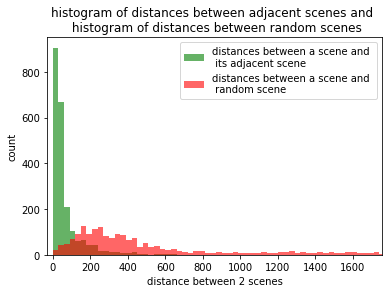

In [211]:
bins = np.arange(0, max(random_distance_list), 30)
plt.xlim([min(adjacent_distance_list)-30, max(adjacent_distance_list)+30])
plt.hist(adjacent_distance_list, bins=bins, alpha=0.6,color = "green" )
plt.hist(random_distance_list, bins=bins, alpha=0.6,color = "red")
plt.title('histogram of distances between adjacent scenes and \n histogram of distances between random scenes')
plt.xlabel('distance between 2 scenes')
plt.ylabel('count')
plt.gca().legend(('distances between a scene and \n its adjacent scene','distances between a scene and \n random scene'))

plt.savefig('histogram.png')
plt.show()




In [200]:
nbrs = NearestNeighbors(n_neighbors=2, n_jobs=40).fit(X)
distances, indices = nbrs.kneighbors(X)
accuracy = 0
for i in range (indices.shape[0]):
    if(text_array[indices[i][0],1] == text_array[indices[i][1],1]):
        if(abs(int(text_array[indices[i][0],2]) - int(text_array[indices[i][1],2])) == 1):
            accuracy =accuracy+1
    
    
accuracy = accuracy/indices.shape[0]
print(accuracy*100)

82.63419034731619


In [201]:
BX = np.where(X>0, 1, 0)
nbrs = NearestNeighbors(n_neighbors=2, n_jobs=40).fit(BX)
distances, indices = nbrs.kneighbors(BX)
accuracy = 0
for i in range (indices.shape[0]):
    accuracy = accuracy + (len(set(text_array[indices[i][0],0].split(" ")).intersection(set(text_array[indices[i][1],0].split(" ")))))/len(set(text_array[indices[i][0],0].split(" ")))
    
accuracy = accuracy/indices.shape[0]
print(accuracy*100)

97.12395915912627


In [202]:
accuracy = 0
for i in range (indices.shape[0]):
    if(text_array[indices[i][0],1] == text_array[indices[i][1],1]):
        if(abs(int(text_array[indices[i][0],2]) - int(text_array[indices[i][1],2])) == 1):
            accuracy =accuracy+1
    
    
accuracy = accuracy/indices.shape[0]
print(accuracy*100)

78.03337843933244


In [203]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(text_array[:,0])
print(len(vectorizer.get_feature_names()))
nbrs = NearestNeighbors(n_neighbors=2, n_jobs=40).fit(X)
distances, indices = nbrs.kneighbors(X)
accuracy = 0
for i in range(indices.shape[0]):
    accuracy = accuracy + (len(set(text_array[indices[i][0],0].split(" ")).intersection(set(text_array[indices[i][1],0].split(" ")))))/len(set(text_array[indices[i][0],0].split(" ")))

print(accuracy/indices.shape[0]*100)

129
93.72528940423967


In [204]:
accuracy = 0
for i in range (indices.shape[0]):
    if(text_array[indices[i][0],1] == text_array[indices[i][1],1]):
        if(abs(int(text_array[indices[i][0],2]) - int(text_array[indices[i][1],2])) == 1):
            accuracy =accuracy+1
    
    
accuracy = accuracy/indices.shape[0]
print(accuracy*100)

92.5575101488498


In [205]:
import matplotlib.pyplot as plt

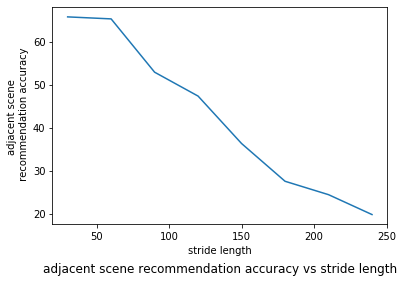

In [206]:
stride_lengths = [30,60,90,120,150,180,210,240]
accuracies = [65.77152600170503,65.3061224489796,52.926208651399484,47.377326565143825,36.36363636363637,27.59493670886076,24.48377581120944,19.865319865319865]

plt.plot(stride_lengths,accuracies)
plt.xlabel('stride length')
plt.ylabel('adjacent scene \n recommendation accuracy')
plt.title('adjacent scene recommendation accuracy vs stride length', y=-0.25)
plt.savefig('adjacent_scene_recommendation_accuracies_cv.pdf')
plt.show()

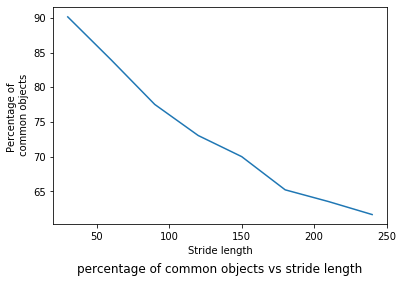

In [207]:
stride_lengths = [30,60,90,120,150,180,210,240]
accuracies = [90.13208733166496,83.93070790690972,77.52991743722193,73.05236634868506,70.01232919720059,65.23236590529007,63.5366426592479,61.67111710034388]

plt.plot(stride_lengths,accuracies)
plt.xlabel('Stride length')
plt.ylabel('Percentage of \n common objects')
plt.title('percentage of common objects vs stride length', y=-0.25)
plt.savefig('percentage_of_common_objects_cv.pdf')

In [208]:
int(text_array[0,2])

1

In [209]:
accuracy = 0
for i in range (indices.shape[0]):
    
    if text_array[indices[i][0],1] == text_array[indices[i][1],1]:
        if abs(int(text_array[indices[i][0],2])- int(text_array[indices[i][1],2])) <= 200:
            accuracy+=1
    
    
accuracy = accuracy/indices.shape[0]
print(accuracy*100)

99.86468200270636


## Experiment

In [212]:
%%time
for i in range(1,2):
    video_id = 'video45.mp4'
    video_numpy = rectangles_numpy[rectangles_numpy[:,0] == video_id]
    print("processing video ",i+1)
    number_of_frames = video_numpy[video_numpy.shape[0]-1][1]
    print("number of frames are ",number_of_frames)
    number_of_scenes = math.ceil((number_of_frames - scene_length)/stride_length)
    
    print(number_of_scenes)
    print("number of scenes ", number_of_scenes)
    
    start_frame = 1
    end_frame = scene_length
    for j in range(1):
        
#         print(start_frame,end_frame)
        
        scene_numpy = video_numpy[(video_numpy[:,1]>=start_frame) & (video_numpy[:,1]<=end_frame)]
        start_frame = start_frame+stride_length
        end_frame = end_frame+stride_length
        #print("size of scene ", j, scene_numpy.shape)
        if scene_numpy.shape[0]>0:
            encoder = OneHotEncoder(categories='auto',sparse=False)
            encoder.fit(scene_numpy[:,7].reshape(-1,1))


            a1 = encoder.transform(scene_numpy[:,7].reshape(-1,1))*150
            a2 = scene_numpy[:,3].reshape(-1,1)
            a3 = scene_numpy[:,4].reshape(-1,1)
            a4 = scene_numpy[:,5].reshape(-1,1)
            a5 = scene_numpy[:,6].reshape(-1,1)

            encoded_vectors = np.hstack((a1,a2,a3,a4,a5))
            
            
            print("shape_of_encoded vectors",encoded_vectors.shape)
            
            video_name = scene_numpy[0][0]
            video = cv2.VideoCapture('/media/cs18s504/DATA/Prashanth/Datasets/videos/'+video_name)
            
            current_frame_number = 0
            list_of_histograms = []
            for k in range(scene_numpy.shape[0]):
                frame_number = scene_numpy[k][1]
                while(current_frame_number<frame_number):
                    current_frame_number+=1
                    success,image = video.read()
                    
                
                yt = scene_numpy[k][4]
                yb = scene_numpy[k][6]
                xt = scene_numpy[k][3]
                xb = scene_numpy[k][5]
                lis = []
                for layer in range(3):
                    histr = cv2.calcHist([image[yt:yb,xt:xb]],[layer],None,[20],[0,256])
                    lis.append(histr)
                lis = np.vstack(lis)
            
                list_of_histograms.append(lis)
                
            hist_vector = np.stack(list_of_histograms)
            #print('Hi')
          
            print("histogram shape",hist_vector.shape)
            hist_vector = hist_vector.reshape(hist_vector.shape[0],hist_vector.shape[1])
            print("histogram shape",hist_vector.shape)
            print("total shape",np.hstack([encoded_vectors,hist_vector]).shape)

            #print(a[0,:])
            
            encoded_vectors = np.hstack([encoded_vectors,hist_vector])


            #print(a[0,:])

            kd_tree = KDTree(encoded_vectors)

            results = kd_tree.query_radius(encoded_vectors,r=50,return_distance = False)

            indices = [i for i in range(scene_numpy.shape[0])]

            processed_indices = []

            chains = []

            while indices != []:
                c = indices[0]

                r = closure(c,results)

                indices = list(set(indices)-r)
                chains.append(r)
                
            print(len(chains))
            
            #print(chains)
            
            
            
            for c in range(20,32):
                X = []
                Y = []
                for r in list(chains[c]):
                    X.append((scene_numpy[r,3]+scene_numpy[r,5])/2)
                    Y.append((scene_numpy[r,4]+scene_numpy[r,6])/2)
                    
                if(len(X)>10):
                    plt.scatter(X,Y)
                    plt.xlim(0,500)
                    plt.ylim(0,400) 
                    
                  
            
            plt.savefig('trail_of_objects.png')
            plt.savefig('trail_of_objects.pdf')
            
#                 plt.show()
            





   
                
                
  


processing video  2
number of frames are  7619
246
number of scenes  246
shape_of_encoded vectors (751, 32)
histogram shape (751, 60, 1)
histogram shape (751, 60)
total shape (751, 92)
616
CPU times: user 1.55 s, sys: 146 ms, total: 1.7 s
Wall time: 1.33 s


<Figure size 432x288 with 0 Axes>

In [1379]:
print(max(rectangles_numpy[:,3]))

1274


In [1366]:
rectangles.dtypes

vid            object
fid             int64
rid             int64
xt              int64
yt              int64
xb              int64
yb              int64
label          object
confidence    float64
dtype: object

## Experimenting with DBSCAN

In [ ]:
%%time
for i in range(1):
    video_id = list_of_videos[i]
    video_numpy = rectangles_numpy[rectangles_numpy[:,0] == video_id]
    print("processing video ",i+1)
    number_of_frames = video_numpy[video_numpy.shape[0]-1][1]
    #print("number of frames are ",number_of_frames)
    number_of_scenes = math.ceil(number_of_frames/scene_size)
    #print("number of scenes ", number_of_scenes)
    for j in range(1):
        scene_numpy = video_numpy[(video_numpy[:,1]>=(j)*scene_size+1) & (video_numpy[:,1]<=(j+1)*scene_size)]
        #print("size of scene ", j, scene_numpy.shape)
        if scene_numpy.shape[0]>0:
            encoder = OneHotEncoder(categories='auto',sparse=False)
            encoder.fit(scene_numpy[:,7].reshape(-1,1))


            a1 = encoder.transform(scene_numpy[:,7].reshape(-1,1))*150
            a2 = scene_numpy[:,3].reshape(-1,1)
            a3 = scene_numpy[:,4].reshape(-1,1)
            a4 = scene_numpy[:,5].reshape(-1,1)
            a5 = scene_numpy[:,6].reshape(-1,1)
            
            a6 = np.random.randint()
            
            

#             encoded_vectors = np.hstack((a1,a2,a3,a4,a5))

#             #print(a[0,:])

#             kd_tree = KDTree(encoded_vectors)

#             results = kd_tree.query_radius(encoded_vectors,r=50,return_distance = False)

#             indices = [i for i in range(scene_numpy.shape[0])]

#             processed_indices = []

#             chains = []

#             while indices != []:
#                 c = indices[0]

#                 r = closure(c,results)

#                 indices = list(set(indices)-r)
#                 chains.append(r)

#                 #chain_frame = scene_frame.iloc[list(r),:]
#                 #print(chain_frame)

#             #print(chains)

#             scene_numpy = np.hstack((scene_numpy,np.zeros((scene_numpy.shape[0],1)).astype(int)))

#             #print(scene_numpy.shape)

#     #         scene_numpy[[0,2],9] = 1


#             count = 0

#             for item in chains:
#                 count+=1
#                 scene_numpy[list(item),9] = count

#     #         print("total number of chains ",len(chains))
#     #         print(max(scene_numpy[:,9]))

#             text = []


#             for c in range(1,len(chains)+1):


#                 chain_numpy = scene_numpy[scene_numpy[:,9] == c]

#                 if chain_numpy.shape[0]>0:

#                     xt_numpy = chain_numpy[:,3]
#                     yt_numpy = chain_numpy[:,4]
#                     xb_numpy = chain_numpy[:,5]
#                     yb_numpy = chain_numpy[:,6]

#                     cx_numpy = (xt_numpy + xb_numpy)/2
#                     cy_numpy = (xb_numpy + yb_numpy)/2

#                     #print(cx_numpy,c)

#                     mx= np.mean(cx_numpy)
#                     my = np.mean(cy_numpy)
#                     #print(mx)

#                     cx2_numpy = cx_numpy*cx_numpy
#                     cy2_numpy = cy_numpy*cy_numpy

#                     nx = cx_numpy.shape[0]
#                     ny = cy_numpy.shape[0]

#     #                 print(math.sqrt(((mx - cx_numpy)*(mx - cx_numpy) + (my - cy_numpy)*(my - cy_numpy))[0]))

#                     variance =  np.sum(np.sqrt(np.array((mx - cx_numpy)*(mx - cx_numpy) + (my - cy_numpy)*(my - cy_numpy),dtype=np.float64)))/nx


#                     #print(variance)

#                     if(variance>=0 and variance<25):

#                         text.append('s_'+chain_numpy[0,7])
#                     elif(variance>=25 and variance<50):

#                         text.append('sm_'+chain_numpy[0,7])

#                     elif(variance>=50 and variance<75):

#                         text.append('m_'+chain_numpy[0,7])
#                     else:
#                         text.append('fm_'+chain_numpy[0,7])
                    
                
                    
#         major_list_60.append((text,video_id,j+1))    
                
                
  

In [1318]:
video_db = rectangles_numpy[rectangles_numpy[:,0] == 'video1.mp4']
encoder = OneHotEncoder(categories='auto',sparse=False)
encoder.fit(video_db[:,7].reshape(-1,1))

a1 = encoder.transform(video_db[:,7].reshape(-1,1))*150
a2 = video_db[:,3].reshape(-1,1)
a3 = video_db[:,4].reshape(-1,1)
a4 = video_db[:,5].reshape(-1,1)
a5 = video_db[:,6].reshape(-1,1)



print(a2.flatten()[0])
print(a3.flatten()[0])
print(a4.flatten()[0])
print(a5.flatten()[0])



a6 = [np.linspace(i,j,10)for i,j in zip(list(a2.flatten()),list(a4.flatten())) ]
print(a6[0])

# a6 = [(i,j) for i,j in zip(list(a2.flatten()),list(a4.flatten()))]
# a7 = []
# #print(a6)
# a7 = [np.linspace(a[0],a[1],10) for a in a6]
# print(a7[0])          
# #a6 = np.random.randint()

0
50
573
340
[  0.          63.66666667 127.33333333 191.         254.66666667
 318.33333333 382.         445.66666667 509.33333333 573.        ]


In [ ]:
def closure(i,results):
    done_indices = []
    lis_old = []
    lis_new = []
    l = results[i]
    lis_new = lis_old + list(l)
    done_indices.append(i)
    
    while(list(set(lis_new)-set(lis_old)) != []):
        a = list(set(lis_new) - set(done_indices))
        if a == []:
            return set([i])

        else:
            a = a[0]
        l = results[a]
        
        lis_old = lis_new
        lis_new = lis_old + list(l)
        done_indices.append(a)
        
    return set(lis_new)

In [1298]:
x,y = np.meshgrid(np.arange(5), np.arange(6))

In [1301]:
x, y = x.flatten(), y.flatten()

In [1304]:
points = np.vstack((x,y)).T 

In [1305]:
points

array([[0, 0],
       [1, 0],
       [2, 0],
       [3, 0],
       [4, 0],
       [0, 1],
       [1, 1],
       [2, 1],
       [3, 1],
       [4, 1],
       [0, 2],
       [1, 2],
       [2, 2],
       [3, 2],
       [4, 2],
       [0, 3],
       [1, 3],
       [2, 3],
       [3, 3],
       [4, 3],
       [0, 4],
       [1, 4],
       [2, 4],
       [3, 4],
       [4, 4],
       [0, 5],
       [1, 5],
       [2, 5],
       [3, 5],
       [4, 5]])

In [994]:
print(set(vectorizer.get_feature_names())-set(bag_of_words))

{'fm_traffic', 'm_stop', 'fm_baseball', 'fm_parking', 'hydrant', 'dog', 'racket', 'sm_baseball', 'm_tennis', 's_hair', 'sm_tennis', 's_tennis', 's_sports', 's_hot', 'm_baseball', 's_parking', 'sm_fire', 'm_cell', 'm_traffic', 'sm_cell', 's_traffic', 'fm_tennis', 'sm_hair', 'sm_teddy', 'bear', 's_wine', 'light', 's_cell', 'm_sports', 's_fire', 'glass', 'fm_stop', 'drier', 's_teddy', 'fm_sports', 'sm_traffic', 'sign', 's_stop', 'sm_hot', 'sm_sports', 'sm_stop', 'phone', 'bat', 'fm_cell', 'm_wine', 'meter', 'sm_wine', 'm_fire', 's_baseball', 'ball', 'm_hot', 'm_parking', 'sm_parking', 'glove'}


In [866]:
%%time
for i in range(1):
    video_id = list_of_videos[i]
    video_frame = rectangles[rectangles['vid'] == video_id]
    print(video_frame.shape)
    
    print('number of frames',math.ceil(video_frame['fid'][video_frame.shape[0]-1]/240))
    
    number_of_scenes = math.ceil(video_frame['fid'][video_frame.shape[0]-1]/240)
    
    for j in range(number_of_scenes):
        scene_frame = video_frame[(video_frame['fid']>= (j*240 +1)) & (video_frame['fid']<= ((j+1)*240))]
        print(scene_frame.shape)
        scene_frame.reset_index(inplace=True)
        encoder = OneHotEncoder(categories='auto',sparse=False)
        encoder.fit(np.array(scene_frame['label']).reshape(-1,1))
        a1 = encoder.transform(np.array(scene_frame['label']).reshape(-1,1))*150
        a2 = np.array(scene_frame['xt']).reshape(-1,1)
        a3 = np.array(scene_frame['yt']).reshape(-1,1)
        a4 = np.array(scene_frame['xb']).reshape(-1,1)
        a5 = np.array(scene_frame['yb']).reshape(-1,1)
        a = np.hstack((a1,a2,a3,a4,a5))
        scene_frame['one_hot_encoding'] = list(a)
        print('shape of matrix',a.shape)
        X =  np.stack(list(scene_frame['one_hot_encoding']),axis=0)
        kd_tree = KDTree(X)
        results = kd_tree.query_radius(X,r=50,return_distance = False)
        
        indices = [i for i in range(scene_frame.shape[0])]
        
        processed_indices = []
        
        chains = []
        
        while indices != []:
            c = indices[0]
            
            r = closure(c,results)
            
            indices = list(set(indices)-r)
            chains.append(r)
            
            #chain_frame = scene_frame.iloc[list(r),:]
            #print(chain_frame)
            
        print(chains)    
        
        
        

(49850, 9)
number of frames 59
(338, 9)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


shape of matrix (338, 17)
     index           vid    fid   rid   xt   yt   xb   yb          label  \
331  49332  video248.mp4  13971  1446  821  280  841  300  traffic light   
334  49335  video248.mp4  13971  1449   61  357  142  451  tennis racket   

     confidence                                   one_hot_encoding  
331    0.222987  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
334    0.705911  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 150.0...  
     index           vid    fid   rid   xt   yt   xb   yb          label  \
331  49332  video248.mp4  13971  1446  821  280  841  300  traffic light   
334  49335  video248.mp4  13971  1449   61  357  142  451  tennis racket   

     confidence                                   one_hot_encoding  
331    0.222987  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
334    0.705911  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 150.0...  
     index           vid    fid   rid   xt   yt   xb   yb          label  \
331  49332  video248.mp4  

     index           vid    fid   rid   xt   yt   xb   yb          label  \
331  49332  video248.mp4  13971  1446  821  280  841  300  traffic light   
334  49335  video248.mp4  13971  1449   61  357  142  451  tennis racket   

     confidence                                   one_hot_encoding  
331    0.222987  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
334    0.705911  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 150.0...  
     index           vid    fid   rid   xt   yt   xb   yb          label  \
331  49332  video248.mp4  13971  1446  821  280  841  300  traffic light   
334  49335  video248.mp4  13971  1449   61  357  142  451  tennis racket   

     confidence                                   one_hot_encoding  
331    0.222987  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
334    0.705911  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 150.0...  
     index           vid    fid   rid   xt   yt   xb   yb          label  \
331  49332  video248.mp4  13971  1446  821  280  841

In [813]:
import pandas as pd 
  
# Creating the dataframe  
df = pd.DataFrame({"A":[1, 5, 3, 4, 2], 
                   "B":[3, 2, 4, 3, 4],  
                   "C":[2, 2, 7, 3, 4], 
                   "D":[4, 3, 6, 12, 7]}) 
  
# Print the dataframe 
df 

,A,B,C,D
0,1,3,2,4
1,5,2,2,3
2,3,4,7,6
3,4,3,3,12
4,2,4,4,7


In [815]:
df.set_value([2,3], 'B', 100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


,A,B,C,D
0,1,3,2,4
1,5,2,2,3
2,3,100,7,6
3,4,100,3,12
4,2,4,4,7
